<a href="https://colab.research.google.com/github/HidellaS/Malaria-Diagnosis/blob/main/Maleria_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import the libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

# Load the data

In [2]:
dataset, dataset_info = tfds.load('malaria', with_info=True, as_supervised=True, shuffle_files=True, split=['train'])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27558 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/malaria/1.0.0.incomplete73NX9D/malaria-train.tfrecord*...:   0%|          …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


In [3]:
dataset

[<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>]

In [4]:
dataset_info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir=PosixGPath('/tmp/tmpzc8qrgo7tfds'),
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear images},


In [5]:
for data in dataset[0].take(2):
  print(data)

(<tf.Tensor: shape=(103, 103, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: shape=(115, 157, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
       

In [6]:
def splits(dataset, TRAIN_RATIO, VAL_RATIO):

  # Calculate split indices
  DATASET_SIZE = len(dataset)
  train_size = int(TRAIN_RATIO * DATASET_SIZE)
  val_size = int(VAL_RATIO * DATASET_SIZE)

  # Split dataset
  train_dataset = dataset.take(train_size)
  val_dataset = dataset.skip(train_size).take(val_size)
  test_dataset = dataset.skip(train_size + val_size)

  return train_dataset, val_dataset, test_dataset

In [7]:
TRAIN_RATIO = 0.6
VAL_RATIO = 0.2

In [8]:
train_dataset, val_dataset, test_dataset = splits(dataset[0], TRAIN_RATIO, VAL_RATIO)


# Print the splits
print(list(train_dataset.take(1).as_numpy_iterator()))
print(list(val_dataset.take(1).as_numpy_iterator()))
print(list(test_dataset.take(1).as_numpy_iterator()))

[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 0)]
[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
     

# Data Visualization

<ipython-input-9-e541c842c408>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(4, 4, i+1)


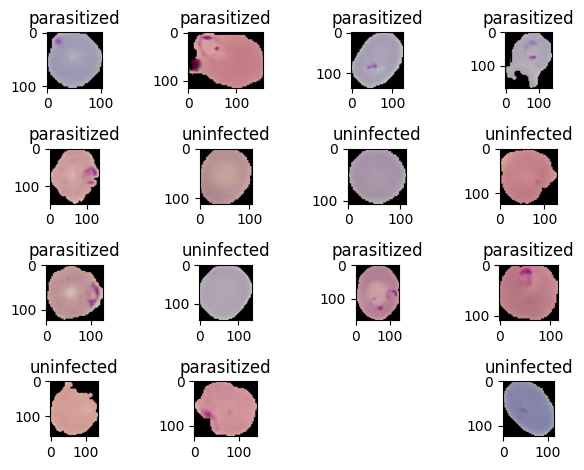

In [9]:
for i, (image, label) in enumerate(train_dataset.take(16)):
  ax = plt.subplot(4, 4, i+1)
  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label))
  plt.tight_layout()

# Data Preprocessing

In [10]:
IM_SIZE = 224
def resizing_and_rescale(image, label):
  return tf.image.resize(image, (IM_SIZE, IM_SIZE))/255.0, label

In [11]:
train_dataset = train_dataset.map(resizing_and_rescale)
val_dataset = val_dataset.map(resizing_and_rescale)
test_dataset = test_dataset.map(resizing_and_rescale)

In [12]:
for img, label in train_dataset.take(1):
  print(img, label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)


In [13]:
BATCH_SIZE = 32
train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [14]:
val_dataset = val_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# Model Creation

In [15]:
from tensorflow.keras.layers import Dense, InputLayer, Conv2D, MaxPool2D, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy

In [16]:
model = tf.keras.Sequential([

    InputLayer(input_shape= (IM_SIZE, IM_SIZE, 3)),

    Conv2D(filters=6, kernel_size=3, strides=1, padding='valid', activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2),

    Conv2D(filters=16, kernel_size=3, strides=1, padding='valid', activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2),

    Flatten(),

    Dense(1000, activation='relu'),
    BatchNormalization(),
    Dense(100, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid'),

])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 6)       168       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 6)       24        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 6)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 16)      64        
 chNormalization)                                                
                                                        

### Compile the model

In [18]:
model.compile(optimizer=Adam(learning_rate=0.1),
              loss=BinaryCrossentropy(),
              metrics='accuracy')

In [19]:
history_1 = model.fit(train_dataset,
                      validation_data=val_dataset,
                      epochs=2,
                      verbose=1)

Epoch 1/2
517/517 [==============================] - 67s 109ms/step - loss: 0.6735 - accuracy: 0.6308 - val_loss: 0.7092 - val_accuracy: 0.6454
Epoch 2/2
517/517 [==============================] - 44s 85ms/step - loss: 0.6217 - accuracy: 0.6687 - val_loss: 0.9383 - val_accuracy: 0.5676


# plot loss and accuracy curves

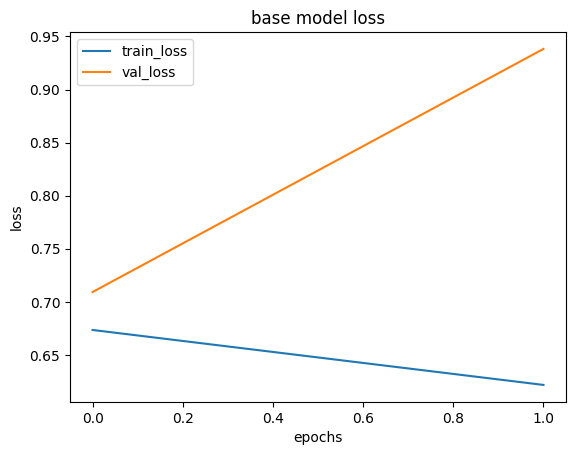

In [20]:
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('base model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.show()

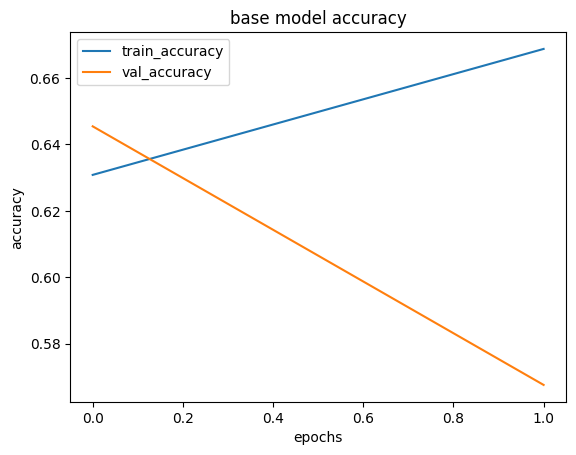

In [21]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('base model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

# Evaluate the model

In [22]:
test_dataset = test_dataset.batch(1)

In [23]:
model.evaluate(test_dataset)

5513/5513 [==============================] - 33s 4ms/step - loss: 0.9440 - accuracy: 0.5685


[0.9439535737037659, 0.568474531173706]

# Model Predictions

In [24]:
model.predict(test_dataset.take(1))[0][0]

1/1 [==============================] - 10s 10s/step


0.00017664439

In [25]:
def parasite_or_not(x):
  if(x<0.5):
    return str('P')
  else:
    return str('U')

1/1 [==============================] - 0s 17ms/step


<ipython-input-26-4fd05941fb86>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(3, 3,i+1)


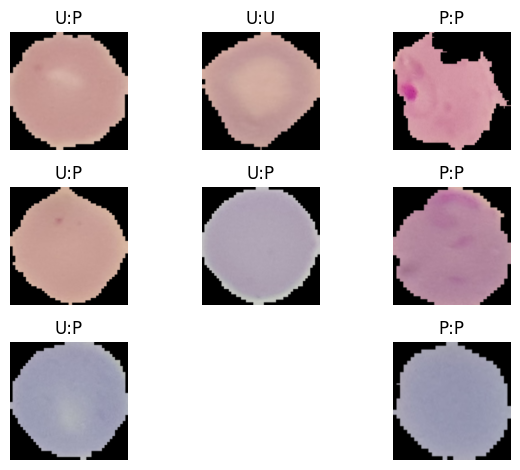

In [26]:
for i, (image, label) in enumerate(test_dataset.take(9)):
  ax = plt.subplot(3, 3,i+1)
  plt.imshow(image[0])
  plt.title(str(parasite_or_not(label.numpy()[0])) + ":" + str(parasite_or_not(model.predict(image)[0][0])))
  plt.axis('off')
  plt.tight_layout()

# Save and load the model

In [27]:
model.save('base_model')

In [28]:
loaded_model = tf.keras.models.load_model('base_model')

In [29]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 6)       168       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 6)       24        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 6)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 16)      64        
 chNormalization)                                                
                                                        

In [30]:
model.save('base_model.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [31]:
hdf5_loaded_model = tf.keras.models.load_model('base_model.hdf5')

In [32]:
hdf5_loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 6)       168       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 6)       24        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 6)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 16)      64        
 chNormalization)                                                
                                                        

### Save the weights and biases

In [33]:
model.save_weights('weights/base_model_weights')

In [34]:
model.load_weights('weights/base_model_weights')

In [35]:
model.evaluate(test_dataset)

5513/5513 [==============================] - 33s 4ms/step - loss: 0.9448 - accuracy: 0.5685


[0.9447776079177856, 0.568474531173706]

# Save the model to google drive

In [36]:
from google.colab import drive

In [37]:
# mount the drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [38]:
# !cp -r /content/base_model/ /content/drive/MyDrive/base_model/

# Model Creation with functional API

In [39]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

In [40]:
func_input = Input(shape = (IM_SIZE, IM_SIZE, 3), name='Input_Image')

x = Conv2D(filters=6, kernel_size=3, strides=1, padding='valid', activation='relu')(func_input)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=2, strides=2)(x)
x = Conv2D(filters=16, kernel_size=3, strides=1, padding='valid', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=2, strides=2)(x)

x = Flatten()(x)

x = Dense(100, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(10, activation='relu')(x)
x = BatchNormalization()(x)

func_output = Dense(1, activation='sigmoid')(x)



func_model = Model(func_input, func_output, name='func_model')

In [41]:
func_model.summary()

Model: "func_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_4 (Bat  (None, 222, 222, 6)       24        
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 6)       0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_5 (Bat  (None, 109, 109, 16)      6

In [42]:
func_model.compile(optimizer=Adam(learning_rate=0.1),
              loss=BinaryCrossentropy(),
              metrics='accuracy')

In [43]:
history_2 = func_model.fit(train_dataset,
                      validation_data=val_dataset,
                      epochs=5,
                      verbose=1)

Epoch 1/5
517/517 [==============================] - 42s 75ms/step - loss: 0.6238 - accuracy: 0.6567 - val_loss: 1.0101 - val_accuracy: 0.5291
Epoch 2/5
517/517 [==============================] - 41s 80ms/step - loss: 0.4852 - accuracy: 0.7647 - val_loss: 1.7638 - val_accuracy: 0.7645
Epoch 3/5
517/517 [==============================] - 36s 69ms/step - loss: 0.2678 - accuracy: 0.9160 - val_loss: 0.2726 - val_accuracy: 0.9035
Epoch 4/5
517/517 [==============================] - 47s 91ms/step - loss: 0.2557 - accuracy: 0.9192 - val_loss: 0.6352 - val_accuracy: 0.8514
Epoch 5/5
517/517 [==============================] - 45s 87ms/step - loss: 0.2551 - accuracy: 0.9185 - val_loss: 0.7794 - val_accuracy: 0.4876


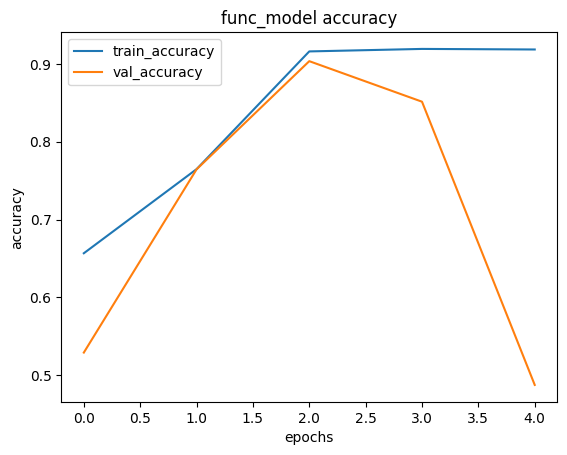

In [44]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('func_model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

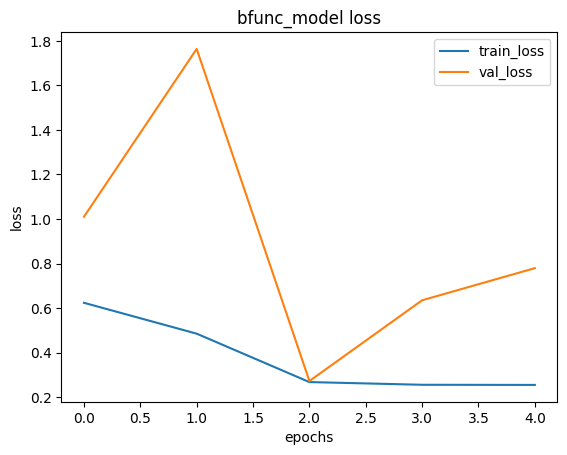

In [45]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('bfunc_model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.show()

# Seperate the feature extraction layers

In [46]:
func_input = Input(shape = (IM_SIZE, IM_SIZE, 3), name='Input_Image')

x = Conv2D(filters=6, kernel_size=3, strides=1, padding='valid', activation='relu')(func_input)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=2, strides=2)(x)

x = Conv2D(filters=16, kernel_size=3, strides=1, padding='valid', activation='relu')(x)
x = BatchNormalization()(x)
output = MaxPool2D(pool_size=2, strides=2)(x)


feature_extractor = Model(func_input, output, name='Feature_extraction_model')
feature_extractor.summary()

Model: "Feature_extraction_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_8 (Bat  (None, 222, 222, 6)       24        
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 6)       0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_9 (Bat  (None, 109, 1

In [47]:
func_input = Input(shape = (IM_SIZE, IM_SIZE, 3), name='Input_Image')

x = feature_extractor(func_input)

x = Flatten()(x)

x = Dense(100, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(10, activation='relu')(x)
x = BatchNormalization()(x)

func_output = Dense(1, activation='sigmoid')(x)



model_with_seperate_feature_extraction_layer = Model(func_input, func_output, name='seperate_feature_extraction_layer_model')
model_with_seperate_feature_extraction_layer.summary()

Model: "seperate_feature_extraction_layer_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 Feature_extraction_model (  (None, 54, 54, 16)        1136      
 Functional)                                                     
                                                                 
 flatten_2 (Flatten)         (None, 46656)             0         
                                                                 
 dense_6 (Dense)             (None, 100)               4665700   
                                                                 
 batch_normalization_10 (Ba  (None, 100)               400       
 tchNormalization)                                               
                                                                 
 dense_7 (Dense)           

In [48]:
model_with_seperate_feature_extraction_layer.compile(optimizer=Adam(learning_rate=0.1),
              loss=BinaryCrossentropy(),
              metrics='accuracy')

In [49]:
history_3 = model_with_seperate_feature_extraction_layer.fit(train_dataset,
                      validation_data=val_dataset,
                      epochs=5,
                      verbose=1)

Epoch 1/5
517/517 [==============================] - 41s 75ms/step - loss: 0.6053 - accuracy: 0.6787 - val_loss: 1.2699 - val_accuracy: 0.4990
Epoch 2/5
517/517 [==============================] - 37s 71ms/step - loss: 0.2832 - accuracy: 0.9034 - val_loss: 0.7286 - val_accuracy: 0.8380
Epoch 3/5
517/517 [==============================] - 41s 79ms/step - loss: 0.2468 - accuracy: 0.9210 - val_loss: 1.8713 - val_accuracy: 0.4994
Epoch 4/5
517/517 [==============================] - 37s 72ms/step - loss: 0.2357 - accuracy: 0.9252 - val_loss: 0.2383 - val_accuracy: 0.9211
Epoch 5/5
517/517 [==============================] - 36s 70ms/step - loss: 0.2185 - accuracy: 0.9331 - val_loss: 0.3251 - val_accuracy: 0.9196


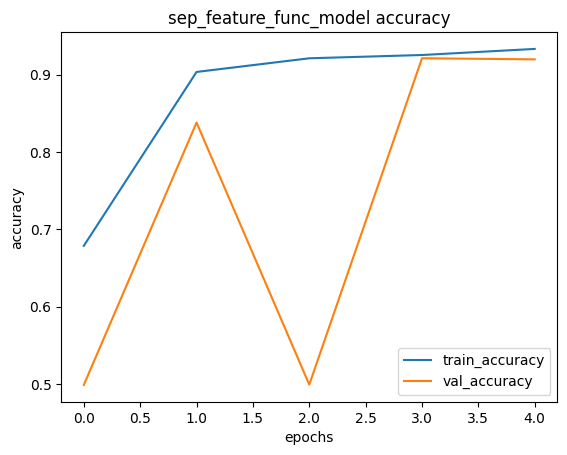

In [50]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('sep_feature_func_model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

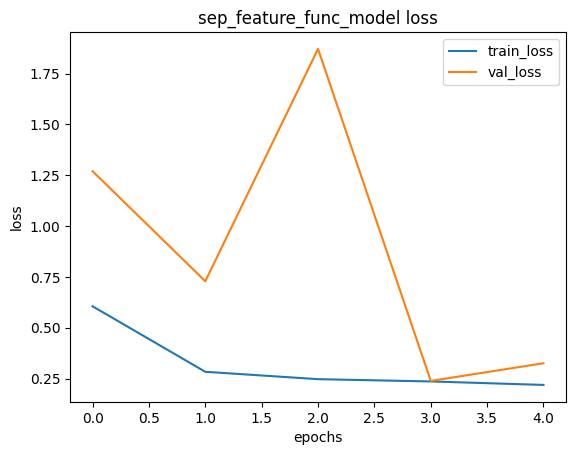

In [51]:
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('sep_feature_func_model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.show()

# Model Subclassing

In [54]:
from tensorflow.keras.layers import Layer, Conv2D, BatchNormalization, MaxPool2D

In [55]:
class FeatureExtractor(Layer):
  def __init__(self):
    super(FeatureExtractor, self).__init__()

    self.conv_1 = Conv2D(filters=6, kernel_size=3, strides=1, padding='valid', activation='relu')
    self.batch_1 = BatchNormalization()
    self.pool_1 = MaxPool2D(pool_size=2, strides=2)

    self.conv_2 = Conv2D(filters=16, kernel_size=3, strides=1, padding='valid', activation='relu')
    self.batch_2 = BatchNormalization()
    self.pool_2 = MaxPool2D(pool_size=2, strides=2)

  def call(self, x, training):

    x = self.conv_1(x)
    x = self.batch_1(x)
    x = self.pool_1(x)

    x = self.conv_2(x)
    x = self.batch_2(x)
    x = self.pool_2(x)

    return x


feature_sub_classed = FeatureExtractor()

In [56]:
func_input = Input(shape = (IM_SIZE, IM_SIZE, 3), name='Input_Image')

x = feature_sub_classed(func_input)

x = Flatten()(x)

x = Dense(100, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(10, activation='relu')(x)
x = BatchNormalization()(x)

func_output = Dense(1, activation='sigmoid')(x)



sub_classed_feature_extractor = Model(func_input, func_output, name='sub_classed_feature_extractor_model')
sub_classed_feature_extractor.summary()

Model: "sub_classed_feature_extractor_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 feature_extractor (Feature  (None, 54, 54, 16)        1136      
 Extractor)                                                      
                                                                 
 flatten_3 (Flatten)         (None, 46656)             0         
                                                                 
 dense_9 (Dense)             (None, 100)               4665700   
                                                                 
 batch_normalization_14 (Ba  (None, 100)               400       
 tchNormalization)                                               
                                                                 
 dense_10 (Dense)            (N

# Create a model using sub classed instead of layer

In [58]:
class LenetModel(Model):
  def __init__(self):
    super(LenetModel, self).__init__()

    self.feature_extractor = FeatureExtractor()

    self.flatten = Flatten()
    self.dense_1 = Dense(100, activation='relu')
    self.batch_1 = BatchNormalization()
    self.dense_2 = Dense(10, activation='relu')
    self.batch_2 = BatchNormalization()
    self.dense_3 = Dense(1, activation='sigmoid')

  def call(self, x, training):

    x = self.feature_extractor(x)
    x = self.flatten(x)
    x = self.dense_1(x)
    x = self.batch_1(x)
    x = self.dense_2(x)
    x = self.batch_2(x)
    x = self.dense_3(x)

    return x


feature_model_sub_classed = LenetModel()
feature_model_sub_classed(tf.zeros([1, 224, 224, 3]))
feature_model_sub_classed.summary()

Model: "lenet_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extractor_2 (Featu  multiple                  1136      
 reExtractor)                                                    
                                                                 
 flatten_5 (Flatten)         multiple                  0         
                                                                 
 dense_15 (Dense)            multiple                  4665700   
                                                                 
 batch_normalization_22 (Ba  multiple                  400       
 tchNormalization)                                               
                                                                 
 dense_16 (Dense)            multiple                  1010      
                                                                 
 batch_normalization_23 (Ba  multiple                

In [65]:
from tensorflow.keras.metrics import Accuracy, FalsePositives, FalseNegatives, TruePositives, TrueNegatives, Precision, Recall, AUC, BinaryAccuracy

metrics = [Accuracy(name='acc'), FalsePositives(name='fp'), FalseNegatives(name='fn'), TruePositives(name='tp'), TrueNegatives(name='tn'),
           Precision(name='precision'), Recall(name='recall'), AUC(name='AUC'), BinaryAccuracy(name='b_acc')]

In [66]:
feature_model_sub_classed.compile(optimizer=Adam(learning_rate=0.01),
                                  loss = BinaryCrossentropy(),
                                  metrics=metrics)

In [67]:
fmsc_history = feature_model_sub_classed.fit(train_dataset, validation_data=val_dataset, epochs=5, verbose=1)

Epoch 1/5
517/517 [==============================] - 46s 77ms/step - loss: 0.1890 - acc: 0.0000e+00 - fp: 626.0000 - fn: 413.0000 - tp: 7848.0000 - tn: 7647.0000 - precision: 0.9261 - recall: 0.9500 - AUC: 0.9729 - b_acc: 0.9372 - val_loss: 0.4505 - val_acc: 0.0000e+00 - val_fp: 497.0000 - val_fn: 63.0000 - val_tp: 2701.0000 - val_tn: 2250.0000 - val_precision: 0.8446 - val_recall: 0.9772 - val_AUC: 0.9504 - val_b_acc: 0.8984
Epoch 2/5
517/517 [==============================] - 40s 76ms/step - loss: 0.1691 - acc: 0.0000e+00 - fp: 570.0000 - fn: 340.0000 - tp: 7923.0000 - tn: 7701.0000 - precision: 0.9329 - recall: 0.9589 - AUC: 0.9764 - b_acc: 0.9450 - val_loss: 0.5931 - val_acc: 0.0011 - val_fp: 39.0000 - val_fn: 2610.0000 - val_tp: 155.0000 - val_tn: 2707.0000 - val_precision: 0.7990 - val_recall: 0.0561 - val_AUC: 0.9616 - val_b_acc: 0.5193
Epoch 3/5
517/517 [==============================] - 45s 86ms/step - loss: 0.1555 - acc: 0.0000e+00 - fp: 533.0000 - fn: 324.0000 - tp: 7935.000

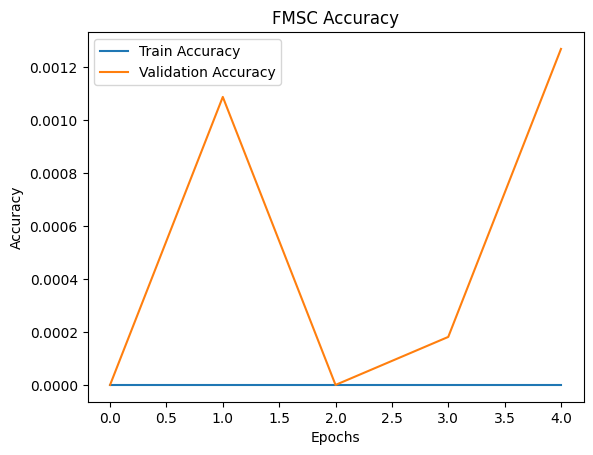

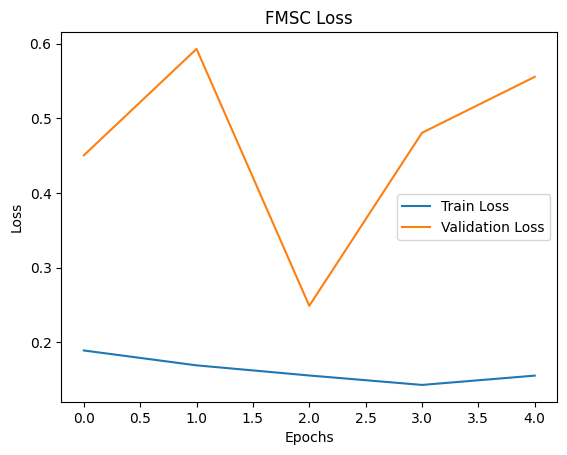

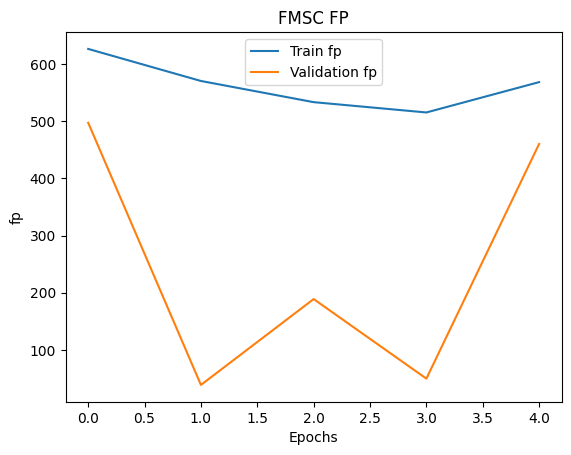

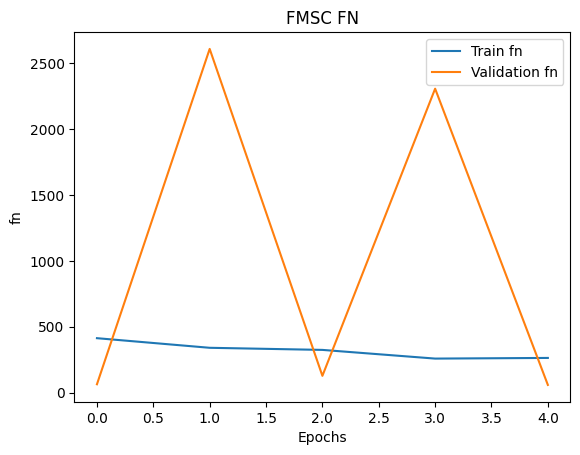

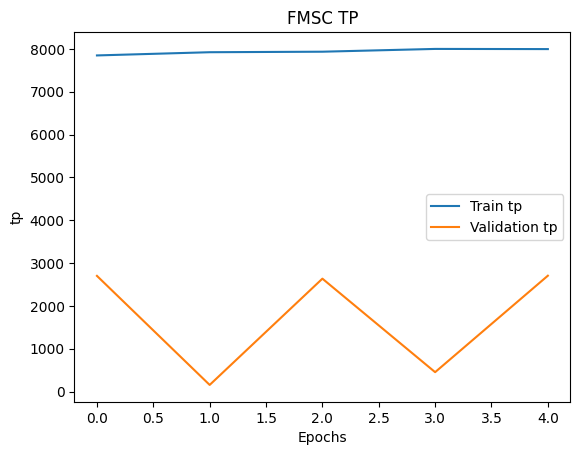

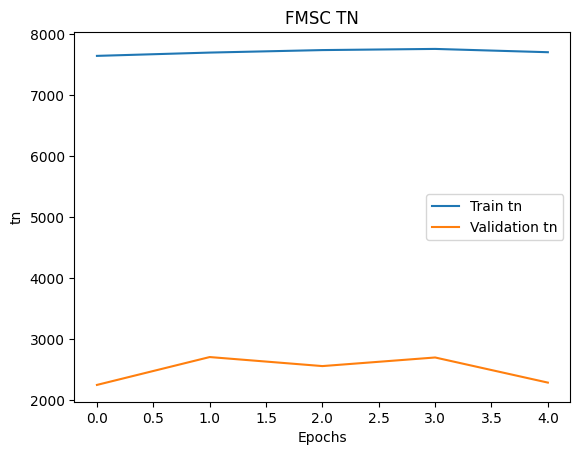

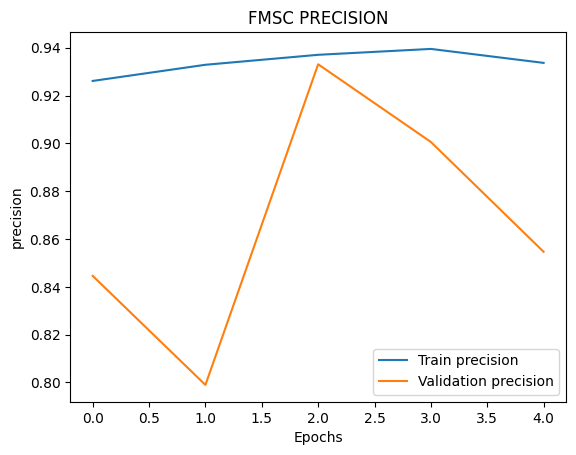

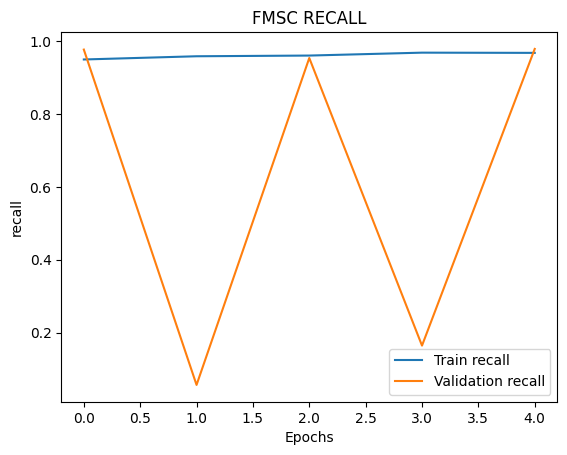

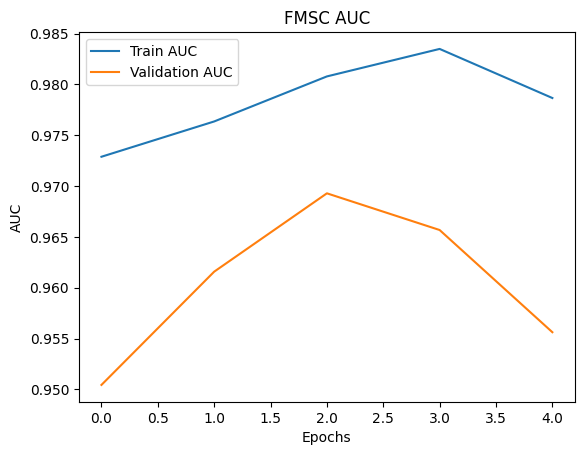

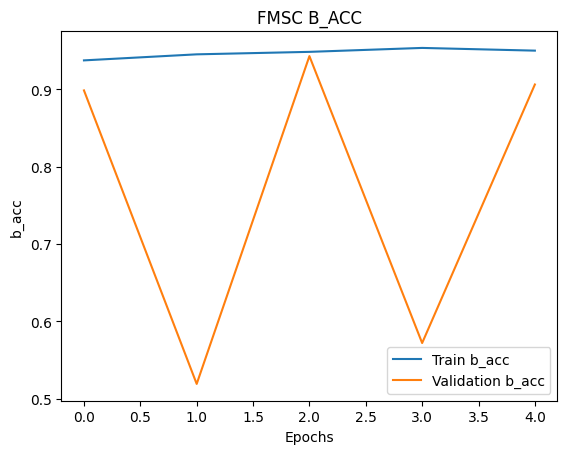

In [74]:
import matplotlib.pyplot as plt

# Plot for accuracy
plt.plot(fmsc_history.history['acc'])
plt.plot(fmsc_history.history['val_acc'])
plt.title('FMSC Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy', 'Validation Accuracy'])
plt.show()

# Plot for loss
plt.plot(fmsc_history.history['loss'])
plt.plot(fmsc_history.history['val_loss'])
plt.title('FMSC Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train Loss', 'Validation Loss'])
plt.show()

# Plot for other metrics
metrics = ['fp', 'fn', 'tp', 'tn', 'precision', 'recall', 'AUC', 'b_acc']

for metric in metrics:
    plt.plot(fmsc_history.history[metric])
    plt.plot(fmsc_history.history['val_' + metric])
    plt.title('FMSC ' + metric.upper())
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend(['Train ' + metric, 'Validation ' + metric])
    plt.show()


# Model Evaluation

In [72]:
test_dataset = test_dataset.batch(1)

In [76]:
def reshape_function(image, label):
    # Reshape the image to remove the extra dimension.
    image = tf.reshape(image, [-1, 224, 224, 3])
    return image, label

# Apply the reshape function to each element in the test dataset
test_dataset = test_dataset.map(reshape_function)

# Now evaluate the model
feature_model_sub_classed.evaluate(test_dataset)

5513/5513 [==============================] - 60s 9ms/step - loss: 0.4586 - acc: 9.0695e-04 - fp: 454.0000 - fn: 67.0000 - tp: 2688.0000 - tn: 2304.0000 - precision: 0.8555 - recall: 0.9757 - AUC: 0.9582 - b_acc: 0.9055


[0.45855769515037537,
 0.0009069472434930503,
 454.0,
 67.0,
 2688.0,
 2304.0,
 0.8555060625076294,
 0.9756805896759033,
 0.958183228969574,
 0.9054961204528809]

# Tensorflow Callbacks

In [87]:
class FeatureExtractor(Layer):
  def __init__(self):
    super(FeatureExtractor, self).__init__()

    self.conv_1 = Conv2D(filters=6, kernel_size=3, strides=1, padding='valid', activation='relu')
    self.batch_1 = BatchNormalization()
    self.pool_1 = MaxPool2D(pool_size=2, strides=2)

    self.conv_2 = Conv2D(filters=16, kernel_size=3, strides=1, padding='valid', activation='relu')
    self.batch_2 = BatchNormalization()
    self.pool_2 = MaxPool2D(pool_size=2, strides=2)

  def call(self, x, training):

    x = self.conv_1(x)
    x = self.batch_1(x)
    x = self.pool_1(x)

    x = self.conv_2(x)
    x = self.batch_2(x)
    x = self.pool_2(x)

    return x

feature_extraction_model = FeatureExtractor()

In [88]:
class Model5(Model):
  def __init__(self):
    super(Model5, self).__init__()

    self.feature_extractor = FeatureExtractor()

    self.flatten = Flatten()
    self.dense_1 = Dense(100, activation='relu')
    self.batch_1 = BatchNormalization()
    self.dense_2 = Dense(10, activation='relu')
    self.batch_2 = BatchNormalization()
    self.dense_3 = Dense(1, activation='sigmoid')

  def call(self, x, training):

    x = self.feature_extractor(x)
    x = self.flatten(x)
    x = self.dense_1(x)
    x = self.batch_1(x)
    x = self.dense_2(x)
    x = self.batch_2(x)
    x = self.dense_3(x)

    return x


subclassed_model_with_feature_extractor = Model5()
subclassed_model_with_feature_extractor(tf.zeros([1, 224, 224, 3]))
subclassed_model_with_feature_extractor.summary()

Model: "model5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extractor_5 (Featu  multiple                  1136      
 reExtractor)                                                    
                                                                 
 flatten_6 (Flatten)         multiple                  0         
                                                                 
 dense_18 (Dense)            multiple                  4665700   
                                                                 
 batch_normalization_30 (Ba  multiple                  400       
 tchNormalization)                                               
                                                                 
 dense_19 (Dense)            multiple                  1010      
                                                                 
 batch_normalization_31 (Ba  multiple                  40   

In [91]:
from tensorflow.keras.metrics import Accuracy, FalsePositives, FalseNegatives, TruePositives, TrueNegatives, Precision, Recall, AUC, BinaryAccuracy

metrics = [Accuracy(name='acc'), FalsePositives(name='fp'), FalseNegatives(name='fn'), TruePositives(name='tp'), TrueNegatives(name='tn'),
           Precision(name='precision'), Recall(name='recall'), AUC(name='AUC'), BinaryAccuracy(name='b_acc')]

In [117]:
from tensorflow.keras.callbacks import Callback, CSVLogger, EarlyStopping, LearningRateScheduler, ModelCheckpoint



In [118]:
class LossCallback(Callback):
  def on_epoch_end(self, epoch, logs):
    print(f"\n For Epoch Number {epoch+1} the model has a loss of {logs['loss']}")

  def on_batch_end(self, batch, logs):
    print(f"\n For Batch Number {batch+1} the model has a loss of {logs['loss']}")


# csv logger callback
csv_callback = CSVLogger(
    'logs.csv', separator=',', append=False
)

# Early stopping callback
es_callback = EarlyStopping(
    monitor='val_loss', min_delta=0, patience=3, verbose=1,
    mode='auto', baseline=None, restore_best_weights=False
)


# Learning rate sheduler
def scheduler(epoch, lr):
  if epoch < 5:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

lr_sheduler_callback = LearningRateScheduler(scheduler, verbose=1)


# Model checkpoint callback
model_checkpoint = ModelCheckpoint(
    'checkpoints/', monitor='val_loss', verbose=1, save_best_only=True,
    save_weights_only=False, mode='auto', save_freq=3
)

In [120]:
subclassed_model_with_feature_extractor.compile(optimizer=Adam(learning_rate=0.01),
                                                loss = BinaryCrossentropy(),
                                                metrics=metrics)

In [121]:
history_5 = subclassed_model_with_feature_extractor.fit(train_dataset, validation_data=val_dataset, epochs=15, verbose=1, callbacks=[csv_callback, es_callback, lr_sheduler_callback, model_checkpoint])


Epoch 1: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 1/15
  2/517 [..............................] - ETA: 41s - loss: 0.0024 - acc: 0.0011 - fp: 182.0000 - fn: 128.0000 - tp: 2667.0000 - tn: 2598.0000 - precision: 0.9361 - recall: 0.9542 - AUC: 0.9725 - b_acc: 0.9444      

  5/517 [..............................] - ETA: 39s - loss: 0.0595 - acc: 0.0018 - fp: 184.0000 - fn: 129.0000 - tp: 2718.0000 - tn: 2640.0000 - precision: 0.9366 - recall: 0.9547 - AUC: 0.9730 - b_acc: 0.9448

  8/517 [..............................] - ETA: 41s - loss: 0.0396 - acc: 0.0028 - fp: 184.0000 - fn: 129.0000 - tp: 2767.0000 - tn: 2687.0000 - precision: 0.9376 - recall: 0.9555 - AUC: 0.9737 - b_acc: 0.9457

 11/517 [..............................] - ETA: 45s - loss: 0.0487 - acc: 0.0032 - fp: 184.0000 - fn: 130.0000 - tp: 2815.0000 - tn: 2734.0000 - precision: 0.9386 - recall: 0.9559 - AUC: 0.9742 - b_acc: 0.9464

 14/517 [..............................] - ETA: 45s - loss: 0.0566 - acc: 0.0034 - fp: 186.0000 - fn: 131.0000 - tp: 2871.0000 - tn: 2771.0000 - precision: 0.9392 - recall: 0.9564 - AUC: 0.9745 - b_acc: 0.9468

 17/517 [..............................] - ETA: 45s - loss: 0.0615 - acc: 0.0041 - fp: 189.0000 - fn: 131.0000 - tp: 2912.0000 - tn: 2823.0000 - precision: 0.9391 - recall: 0.9570 - AUC: 0.9749 - b_acc: 0.9472

 20/517 [>.............................] - ETA: 45s - loss: 0.0575 - acc: 0.0049 - fp: 190.0000 - fn: 131.0000 - tp: 2958.0000 - tn: 2872.0000 - precision: 0.9396 - recall: 0.9576 - AUC: 0.9755 - b_acc: 0.9478

 23/517 [>.............................] - ETA: 44s - loss: 0.0514 - acc: 0.0059 - fp: 190.0000 - fn: 131.0000 - tp: 3007.0000 - tn: 2919.0000 - precision: 0.9406 - recall: 0.9583 - AUC: 0.9760 - b_acc: 0.9486

 26/517 [>.............................] - ETA: 44s - loss: 0.0463 - acc: 0.0066 - fp: 190.0000 - fn: 131.0000 - tp: 3051.0000 - tn: 2971.0000 - precision: 0.9414 - recall: 0.9588 - AUC: 0.9766 - b_acc: 0.9494

 29/517 [>.............................] - ETA: 43s - loss: 0.0494 - acc: 0.0073 - fp: 191.0000 - fn: 134.0000 - tp: 3101.0000 - tn: 3013.0000 - precision: 0.9420 - recall: 0.9586 - AUC: 0.9769 - b_acc: 0.9495

 32/517 [>.............................] - ETA: 43s - loss: 0.0536 - acc: 0.0080 - fp: 192.0000 - fn: 138.0000 - tp: 3148.0000 - tn: 3057.0000 - precision: 0.9425 - recall: 0.9580 - AUC: 0.9773 - b_acc: 0.9495

 35/517 [=>............................] - ETA: 43s - loss: 0.0507 - acc: 0.0084 - fp: 192.0000 - fn: 138.0000 - tp: 3200.0000 - tn: 3101.0000 - precision: 0.9434 - recall: 0.9587 - AUC: 0.9777 - b_acc: 0.9502

 38/517 [=>............................] - ETA: 42s - loss: 0.0486 - acc: 0.0086 - fp: 193.0000 - fn: 138.0000 - tp: 3259.0000 - tn: 3137.0000 - precision: 0.9441 - recall: 0.9594 - AUC: 0.9781 - b_acc: 0.9508

 41/517 [=>............................] - ETA: 41s - loss: 0.0505 - acc: 0.0086 - fp: 195.0000 - fn: 139.0000 - tp: 3311.0000 - tn: 3178.0000 - precision: 0.9444 - recall: 0.9597 - AUC: 0.9785 - b_acc: 0.9510

 43/517 [=>............................] - ETA: 40s - loss: 0.0483 - acc: 0.0086 - fp: 195.0000 - fn: 139.0000 - tp: 3342.0000 - tn: 3211.0000 - precision: 0.9449 - recall: 0.9601 - AUC: 0.9788 - b_acc: 0.9515

 47/517 [=>............................] - ETA: 38s - loss: 0.0475 - acc: 0.0093 - fp: 197.0000 - fn: 139.0000 - tp: 3405.0000 - tn: 3274.0000 - precision: 0.9453 - recall: 0.9608 - AUC: 0.9793 - b_acc: 0.9521

 50/517 [=>............................] - ETA: 37s - loss: 0.0451 - acc: 0.0091 - fp: 197.0000 - fn: 139.0000 - tp: 3460.0000 - tn: 3315.0000 - precision: 0.9461 - recall: 0.9614 - AUC: 0.9797 - b_acc: 0.9527

 53/517 [==>...........................] - ETA: 36s - loss: 0.0432 - acc: 0.0094 - fp: 197.0000 - fn: 139.0000 - tp: 3510.0000 - tn: 3361.0000 - precision: 0.9469 - recall: 0.9619 - AUC: 0.9801 - b_acc: 0.9534

 56/517 [==>...........................] - ETA: 35s - loss: 0.0434 - acc: 0.0096 - fp: 198.0000 - fn: 140.0000 - tp: 3557.0000 - tn: 3408.0000 - precision: 0.9473 - recall: 0.9621 - AUC: 0.9804 - b_acc: 0.9537

 59/517 [==>...........................] - ETA: 34s - loss: 0.0416 - acc: 0.0105 - fp: 198.0000 - fn: 140.0000 - tp: 3599.0000 - tn: 3462.0000 - precision: 0.9479 - recall: 0.9626 - AUC: 0.9808 - b_acc: 0.9543

 62/517 [==>...........................] - ETA: 33s - loss: 0.0509 - acc: 0.0105 - fp: 203.0000 - fn: 142.0000 - tp: 3646.0000 - tn: 3504.0000 - precision: 0.9473 - recall: 0.9625 - AUC: 0.9807 - b_acc: 0.9540

 64/517 [==>...........................] - ETA: 33s - loss: 0.0509 - acc: 0.0105 - fp: 204.0000 - fn: 142.0000 - tp: 3679.0000 - tn: 3534.0000 - precision: 0.9475 - recall: 0.9628 - AUC: 0.9809 - b_acc: 0.9542

 67/517 [==>...........................] - ETA: 32s - loss: 0.0503 - acc: 0.0110 - fp: 204.0000 - fn: 142.0000 - tp: 3734.0000 - tn: 3575.0000 - precision: 0.9482 - recall: 0.9634 - AUC: 0.9811 - b_acc: 0.9548

 70/517 [===>..........................] - ETA: 32s - loss: 0.0495 - acc: 0.0111 - fp: 205.0000 - fn: 142.0000 - tp: 3782.0000 - tn: 3622.0000 - precision: 0.9486 - recall: 0.9638 - AUC: 0.9815 - b_acc: 0.9552

 74/517 [===>..........................] - ETA: 31s - loss: 0.0512 - acc: 0.0109 - fp: 207.0000 - fn: 144.0000 - tp: 3851.0000 - tn: 3677.0000 - precision: 0.9490 - recall: 0.9640 - AUC: 0.9818 - b_acc: 0.9555

 77/517 [===>..........................] - ETA: 30s - loss: 0.0510 - acc: 0.0112 - fp: 207.0000 - fn: 146.0000 - tp: 3898.0000 - tn: 3724.0000 - precision: 0.9496 - recall: 0.9639 - AUC: 0.9820 - b_acc: 0.9557

 80/517 [===>..........................] - ETA: 30s - loss: 0.0507 - acc: 0.0114 - fp: 208.0000 - fn: 147.0000 - tp: 3945.0000 - tn: 3771.0000 - precision: 0.9499 - recall: 0.9641 - AUC: 0.9823 - b_acc: 0.9560

 83/517 [===>..........................] - ETA: 29s - loss: 0.0497 - acc: 0.0113 - fp: 209.0000 - fn: 147.0000 - tp: 3998.0000 - tn: 3813.0000 - precision: 0.9503 - recall: 0.9645 - AUC: 0.9826 - b_acc: 0.9564

 86/517 [===>..........................] - ETA: 29s - loss: 0.0497 - acc: 0.0115 - fp: 210.0000 - fn: 147.0000 - tp: 4043.0000 - tn: 3863.0000 - precision: 0.9506 - recall: 0.9649 - AUC: 0.9828 - b_acc: 0.9568

 89/517 [====>.........................] - ETA: 29s - loss: 0.0523 - acc: 0.0122 - fp: 215.0000 - fn: 150.0000 - tp: 4085.0000 - tn: 3909.0000 - precision: 0.9500 - recall: 0.9646 - AUC: 0.9830 - b_acc: 0.9563

 92/517 [====>.........................] - ETA: 28s - loss: 0.0527 - acc: 0.0127 - fp: 216.0000 - fn: 151.0000 - tp: 4125.0000 - tn: 3963.0000 - precision: 0.9502 - recall: 0.9647 - AUC: 0.9832 - b_acc: 0.9566

 95/517 [====>.........................] - ETA: 28s - loss: 0.0544 - acc: 0.0131 - fp: 217.0000 - fn: 152.0000 - tp: 4173.0000 - tn: 4009.0000 - precision: 0.9506 - recall: 0.9649 - AUC: 0.9832 - b_acc: 0.9568

 97/517 [====>.........................] - ETA: 28s - loss: 0.0543 - acc: 0.0135 - fp: 218.0000 - fn: 152.0000 - tp: 4204.0000 - tn: 4041.0000 - precision: 0.9507 - recall: 0.9651 - AUC: 0.9834 - b_acc: 0.9571

101/517 [====>.........................] - ETA: 27s - loss: 0.0542 - acc: 0.0143 - fp: 219.0000 - fn: 153.0000 - tp: 4262.0000 - tn: 4109.0000 - precision: 0.9511 - recall: 0.9653 - AUC: 0.9836 - b_acc: 0.9575

104/517 [=====>........................] - ETA: 27s - loss: 0.0535 - acc: 0.0149 - fp: 220.0000 - fn: 153.0000 - tp: 4301.0000 - tn: 4165.0000 - precision: 0.9513 - recall: 0.9656 - AUC: 0.9839 - b_acc: 0.9578

107/517 [=====>........................] - ETA: 26s - loss: 0.0536 - acc: 0.0153 - fp: 221.0000 - fn: 155.0000 - tp: 4347.0000 - tn: 4212.0000 - precision: 0.9516 - recall: 0.9656 - AUC: 0.9840 - b_acc: 0.9579

109/517 [=====>........................] - ETA: 26s - loss: 0.0530 - acc: 0.0159 - fp: 221.0000 - fn: 155.0000 - tp: 4380.0000 - tn: 4243.0000 - precision: 0.9520 - recall: 0.9658 - AUC: 0.9842 - b_acc: 0.9582

113/517 [=====>........................] - ETA: 26s - loss: 0.0534 - acc: 0.0164 - fp: 223.0000 - fn: 155.0000 - tp: 4442.0000 - tn: 4307.0000 - precision: 0.9522 - recall: 0.9663 - AUC: 0.9844 - b_acc: 0.9586

116/517 [=====>........................] - ETA: 25s - loss: 0.0534 - acc: 0.0171 - fp: 223.0000 - fn: 156.0000 - tp: 4491.0000 - tn: 4353.0000 - precision: 0.9527 - recall: 0.9664 - AUC: 0.9845 - b_acc: 0.9589

118/517 [=====>........................] - ETA: 25s - loss: 0.0533 - acc: 0.0174 - fp: 224.0000 - fn: 157.0000 - tp: 4522.0000 - tn: 4384.0000 - precision: 0.9528 - recall: 0.9664 - AUC: 0.9847 - b_acc: 0.9590

122/517 [======>.......................] - ETA: 25s - loss: 0.0532 - acc: 0.0183 - fp: 226.0000 - fn: 157.0000 - tp: 4579.0000 - tn: 4453.0000 - precision: 0.9530 - recall: 0.9668 - AUC: 0.9849 - b_acc: 0.9593

124/517 [======>.......................] - ETA: 24s - loss: 0.0530 - acc: 0.0185 - fp: 227.0000 - fn: 157.0000 - tp: 4607.0000 - tn: 4488.0000 - precision: 0.9530 - recall: 0.9670 - AUC: 0.9850 - b_acc: 0.9595

128/517 [======>.......................] - ETA: 24s - loss: 0.0520 - acc: 0.0193 - fp: 227.0000 - fn: 157.0000 - tp: 4667.0000 - tn: 4556.0000 - precision: 0.9536 - recall: 0.9675 - AUC: 0.9853 - b_acc: 0.9600

130/517 [======>.......................] - ETA: 24s - loss: 0.0535 - acc: 0.0194 - fp: 228.0000 - fn: 161.0000 - tp: 4700.0000 - tn: 4582.0000 - precision: 0.9537 - recall: 0.9669 - AUC: 0.9853 - b_acc: 0.9598

134/517 [======>.......................] - ETA: 23s - loss: 0.0522 - acc: 0.0204 - fp: 228.0000 - fn: 161.0000 - tp: 4756.0000 - tn: 4654.0000 - precision: 0.9543 - recall: 0.9673 - AUC: 0.9856 - b_acc: 0.9603

137/517 [======>.......................] - ETA: 23s - loss: 0.0519 - acc: 0.0208 - fp: 228.0000 - fn: 162.0000 - tp: 4809.0000 - tn: 4696.0000 - precision: 0.9547 - recall: 0.9674 - AUC: 0.9857 - b_acc: 0.9606

140/517 [=======>......................] - ETA: 23s - loss: 0.0519 - acc: 0.0212 - fp: 230.0000 - fn: 162.0000 - tp: 4858.0000 - tn: 4741.0000 - precision: 0.9548 - recall: 0.9677 - AUC: 0.9859 - b_acc: 0.9608

142/517 [=======>......................] - ETA: 23s - loss: 0.0512 - acc: 0.0216 - fp: 230.0000 - fn: 162.0000 - tp: 4887.0000 - tn: 4776.0000 - precision: 0.9551 - recall: 0.9679 - AUC: 0.9860 - b_acc: 0.9610

145/517 [=======>......................] - ETA: 22s - loss: 0.0510 - acc: 0.0221 - fp: 230.0000 - fn: 163.0000 - tp: 4938.0000 - tn: 4820.0000 - precision: 0.9555 - recall: 0.9680 - AUC: 0.9862 - b_acc: 0.9613

149/517 [=======>......................] - ETA: 22s - loss: 0.0503 - acc: 0.0228 - fp: 232.0000 - fn: 163.0000 - tp: 5001.0000 - tn: 4883.0000 - precision: 0.9557 - recall: 0.9684 - AUC: 0.9864 - b_acc: 0.9616

152/517 [=======>......................] - ETA: 22s - loss: 0.0495 - acc: 0.0230 - fp: 232.0000 - fn: 163.0000 - tp: 5057.0000 - tn: 4923.0000 - precision: 0.9561 - recall: 0.9688 - AUC: 0.9865 - b_acc: 0.9619

155/517 [=======>......................] - ETA: 22s - loss: 0.0490 - acc: 0.0235 - fp: 233.0000 - fn: 163.0000 - tp: 5102.0000 - tn: 4973.0000 - precision: 0.9563 - recall: 0.9690 - AUC: 0.9867 - b_acc: 0.9622

158/517 [========>.....................] - ETA: 21s - loss: 0.0489 - acc: 0.0245 - fp: 235.0000 - fn: 163.0000 - tp: 5143.0000 - tn: 5026.0000 - precision: 0.9563 - recall: 0.9693 - AUC: 0.9869 - b_acc: 0.9623

161/517 [========>.....................] - ETA: 21s - loss: 0.0487 - acc: 0.0249 - fp: 236.0000 - fn: 163.0000 - tp: 5194.0000 - tn: 5070.0000 - precision: 0.9565 - recall: 0.9696 - AUC: 0.9870 - b_acc: 0.9626

164/517 [========>.....................] - ETA: 21s - loss: 0.0489 - acc: 0.0249 - fp: 236.0000 - fn: 164.0000 - tp: 5250.0000 - tn: 5109.0000 - precision: 0.9570 - recall: 0.9697 - AUC: 0.9871 - b_acc: 0.9628

167/517 [========>.....................] - ETA: 21s - loss: 0.0490 - acc: 0.0258 - fp: 237.0000 - fn: 165.0000 - tp: 5292.0000 - tn: 5161.0000 - precision: 0.9571 - recall: 0.9698 - AUC: 0.9872 - b_acc: 0.9630

169/517 [========>.....................] - ETA: 21s - loss: 0.0486 - acc: 0.0263 - fp: 237.0000 - fn: 165.0000 - tp: 5321.0000 - tn: 5196.0000 - precision: 0.9574 - recall: 0.9699 - AUC: 0.9873 - b_acc: 0.9632

173/517 [=========>....................] - ETA: 20s - loss: 0.0491 - acc: 0.0266 - fp: 239.0000 - fn: 166.0000 - tp: 5388.0000 - tn: 5254.0000 - precision: 0.9575 - recall: 0.9701 - AUC: 0.9875 - b_acc: 0.9633

176/517 [=========>....................] - ETA: 20s - loss: 0.0490 - acc: 0.0271 - fp: 240.0000 - fn: 167.0000 - tp: 5428.0000 - tn: 5308.0000 - precision: 0.9577 - recall: 0.9702 - AUC: 0.9876 - b_acc: 0.9635

179/517 [=========>....................] - ETA: 20s - loss: 0.0484 - acc: 0.0275 - fp: 240.0000 - fn: 167.0000 - tp: 5473.0000 - tn: 5359.0000 - precision: 0.9580 - recall: 0.9704 - AUC: 0.9878 - b_acc: 0.9638

182/517 [=========>....................] - ETA: 19s - loss: 0.0489 - acc: 0.0279 - fp: 243.0000 - fn: 168.0000 - tp: 5520.0000 - tn: 5404.0000 - precision: 0.9578 - recall: 0.9705 - AUC: 0.9879 - b_acc: 0.9637

185/517 [=========>....................] - ETA: 19s - loss: 0.0499 - acc: 0.0283 - fp: 243.0000 - fn: 170.0000 - tp: 5565.0000 - tn: 5453.0000 - precision: 0.9582 - recall: 0.9704 - AUC: 0.9879 - b_acc: 0.9639

188/517 [=========>....................] - ETA: 19s - loss: 0.0497 - acc: 0.0287 - fp: 244.0000 - fn: 171.0000 - tp: 5616.0000 - tn: 5496.0000 - precision: 0.9584 - recall: 0.9705 - AUC: 0.9880 - b_acc: 0.9640

191/517 [==========>...................] - ETA: 19s - loss: 0.0501 - acc: 0.0289 - fp: 245.0000 - fn: 172.0000 - tp: 5669.0000 - tn: 5537.0000 - precision: 0.9586 - recall: 0.9706 - AUC: 0.9881 - b_acc: 0.9641

194/517 [==========>...................] - ETA: 19s - loss: 0.0497 - acc: 0.0293 - fp: 246.0000 - fn: 172.0000 - tp: 5718.0000 - tn: 5583.0000 - precision: 0.9588 - recall: 0.9708 - AUC: 0.9882 - b_acc: 0.9643

197/517 [==========>...................] - ETA: 18s - loss: 0.0503 - acc: 0.0296 - fp: 249.0000 - fn: 175.0000 - tp: 5766.0000 - tn: 5625.0000 - precision: 0.9586 - recall: 0.9705 - AUC: 0.9883 - b_acc: 0.9641

200/517 [==========>...................] - ETA: 18s - loss: 0.0505 - acc: 0.0298 - fp: 251.0000 - fn: 176.0000 - tp: 5814.0000 - tn: 5670.0000 - precision: 0.9586 - recall: 0.9706 - AUC: 0.9884 - b_acc: 0.9642

202/517 [==========>...................] - ETA: 18s - loss: 0.0501 - acc: 0.0298 - fp: 251.0000 - fn: 176.0000 - tp: 5849.0000 - tn: 5699.0000 - precision: 0.9589 - recall: 0.9708 - AUC: 0.9884 - b_acc: 0.9643

205/517 [==========>...................] - ETA: 18s - loss: 0.0497 - acc: 0.0298 - fp: 251.0000 - fn: 177.0000 - tp: 5898.0000 - tn: 5745.0000 - precision: 0.9592 - recall: 0.9709 - AUC: 0.9886 - b_acc: 0.9645

209/517 [===========>..................] - ETA: 17s - loss: 0.0495 - acc: 0.0302 - fp: 254.0000 - fn: 177.0000 - tp: 5953.0000 - tn: 5815.0000 - precision: 0.9591 - recall: 0.9711 - AUC: 0.9887 - b_acc: 0.9647

212/517 [===========>..................] - ETA: 17s - loss: 0.0489 - acc: 0.0307 - fp: 254.0000 - fn: 177.0000 - tp: 5995.0000 - tn: 5869.0000 - precision: 0.9594 - recall: 0.9713 - AUC: 0.9888 - b_acc: 0.9649

215/517 [===========>..................] - ETA: 17s - loss: 0.0484 - acc: 0.0313 - fp: 254.0000 - fn: 177.0000 - tp: 6036.0000 - tn: 5924.0000 - precision: 0.9596 - recall: 0.9715 - AUC: 0.9890 - b_acc: 0.9652

218/517 [===========>..................] - ETA: 17s - loss: 0.0479 - acc: 0.0316 - fp: 254.0000 - fn: 177.0000 - tp: 6084.0000 - tn: 5972.0000 - precision: 0.9599 - recall: 0.9717 - AUC: 0.9891 - b_acc: 0.9655

221/517 [===========>..................] - ETA: 17s - loss: 0.0475 - acc: 0.0316 - fp: 255.0000 - fn: 177.0000 - tp: 6138.0000 - tn: 6013.0000 - precision: 0.9601 - recall: 0.9720 - AUC: 0.9892 - b_acc: 0.9657

224/517 [===========>..................] - ETA: 16s - loss: 0.0478 - acc: 0.0318 - fp: 257.0000 - fn: 177.0000 - tp: 6188.0000 - tn: 6057.0000 - precision: 0.9601 - recall: 0.9722 - AUC: 0.9892 - b_acc: 0.9658

227/517 [============>.................] - ETA: 16s - loss: 0.0479 - acc: 0.0322 - fp: 259.0000 - fn: 178.0000 - tp: 6235.0000 - tn: 6103.0000 - precision: 0.9601 - recall: 0.9722 - AUC: 0.9893 - b_acc: 0.9658

230/517 [============>.................] - ETA: 16s - loss: 0.0486 - acc: 0.0325 - fp: 262.0000 - fn: 178.0000 - tp: 6274.0000 - tn: 6157.0000 - precision: 0.9599 - recall: 0.9724 - AUC: 0.9893 - b_acc: 0.9658

233/517 [============>.................] - ETA: 16s - loss: 0.0483 - acc: 0.0329 - fp: 263.0000 - fn: 178.0000 - tp: 6316.0000 - tn: 6210.0000 - precision: 0.9600 - recall: 0.9726 - AUC: 0.9894 - b_acc: 0.9660

236/517 [============>.................] - ETA: 16s - loss: 0.0485 - acc: 0.0328 - fp: 264.0000 - fn: 180.0000 - tp: 6372.0000 - tn: 6247.0000 - precision: 0.9602 - recall: 0.9725 - AUC: 0.9894 - b_acc: 0.9660

239/517 [============>.................] - ETA: 16s - loss: 0.0480 - acc: 0.0331 - fp: 264.0000 - fn: 180.0000 - tp: 6418.0000 - tn: 6297.0000 - precision: 0.9605 - recall: 0.9727 - AUC: 0.9895 - b_acc: 0.9663

242/517 [=============>................] - ETA: 16s - loss: 0.0477 - acc: 0.0334 - fp: 264.0000 - fn: 180.0000 - tp: 6464.0000 - tn: 6347.0000 - precision: 0.9608 - recall: 0.9729 - AUC: 0.9896 - b_acc: 0.9665

245/517 [=============>................] - ETA: 16s - loss: 0.0482 - acc: 0.0336 - fp: 264.0000 - fn: 185.0000 - tp: 6511.0000 - tn: 6391.0000 - precision: 0.9610 - recall: 0.9724 - AUC: 0.9897 - b_acc: 0.9664

248/517 [=============>................] - ETA: 15s - loss: 0.0488 - acc: 0.0339 - fp: 264.0000 - fn: 187.0000 - tp: 6558.0000 - tn: 6438.0000 - precision: 0.9613 - recall: 0.9723 - AUC: 0.9896 - b_acc: 0.9665

251/517 [=============>................] - ETA: 15s - loss: 0.0483 - acc: 0.0345 - fp: 264.0000 - fn: 187.0000 - tp: 6606.0000 - tn: 6486.0000 - precision: 0.9616 - recall: 0.9725 - AUC: 0.9897 - b_acc: 0.9667

254/517 [=============>................] - ETA: 15s - loss: 0.0487 - acc: 0.0348 - fp: 266.0000 - fn: 190.0000 - tp: 6646.0000 - tn: 6537.0000 - precision: 0.9615 - recall: 0.9722 - AUC: 0.9898 - b_acc: 0.9666

257/517 [=============>................] - ETA: 15s - loss: 0.0484 - acc: 0.0350 - fp: 267.0000 - fn: 190.0000 - tp: 6698.0000 - tn: 6580.0000 - precision: 0.9617 - recall: 0.9724 - AUC: 0.9899 - b_acc: 0.9667

260/517 [==============>...............] - ETA: 15s - loss: 0.0483 - acc: 0.0353 - fp: 269.0000 - fn: 190.0000 - tp: 6743.0000 - tn: 6629.0000 - precision: 0.9616 - recall: 0.9726 - AUC: 0.9900 - b_acc: 0.9668

263/517 [==============>...............] - ETA: 15s - loss: 0.0479 - acc: 0.0357 - fp: 269.0000 - fn: 190.0000 - tp: 6788.0000 - tn: 6680.0000 - precision: 0.9619 - recall: 0.9728 - AUC: 0.9901 - b_acc: 0.9670

266/517 [==============>...............] - ETA: 15s - loss: 0.0477 - acc: 0.0359 - fp: 270.0000 - fn: 190.0000 - tp: 6838.0000 - tn: 6725.0000 - precision: 0.9620 - recall: 0.9730 - AUC: 0.9902 - b_acc: 0.9672

269/517 [==============>...............] - ETA: 15s - loss: 0.0479 - acc: 0.0363 - fp: 272.0000 - fn: 190.0000 - tp: 6886.0000 - tn: 6771.0000 - precision: 0.9620 - recall: 0.9731 - AUC: 0.9902 - b_acc: 0.9673

272/517 [==============>...............] - ETA: 15s - loss: 0.0476 - acc: 0.0364 - fp: 272.0000 - fn: 190.0000 - tp: 6939.0000 - tn: 6814.0000 - precision: 0.9623 - recall: 0.9733 - AUC: 0.9903 - b_acc: 0.9675

275/517 [==============>...............] - ETA: 15s - loss: 0.0471 - acc: 0.0368 - fp: 272.0000 - fn: 190.0000 - tp: 6989.0000 - tn: 6860.0000 - precision: 0.9625 - recall: 0.9735 - AUC: 0.9904 - b_acc: 0.9677

278/517 [===============>..............] - ETA: 15s - loss: 0.0469 - acc: 0.0371 - fp: 273.0000 - fn: 191.0000 - tp: 7032.0000 - tn: 6911.0000 - precision: 0.9626 - recall: 0.9736 - AUC: 0.9905 - b_acc: 0.9678

281/517 [===============>..............] - ETA: 14s - loss: 0.0466 - acc: 0.0374 - fp: 274.0000 - fn: 191.0000 - tp: 7077.0000 - tn: 6961.0000 - precision: 0.9627 - recall: 0.9737 - AUC: 0.9905 - b_acc: 0.9679

284/517 [===============>..............] - ETA: 14s - loss: 0.0462 - acc: 0.0377 - fp: 274.0000 - fn: 191.0000 - tp: 7125.0000 - tn: 7009.0000 - precision: 0.9630 - recall: 0.9739 - AUC: 0.9906 - b_acc: 0.9681

287/517 [===============>..............] - ETA: 14s - loss: 0.0460 - acc: 0.0379 - fp: 274.0000 - fn: 191.0000 - tp: 7174.0000 - tn: 7056.0000 - precision: 0.9632 - recall: 0.9741 - AUC: 0.9907 - b_acc: 0.9684

290/517 [===============>..............] - ETA: 14s - loss: 0.0456 - acc: 0.0382 - fp: 275.0000 - fn: 191.0000 - tp: 7217.0000 - tn: 7108.0000 - precision: 0.9633 - recall: 0.9742 - AUC: 0.9908 - b_acc: 0.9685

293/517 [================>.............] - ETA: 14s - loss: 0.0453 - acc: 0.0387 - fp: 275.0000 - fn: 191.0000 - tp: 7262.0000 - tn: 7159.0000 - precision: 0.9635 - recall: 0.9744 - AUC: 0.9909 - b_acc: 0.9687

296/517 [================>.............] - ETA: 14s - loss: 0.0452 - acc: 0.0388 - fp: 275.0000 - fn: 192.0000 - tp: 7310.0000 - tn: 7206.0000 - precision: 0.9637 - recall: 0.9744 - AUC: 0.9909 - b_acc: 0.9688

299/517 [================>.............] - ETA: 14s - loss: 0.0453 - acc: 0.0387 - fp: 277.0000 - fn: 193.0000 - tp: 7355.0000 - tn: 7254.0000 - precision: 0.9637 - recall: 0.9744 - AUC: 0.9910 - b_acc: 0.9688

302/517 [================>.............] - ETA: 13s - loss: 0.0451 - acc: 0.0388 - fp: 277.0000 - fn: 193.0000 - tp: 7411.0000 - tn: 7294.0000 - precision: 0.9640 - recall: 0.9746 - AUC: 0.9911 - b_acc: 0.9690

305/517 [================>.............] - ETA: 13s - loss: 0.0454 - acc: 0.0392 - fp: 279.0000 - fn: 194.0000 - tp: 7452.0000 - tn: 7346.0000 - precision: 0.9639 - recall: 0.9746 - AUC: 0.9911 - b_acc: 0.9690

308/517 [================>.............] - ETA: 13s - loss: 0.0454 - acc: 0.0398 - fp: 280.0000 - fn: 195.0000 - tp: 7493.0000 - tn: 7399.0000 - precision: 0.9640 - recall: 0.9746 - AUC: 0.9912 - b_acc: 0.9691

311/517 [=================>............] - ETA: 13s - loss: 0.0452 - acc: 0.0398 - fp: 280.0000 - fn: 196.0000 - tp: 7545.0000 - tn: 7442.0000 - precision: 0.9642 - recall: 0.9747 - AUC: 0.9912 - b_acc: 0.9692

313/517 [=================>............] - ETA: 13s - loss: 0.0452 - acc: 0.0401 - fp: 281.0000 - fn: 196.0000 - tp: 7575.0000 - tn: 7475.0000 - precision: 0.9642 - recall: 0.9748 - AUC: 0.9913 - b_acc: 0.9693

317/517 [=================>............] - ETA: 12s - loss: 0.0460 - acc: 0.0401 - fp: 282.0000 - fn: 200.0000 - tp: 7640.0000 - tn: 7533.0000 - precision: 0.9644 - recall: 0.9745 - AUC: 0.9913 - b_acc: 0.9692

320/517 [=================>............] - ETA: 12s - loss: 0.0456 - acc: 0.0399 - fp: 282.0000 - fn: 200.0000 - tp: 7692.0000 - tn: 7577.0000 - precision: 0.9646 - recall: 0.9747 - AUC: 0.9913 - b_acc: 0.9694

322/517 [=================>............] - ETA: 12s - loss: 0.0457 - acc: 0.0399 - fp: 283.0000 - fn: 200.0000 - tp: 7719.0000 - tn: 7613.0000 - precision: 0.9646 - recall: 0.9747 - AUC: 0.9914 - b_acc: 0.9695

326/517 [=================>............] - ETA: 12s - loss: 0.0456 - acc: 0.0398 - fp: 284.0000 - fn: 201.0000 - tp: 7784.0000 - tn: 7674.0000 - precision: 0.9648 - recall: 0.9748 - AUC: 0.9914 - b_acc: 0.9696

329/517 [==================>...........] - ETA: 12s - loss: 0.0459 - acc: 0.0402 - fp: 287.0000 - fn: 202.0000 - tp: 7817.0000 - tn: 7733.0000 - precision: 0.9646 - recall: 0.9748 - AUC: 0.9915 - b_acc: 0.9695

332/517 [==================>...........] - ETA: 11s - loss: 0.0457 - acc: 0.0400 - fp: 288.0000 - fn: 202.0000 - tp: 7867.0000 - tn: 7778.0000 - precision: 0.9647 - recall: 0.9750 - AUC: 0.9915 - b_acc: 0.9696

335/517 [==================>...........] - ETA: 11s - loss: 0.0456 - acc: 0.0399 - fp: 289.0000 - fn: 202.0000 - tp: 7916.0000 - tn: 7824.0000 - precision: 0.9648 - recall: 0.9751 - AUC: 0.9916 - b_acc: 0.9697

338/517 [==================>...........] - ETA: 11s - loss: 0.0454 - acc: 0.0397 - fp: 289.0000 - fn: 202.0000 - tp: 7966.0000 - tn: 7870.0000 - precision: 0.9650 - recall: 0.9753 - AUC: 0.9916 - b_acc: 0.9699

340/517 [==================>...........] - ETA: 11s - loss: 0.0453 - acc: 0.0395 - fp: 290.0000 - fn: 202.0000 - tp: 8002.0000 - tn: 7897.0000 - precision: 0.9650 - recall: 0.9754 - AUC: 0.9917 - b_acc: 0.9700

344/517 [==================>...........] - ETA: 10s - loss: 0.0450 - acc: 0.0396 - fp: 291.0000 - fn: 202.0000 - tp: 8063.0000 - tn: 7963.0000 - precision: 0.9652 - recall: 0.9756 - AUC: 0.9918 - b_acc: 0.9702

347/517 [===================>..........] - ETA: 10s - loss: 0.0447 - acc: 0.0396 - fp: 291.0000 - fn: 202.0000 - tp: 8100.0000 - tn: 8022.0000 - precision: 0.9653 - recall: 0.9757 - AUC: 0.9918 - b_acc: 0.9703

350/517 [===================>..........] - ETA: 10s - loss: 0.0446 - acc: 0.0397 - fp: 291.0000 - fn: 203.0000 - tp: 8141.0000 - tn: 8076.0000 - precision: 0.9655 - recall: 0.9757 - AUC: 0.9919 - b_acc: 0.9704

353/517 [===================>..........] - ETA: 10s - loss: 0.0449 - acc: 0.0396 - fp: 292.0000 - fn: 206.0000 - tp: 8190.0000 - tn: 8119.0000 - precision: 0.9656 - recall: 0.9755 - AUC: 0.9919 - b_acc: 0.9704

355/517 [===================>..........] - ETA: 10s - loss: 0.0450 - acc: 0.0395 - fp: 293.0000 - fn: 208.0000 - tp: 8222.0000 - tn: 8148.0000 - precision: 0.9656 - recall: 0.9753 - AUC: 0.9919 - b_acc: 0.9703

359/517 [===================>..........] - ETA: 9s - loss: 0.0448 - acc: 0.0393 - fp: 293.0000 - fn: 210.0000 - tp: 8289.0000 - tn: 8207.0000 - precision: 0.9659 - recall: 0.9753 - AUC: 0.9920 - b_acc: 0.9704 

362/517 [====================>.........] - ETA: 9s - loss: 0.0448 - acc: 0.0393 - fp: 295.0000 - fn: 211.0000 - tp: 8341.0000 - tn: 8248.0000 - precision: 0.9658 - recall: 0.9753 - AUC: 0.9920 - b_acc: 0.9704

364/517 [====================>.........] - ETA: 9s - loss: 0.0447 - acc: 0.0392 - fp: 296.0000 - fn: 211.0000 - tp: 8372.0000 - tn: 8280.0000 - precision: 0.9659 - recall: 0.9754 - AUC: 0.9921 - b_acc: 0.9705

368/517 [====================>.........] - ETA: 9s - loss: 0.0449 - acc: 0.0395 - fp: 297.0000 - fn: 212.0000 - tp: 8425.0000 - tn: 8353.0000 - precision: 0.9659 - recall: 0.9755 - AUC: 0.9921 - b_acc: 0.9706

371/517 [====================>.........] - ETA: 9s - loss: 0.0449 - acc: 0.0395 - fp: 297.0000 - fn: 214.0000 - tp: 8475.0000 - tn: 8397.0000 - precision: 0.9661 - recall: 0.9754 - AUC: 0.9922 - b_acc: 0.9706

374/517 [====================>.........] - ETA: 8s - loss: 0.0450 - acc: 0.0396 - fp: 297.0000 - fn: 216.0000 - tp: 8520.0000 - tn: 8446.0000 - precision: 0.9663 - recall: 0.9753 - AUC: 0.9922 - b_acc: 0.9707

376/517 [====================>.........] - ETA: 8s - loss: 0.0456 - acc: 0.0395 - fp: 297.0000 - fn: 221.0000 - tp: 8554.0000 - tn: 8471.0000 - precision: 0.9664 - recall: 0.9748 - AUC: 0.9922 - b_acc: 0.9705

380/517 [=====================>........] - ETA: 8s - loss: 0.0455 - acc: 0.0395 - fp: 300.0000 - fn: 221.0000 - tp: 8618.0000 - tn: 8532.0000 - precision: 0.9664 - recall: 0.9750 - AUC: 0.9923 - b_acc: 0.9705

383/517 [=====================>........] - ETA: 8s - loss: 0.0452 - acc: 0.0396 - fp: 300.0000 - fn: 221.0000 - tp: 8658.0000 - tn: 8588.0000 - precision: 0.9665 - recall: 0.9751 - AUC: 0.9923 - b_acc: 0.9707

386/517 [=====================>........] - ETA: 8s - loss: 0.0455 - acc: 0.0396 - fp: 300.0000 - fn: 223.0000 - tp: 8705.0000 - tn: 8635.0000 - precision: 0.9667 - recall: 0.9750 - AUC: 0.9924 - b_acc: 0.9707

389/517 [=====================>........] - ETA: 7s - loss: 0.0460 - acc: 0.0396 - fp: 302.0000 - fn: 223.0000 - tp: 8749.0000 - tn: 8685.0000 - precision: 0.9666 - recall: 0.9751 - AUC: 0.9923 - b_acc: 0.9708

392/517 [=====================>........] - ETA: 7s - loss: 0.0459 - acc: 0.0395 - fp: 303.0000 - fn: 223.0000 - tp: 8803.0000 - tn: 8726.0000 - precision: 0.9667 - recall: 0.9753 - AUC: 0.9924 - b_acc: 0.9709

395/517 [=====================>........] - ETA: 7s - loss: 0.0459 - acc: 0.0394 - fp: 305.0000 - fn: 223.0000 - tp: 8852.0000 - tn: 8771.0000 - precision: 0.9667 - recall: 0.9754 - AUC: 0.9924 - b_acc: 0.9709

397/517 [======================>.......] - ETA: 7s - loss: 0.0457 - acc: 0.0393 - fp: 305.0000 - fn: 223.0000 - tp: 8888.0000 - tn: 8799.0000 - precision: 0.9668 - recall: 0.9755 - AUC: 0.9925 - b_acc: 0.9710

401/517 [======================>.......] - ETA: 7s - loss: 0.0459 - acc: 0.0393 - fp: 307.0000 - fn: 223.0000 - tp: 8953.0000 - tn: 8860.0000 - precision: 0.9668 - recall: 0.9757 - AUC: 0.9924 - b_acc: 0.9711

404/517 [======================>.......] - ETA: 6s - loss: 0.0462 - acc: 0.0392 - fp: 308.0000 - fn: 224.0000 - tp: 9001.0000 - tn: 8906.0000 - precision: 0.9669 - recall: 0.9757 - AUC: 0.9925 - b_acc: 0.9711

407/517 [======================>.......] - ETA: 6s - loss: 0.0470 - acc: 0.0391 - fp: 310.0000 - fn: 225.0000 - tp: 9044.0000 - tn: 8956.0000 - precision: 0.9669 - recall: 0.9757 - AUC: 0.9924 - b_acc: 0.9711

410/517 [======================>.......] - ETA: 6s - loss: 0.0469 - acc: 0.0392 - fp: 311.0000 - fn: 225.0000 - tp: 9089.0000 - tn: 9006.0000 - precision: 0.9669 - recall: 0.9758 - AUC: 0.9925 - b_acc: 0.9712

413/517 [======================>.......] - ETA: 6s - loss: 0.0469 - acc: 0.0390 - fp: 312.0000 - fn: 226.0000 - tp: 9139.0000 - tn: 9050.0000 - precision: 0.9670 - recall: 0.9759 - AUC: 0.9925 - b_acc: 0.9713

416/517 [=======================>......] - ETA: 6s - loss: 0.0466 - acc: 0.0390 - fp: 312.0000 - fn: 226.0000 - tp: 9185.0000 - tn: 9100.0000 - precision: 0.9671 - recall: 0.9760 - AUC: 0.9926 - b_acc: 0.9714

419/517 [=======================>......] - ETA: 6s - loss: 0.0464 - acc: 0.0389 - fp: 312.0000 - fn: 226.0000 - tp: 9238.0000 - tn: 9143.0000 - precision: 0.9673 - recall: 0.9761 - AUC: 0.9926 - b_acc: 0.9716

421/517 [=======================>......] - ETA: 5s - loss: 0.0462 - acc: 0.0389 - fp: 312.0000 - fn: 226.0000 - tp: 9272.0000 - tn: 9173.0000 - precision: 0.9674 - recall: 0.9762 - AUC: 0.9926 - b_acc: 0.9717

425/517 [=======================>......] - ETA: 5s - loss: 0.0463 - acc: 0.0389 - fp: 313.0000 - fn: 228.0000 - tp: 9332.0000 - tn: 9238.0000 - precision: 0.9675 - recall: 0.9762 - AUC: 0.9927 - b_acc: 0.9717

428/517 [=======================>......] - ETA: 5s - loss: 0.0463 - acc: 0.0388 - fp: 314.0000 - fn: 228.0000 - tp: 9384.0000 - tn: 9281.0000 - precision: 0.9676 - recall: 0.9763 - AUC: 0.9927 - b_acc: 0.9718

431/517 [========================>.....] - ETA: 5s - loss: 0.0466 - acc: 0.0387 - fp: 314.0000 - fn: 232.0000 - tp: 9438.0000 - tn: 9319.0000 - precision: 0.9678 - recall: 0.9760 - AUC: 0.9927 - b_acc: 0.9717

433/517 [========================>.....] - ETA: 5s - loss: 0.0464 - acc: 0.0388 - fp: 314.0000 - fn: 232.0000 - tp: 9463.0000 - tn: 9358.0000 - precision: 0.9679 - recall: 0.9761 - AUC: 0.9927 - b_acc: 0.9718

437/517 [========================>.....] - ETA: 4s - loss: 0.0463 - acc: 0.0386 - fp: 315.0000 - fn: 233.0000 - tp: 9530.0000 - tn: 9417.0000 - precision: 0.9680 - recall: 0.9761 - AUC: 0.9928 - b_acc: 0.9719

440/517 [========================>.....] - ETA: 4s - loss: 0.0460 - acc: 0.0386 - fp: 315.0000 - fn: 233.0000 - tp: 9574.0000 - tn: 9469.0000 - precision: 0.9681 - recall: 0.9762 - AUC: 0.9928 - b_acc: 0.9720

443/517 [========================>.....] - ETA: 4s - loss: 0.0458 - acc: 0.0385 - fp: 315.0000 - fn: 233.0000 - tp: 9622.0000 - tn: 9517.0000 - precision: 0.9683 - recall: 0.9764 - AUC: 0.9929 - b_acc: 0.9722

446/517 [========================>.....] - ETA: 4s - loss: 0.0457 - acc: 0.0384 - fp: 316.0000 - fn: 233.0000 - tp: 9666.0000 - tn: 9568.0000 - precision: 0.9683 - recall: 0.9765 - AUC: 0.9929 - b_acc: 0.9722

448/517 [========================>.....] - ETA: 4s - loss: 0.0456 - acc: 0.0383 - fp: 316.0000 - fn: 234.0000 - tp: 9702.0000 - tn: 9595.0000 - precision: 0.9685 - recall: 0.9764 - AUC: 0.9929 - b_acc: 0.9723

452/517 [=========================>....] - ETA: 3s - loss: 0.0453 - acc: 0.0384 - fp: 316.0000 - fn: 234.0000 - tp: 9759.0000 - tn: 9666.0000 - precision: 0.9686 - recall: 0.9766 - AUC: 0.9930 - b_acc: 0.9725

455/517 [=========================>....] - ETA: 3s - loss: 0.0452 - acc: 0.0382 - fp: 317.0000 - fn: 234.0000 - tp: 9815.0000 - tn: 9705.0000 - precision: 0.9687 - recall: 0.9767 - AUC: 0.9930 - b_acc: 0.9725

458/517 [=========================>....] - ETA: 3s - loss: 0.0450 - acc: 0.0382 - fp: 317.0000 - fn: 234.0000 - tp: 9866.0000 - tn: 9750.0000 - precision: 0.9689 - recall: 0.9768 - AUC: 0.9931 - b_acc: 0.9727

460/517 [=========================>....] - ETA: 3s - loss: 0.0449 - acc: 0.0383 - fp: 318.0000 - fn: 234.0000 - tp: 9894.0000 - tn: 9785.0000 - precision: 0.9689 - recall: 0.9769 - AUC: 0.9931 - b_acc: 0.9727

464/517 [=========================>....] - ETA: 3s - loss: 0.0452 - acc: 0.0386 - fp: 320.0000 - fn: 234.0000 - tp: 9954.0000 - tn: 9851.0000 - precision: 0.9689 - recall: 0.9770 - AUC: 0.9931 - b_acc: 0.9728

466/517 [==========================>...] - ETA: 3s - loss: 0.0451 - acc: 0.0386 - fp: 320.0000 - fn: 236.0000 - tp: 9986.0000 - tn: 9881.0000 - precision: 0.9690 - recall: 0.9769 - AUC: 0.9931 - b_acc: 0.9728

469/517 [==========================>...] - ETA: 2s - loss: 0.0452 - acc: 0.0389 - fp: 320.0000 - fn: 238.0000 - tp: 10029.0000 - tn: 9932.0000 - precision: 0.9691 - recall: 0.9768 - AUC: 0.9932 - b_acc: 0.9728

473/517 [==========================>...] - ETA: 2s - loss: 0.0449 - acc: 0.0390 - fp: 320.0000 - fn: 238.0000 - tp: 10092.0000 - tn: 9997.0000 - precision: 0.9693 - recall: 0.9770 - AUC: 0.9932 - b_acc: 0.9730

475/517 [==========================>...] - ETA: 2s - loss: 0.0451 - acc: 0.0389 - fp: 322.0000 - fn: 238.0000 - tp: 10123.0000 - tn: 10028.0000 - precision: 0.9692 - recall: 0.9770 - AUC: 0.9932 - b_acc: 0.9730

478/517 [==========================>...] - ETA: 2s - loss: 0.0449 - acc: 0.0388 - fp: 322.0000 - fn: 238.0000 - tp: 10172.0000 - tn: 10075.0000 - precision: 0.9693 - recall: 0.9771 - AUC: 0.9933 - b_acc: 0.9731

481/517 [==========================>...] - ETA: 2s - loss: 0.0447 - acc: 0.0389 - fp: 322.0000 - fn: 238.0000 - tp: 10218.0000 - tn: 10125.0000 - precision: 0.9694 - recall: 0.9772 - AUC: 0.9933 - b_acc: 0.9732

485/517 [===========================>..] - ETA: 1s - loss: 0.0447 - acc: 0.0388 - fp: 324.0000 - fn: 238.0000 - tp: 10281.0000 - tn: 10188.0000 - precision: 0.9694 - recall: 0.9774 - AUC: 0.9933 - b_acc: 0.9733

487/517 [===========================>..] - ETA: 1s - loss: 0.0446 - acc: 0.0387 - fp: 324.0000 - fn: 239.0000 - tp: 10312.0000 - tn: 10220.0000 - precision: 0.9695 - recall: 0.9773 - AUC: 0.9934 - b_acc: 0.9733

491/517 [===========================>..] - ETA: 1s - loss: 0.0454 - acc: 0.0387 - fp: 327.0000 - fn: 241.0000 - tp: 10382.0000 - tn: 10273.0000 - precision: 0.9695 - recall: 0.9773 - AUC: 0.9934 - b_acc: 0.9732

493/517 [===========================>..] - ETA: 1s - loss: 0.0454 - acc: 0.0388 - fp: 329.0000 - fn: 241.0000 - tp: 10410.0000 - tn: 10307.0000 - precision: 0.9694 - recall: 0.9774 - AUC: 0.9934 - b_acc: 0.9732

497/517 [===========================>..] - ETA: 1s - loss: 0.0452 - acc: 0.0386 - fp: 330.0000 - fn: 241.0000 - tp: 10471.0000 - tn: 10373.0000 - precision: 0.9694 - recall: 0.9775 - AUC: 0.9934 - b_acc: 0.9733

500/517 [============================>.] - ETA: 1s - loss: 0.0450 - acc: 0.0387 - fp: 330.0000 - fn: 242.0000 - tp: 10517.0000 - tn: 10422.0000 - precision: 0.9696 - recall: 0.9775 - AUC: 0.9935 - b_acc: 0.9734

503/517 [============================>.] - ETA: 0s - loss: 0.0449 - acc: 0.0386 - fp: 331.0000 - fn: 242.0000 - tp: 10570.0000 - tn: 10464.0000 - precision: 0.9696 - recall: 0.9776 - AUC: 0.9935 - b_acc: 0.9735

506/517 [============================>.] - ETA: 0s - loss: 0.0450 - acc: 0.0385 - fp: 333.0000 - fn: 242.0000 - tp: 10619.0000 - tn: 10509.0000 - precision: 0.9696 - recall: 0.9777 - AUC: 0.9935 - b_acc: 0.9735

509/517 [============================>.] - ETA: 0s - loss: 0.0448 - acc: 0.0384 - fp: 333.0000 - fn: 242.0000 - tp: 10670.0000 - tn: 10554.0000 - precision: 0.9697 - recall: 0.9778 - AUC: 0.9935 - b_acc: 0.9736

512/517 [============================>.] - ETA: 0s - loss: 0.0450 - acc: 0.0383 - fp: 335.0000 - fn: 243.0000 - tp: 10722.0000 - tn: 10595.0000 - precision: 0.9697 - recall: 0.9778 - AUC: 0.9936 - b_acc: 0.9736

515/517 [============================>.] - ETA: 0s - loss: 0.0448 - acc: 0.0386 - fp: 335.0000 - fn: 243.0000 - tp: 10756.0000 - tn: 10657.0000 - precision: 0.9698 - recall: 0.9779 - AUC: 0.9936 - b_acc: 0.9737

517/517 [==============================] - 57s 102ms/step - loss: 0.0451 - acc: 0.0387 - fp: 337.0000 - fn: 243.0000 - tp: 10778.0000 - tn: 10687.0000 - precision: 0.9697 - recall: 0.9780 - AUC: 0.9936 - b_acc: 0.9737 - val_loss: 0.3232 - val_acc: 0.0011 - val_fp: 179.0000 - val_fn: 236.0000 - val_tp: 2528.0000 - val_tn: 2568.0000 - val_precision: 0.9339 - val_recall: 0.9146 - val_AUC: 0.9638 - val_b_acc: 0.9247 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 2/15
  1/517 [..............................] - ETA: 55s - loss: 0.0068 - acc: 0.0312 - fp: 0.0000e+00 - fn: 0.0000e+00 - tp: 17.0000 - tn: 15.0000 - precision: 1.0000 - recall: 1.0000 - AUC: 1.0000 - b_acc: 1.0000

  3/517 [..............................] - ETA: 23s - loss: 0.0120 - acc: 0.0521 - fp: 0.0000e+00 - fn: 0.0000e+00 - tp: 52.0000 - tn: 44.0000 - precision: 1.0000 - recall: 1.0000 - AUC: 1.0000 - b_acc: 1.0000

  7/517 [..............................] - ETA: 22s - loss: 0.0195 - acc: 0.0402 - fp: 0.0000e+00 - fn: 2.0000 - tp: 115.0000 - tn: 107.0000 - precision: 1.0000 - recall: 0.9829 - AUC: 0.9999 - b_acc: 0.9911

  9/517 [..............................] - ETA: 22s - loss: 0.0203 - acc: 0.0451 - fp: 1.0000 - fn: 2.0000 - tp: 144.0000 - tn: 141.0000 - precision: 0.9931 - recall: 0.9863 - AUC: 0.9998 - b_acc: 0.9896    

 13/517 [..............................] - ETA: 21s - loss: 0.0330 - acc: 0.0337 - fp: 1.0000 - fn: 4.0000 - tp: 219.0000 - tn: 192.0000 - precision: 0.9955 - recall: 0.9821 - AUC: 0.9997 - b_acc: 0.9880

 15/517 [..............................] - ETA: 21s - loss: 0.0298 - acc: 0.0312 - fp: 1.0000 - fn: 4.0000 - tp: 248.0000 - tn: 227.0000 - precision: 0.9960 - recall: 0.9841 - AUC: 0.9998 - b_acc: 0.9896

 19/517 [>.............................] - ETA: 21s - loss: 0.0265 - acc: 0.0263 - fp: 1.0000 - fn: 4.0000 - tp: 305.0000 - tn: 298.0000 - precision: 0.9967 - recall: 0.9871 - AUC: 0.9997 - b_acc: 0.9918

 21/517 [>.............................] - ETA: 21s - loss: 0.0277 - acc: 0.0268 - fp: 1.0000 - fn: 5.0000 - tp: 338.0000 - tn: 328.0000 - precision: 0.9971 - recall: 0.9854 - AUC: 0.9997 - b_acc: 0.9911

 24/517 [>.............................] - ETA: 21s - loss: 0.0267 - acc: 0.0260 - fp: 2.0000 - fn: 5.0000 - tp: 387.0000 - tn: 374.0000 - precision: 0.9949 - recall: 0.9872 - AUC: 0.9997 - b_acc: 0.9909

 28/517 [>.............................] - ETA: 21s - loss: 0.0269 - acc: 0.0257 - fp: 3.0000 - fn: 5.0000 - tp: 447.0000 - tn: 441.0000 - precision: 0.9933 - recall: 0.9889 - AUC: 0.9996 - b_acc: 0.9911

 30/517 [>.............................] - ETA: 21s - loss: 0.0366 - acc: 0.0271 - fp: 4.0000 - fn: 7.0000 - tp: 480.0000 - tn: 469.0000 - precision: 0.9917 - recall: 0.9856 - AUC: 0.9983 - b_acc: 0.9885

 34/517 [>.............................] - ETA: 20s - loss: 0.0354 - acc: 0.0267 - fp: 5.0000 - fn: 8.0000 - tp: 547.0000 - tn: 528.0000 - precision: 0.9909 - recall: 0.9856 - AUC: 0.9984 - b_acc: 0.9881

 36/517 [=>............................] - ETA: 20s - loss: 0.0350 - acc: 0.0269 - fp: 5.0000 - fn: 9.0000 - tp: 586.0000 - tn: 552.0000 - precision: 0.9915 - recall: 0.9849 - AUC: 0.9985 - b_acc: 0.9878

 40/517 [=>............................] - ETA: 20s - loss: 0.0364 - acc: 0.0242 - fp: 7.0000 - fn: 9.0000 - tp: 662.0000 - tn: 602.0000 - precision: 0.9895 - recall: 0.9866 - AUC: 0.9984 - b_acc: 0.9875

 42/517 [=>............................] - ETA: 20s - loss: 0.0353 - acc: 0.0231 - fp: 7.0000 - fn: 9.0000 - tp: 699.0000 - tn: 629.0000 - precision: 0.9901 - recall: 0.9873 - AUC: 0.9985 - b_acc: 0.9881

 46/517 [=>............................] - ETA: 20s - loss: 0.0386 - acc: 0.0231 - fp: 8.0000 - fn: 12.0000 - tp: 761.0000 - tn: 691.0000 - precision: 0.9896 - recall: 0.9845 - AUC: 0.9985 - b_acc: 0.9864

 48/517 [=>............................] - ETA: 20s - loss: 0.0388 - acc: 0.0247 - fp: 9.0000 - fn: 12.0000 - tp: 787.0000 - tn: 728.0000 - precision: 0.9887 - recall: 0.9850 - AUC: 0.9985 - b_acc: 0.9863

 52/517 [==>...........................] - ETA: 20s - loss: 0.0384 - acc: 0.0234 - fp: 10.0000 - fn: 12.0000 - tp: 859.0000 - tn: 783.0000 - precision: 0.9885 - recall: 0.9862 - AUC: 0.9985 - b_acc: 0.9868

 55/517 [==>...........................] - ETA: 19s - loss: 0.0380 - acc: 0.0244 - fp: 11.0000 - fn: 12.0000 - tp: 907.0000 - tn: 830.0000 - precision: 0.9880 - recall: 0.9869 - AUC: 0.9986 - b_acc: 0.9869

 57/517 [==>...........................] - ETA: 19s - loss: 0.0368 - acc: 0.0252 - fp: 11.0000 - fn: 12.0000 - tp: 937.0000 - tn: 864.0000 - precision: 0.9884 - recall: 0.9874 - AUC: 0.9986 - b_acc: 0.9874

 61/517 [==>...........................] - ETA: 19s - loss: 0.0413 - acc: 0.0312 - fp: 12.0000 - fn: 14.0000 - tp: 989.0000 - tn: 937.0000 - precision: 0.9880 - recall: 0.9860 - AUC: 0.9980 - b_acc: 0.9867

 63/517 [==>...........................] - ETA: 19s - loss: 0.0415 - acc: 0.0312 - fp: 12.0000 - fn: 15.0000 - tp: 1027.0000 - tn: 962.0000 - precision: 0.9885 - recall: 0.9856 - AUC: 0.9980 - b_acc: 0.9866

 67/517 [==>...........................] - ETA: 19s - loss: 0.0417 - acc: 0.0336 - fp: 14.0000 - fn: 15.0000 - tp: 1100.0000 - tn: 1015.0000 - precision: 0.9874 - recall: 0.9865 - AUC: 0.9981 - b_acc: 0.9865

 69/517 [===>..........................] - ETA: 19s - loss: 0.0405 - acc: 0.0353 - fp: 14.0000 - fn: 15.0000 - tp: 1131.0000 - tn: 1048.0000 - precision: 0.9878 - recall: 0.9869 - AUC: 0.9981 - b_acc: 0.9869

 73/517 [===>..........................] - ETA: 19s - loss: 0.0412 - acc: 0.0377 - fp: 17.0000 - fn: 16.0000 - tp: 1199.0000 - tn: 1104.0000 - precision: 0.9860 - recall: 0.9868 - AUC: 0.9982 - b_acc: 0.9859

 75/517 [===>..........................] - ETA: 19s - loss: 0.0409 - acc: 0.0388 - fp: 18.0000 - fn: 16.0000 - tp: 1233.0000 - tn: 1133.0000 - precision: 0.9856 - recall: 0.9872 - AUC: 0.9982 - b_acc: 0.9858

 79/517 [===>..........................] - ETA: 18s - loss: 0.0412 - acc: 0.0423 - fp: 19.0000 - fn: 18.0000 - tp: 1295.0000 - tn: 1196.0000 - precision: 0.9855 - recall: 0.9863 - AUC: 0.9983 - b_acc: 0.9854

 81/517 [===>..........................] - ETA: 18s - loss: 0.0416 - acc: 0.0432 - fp: 20.0000 - fn: 18.0000 - tp: 1328.0000 - tn: 1226.0000 - precision: 0.9852 - recall: 0.9866 - AUC: 0.9982 - b_acc: 0.9853

 84/517 [===>..........................] - ETA: 18s - loss: 0.0410 - acc: 0.0428 - fp: 21.0000 - fn: 19.0000 - tp: 1380.0000 - tn: 1268.0000 - precision: 0.9850 - recall: 0.9864 - AUC: 0.9983 - b_acc: 0.9851

 88/517 [====>.........................] - ETA: 18s - loss: 0.0416 - acc: 0.0458 - fp: 24.0000 - fn: 19.0000 - tp: 1438.0000 - tn: 1335.0000 - precision: 0.9836 - recall: 0.9870 - AUC: 0.9983 - b_acc: 0.9847

 90/517 [====>.........................] - ETA: 18s - loss: 0.0410 - acc: 0.0469 - fp: 24.0000 - fn: 19.0000 - tp: 1468.0000 - tn: 1369.0000 - precision: 0.9839 - recall: 0.9872 - AUC: 0.9983 - b_acc: 0.9851

 94/517 [====>.........................] - ETA: 18s - loss: 0.0416 - acc: 0.0489 - fp: 27.0000 - fn: 20.0000 - tp: 1527.0000 - tn: 1434.0000 - precision: 0.9826 - recall: 0.9871 - AUC: 0.9983 - b_acc: 0.9844

 96/517 [====>.........................] - ETA: 18s - loss: 0.0413 - acc: 0.0495 - fp: 27.0000 - fn: 20.0000 - tp: 1558.0000 - tn: 1467.0000 - precision: 0.9830 - recall: 0.9873 - AUC: 0.9984 - b_acc: 0.9847

100/517 [====>.........................] - ETA: 18s - loss: 0.0430 - acc: 0.0519 - fp: 30.0000 - fn: 22.0000 - tp: 1617.0000 - tn: 1531.0000 - precision: 0.9818 - recall: 0.9866 - AUC: 0.9983 - b_acc: 0.9837

102/517 [====>.........................] - ETA: 18s - loss: 0.0429 - acc: 0.0533 - fp: 30.0000 - fn: 23.0000 - tp: 1647.0000 - tn: 1564.0000 - precision: 0.9821 - recall: 0.9862 - AUC: 0.9983 - b_acc: 0.9838

106/517 [=====>........................] - ETA: 17s - loss: 0.0443 - acc: 0.0560 - fp: 31.0000 - fn: 25.0000 - tp: 1704.0000 - tn: 1632.0000 - precision: 0.9821 - recall: 0.9855 - AUC: 0.9983 - b_acc: 0.9835

108/517 [=====>........................] - ETA: 17s - loss: 0.0439 - acc: 0.0576 - fp: 32.0000 - fn: 25.0000 - tp: 1732.0000 - tn: 1667.0000 - precision: 0.9819 - recall: 0.9858 - AUC: 0.9983 - b_acc: 0.9835

112/517 [=====>........................] - ETA: 17s - loss: 0.0430 - acc: 0.0597 - fp: 32.0000 - fn: 25.0000 - tp: 1793.0000 - tn: 1734.0000 - precision: 0.9825 - recall: 0.9862 - AUC: 0.9984 - b_acc: 0.9841

115/517 [=====>........................] - ETA: 17s - loss: 0.0435 - acc: 0.0603 - fp: 33.0000 - fn: 25.0000 - tp: 1843.0000 - tn: 1779.0000 - precision: 0.9824 - recall: 0.9866 - AUC: 0.9983 - b_acc: 0.9842

117/517 [=====>........................] - ETA: 17s - loss: 0.0434 - acc: 0.0614 - fp: 33.0000 - fn: 26.0000 - tp: 1874.0000 - tn: 1811.0000 - precision: 0.9827 - recall: 0.9863 - AUC: 0.9983 - b_acc: 0.9842

120/517 [=====>........................] - ETA: 17s - loss: 0.0435 - acc: 0.0628 - fp: 35.0000 - fn: 26.0000 - tp: 1916.0000 - tn: 1863.0000 - precision: 0.9821 - recall: 0.9866 - AUC: 0.9983 - b_acc: 0.9841

124/517 [======>.......................] - ETA: 17s - loss: 0.0439 - acc: 0.0658 - fp: 37.0000 - fn: 27.0000 - tp: 1969.0000 - tn: 1935.0000 - precision: 0.9816 - recall: 0.9865 - AUC: 0.9983 - b_acc: 0.9839

127/517 [======>.......................] - ETA: 17s - loss: 0.0436 - acc: 0.0657 - fp: 38.0000 - fn: 28.0000 - tp: 2015.0000 - tn: 1983.0000 - precision: 0.9815 - recall: 0.9863 - AUC: 0.9984 - b_acc: 0.9838

130/517 [======>.......................] - ETA: 17s - loss: 0.0439 - acc: 0.0651 - fp: 40.0000 - fn: 29.0000 - tp: 2066.0000 - tn: 2025.0000 - precision: 0.9810 - recall: 0.9862 - AUC: 0.9984 - b_acc: 0.9834

133/517 [======>.......................] - ETA: 18s - loss: 0.0435 - acc: 0.0658 - fp: 40.0000 - fn: 29.0000 - tp: 2112.0000 - tn: 2075.0000 - precision: 0.9814 - recall: 0.9865 - AUC: 0.9984 - b_acc: 0.9838

136/517 [======>.......................] - ETA: 18s - loss: 0.0432 - acc: 0.0646 - fp: 41.0000 - fn: 29.0000 - tp: 2160.0000 - tn: 2122.0000 - precision: 0.9814 - recall: 0.9868 - AUC: 0.9984 - b_acc: 0.9839

139/517 [=======>......................] - ETA: 18s - loss: 0.0423 - acc: 0.0636 - fp: 41.0000 - fn: 29.0000 - tp: 2212.0000 - tn: 2166.0000 - precision: 0.9818 - recall: 0.9871 - AUC: 0.9985 - b_acc: 0.9843

142/517 [=======>......................] - ETA: 18s - loss: 0.0417 - acc: 0.0627 - fp: 41.0000 - fn: 29.0000 - tp: 2260.0000 - tn: 2214.0000 - precision: 0.9822 - recall: 0.9873 - AUC: 0.9985 - b_acc: 0.9846

145/517 [=======>......................] - ETA: 18s - loss: 0.0413 - acc: 0.0623 - fp: 41.0000 - fn: 29.0000 - tp: 2306.0000 - tn: 2264.0000 - precision: 0.9825 - recall: 0.9876 - AUC: 0.9986 - b_acc: 0.9849

147/517 [=======>......................] - ETA: 18s - loss: 0.0414 - acc: 0.0616 - fp: 42.0000 - fn: 29.0000 - tp: 2341.0000 - tn: 2292.0000 - precision: 0.9824 - recall: 0.9878 - AUC: 0.9986 - b_acc: 0.9849

151/517 [=======>......................] - ETA: 18s - loss: 0.0408 - acc: 0.0611 - fp: 43.0000 - fn: 29.0000 - tp: 2407.0000 - tn: 2353.0000 - precision: 0.9824 - recall: 0.9881 - AUC: 0.9986 - b_acc: 0.9851

154/517 [=======>......................] - ETA: 18s - loss: 0.0404 - acc: 0.0607 - fp: 44.0000 - fn: 29.0000 - tp: 2456.0000 - tn: 2399.0000 - precision: 0.9824 - recall: 0.9883 - AUC: 0.9986 - b_acc: 0.9852

157/517 [========>.....................] - ETA: 18s - loss: 0.0406 - acc: 0.0603 - fp: 45.0000 - fn: 31.0000 - tp: 2499.0000 - tn: 2449.0000 - precision: 0.9823 - recall: 0.9877 - AUC: 0.9986 - b_acc: 0.9849

160/517 [========>.....................] - ETA: 18s - loss: 0.0400 - acc: 0.0598 - fp: 45.0000 - fn: 31.0000 - tp: 2550.0000 - tn: 2494.0000 - precision: 0.9827 - recall: 0.9880 - AUC: 0.9987 - b_acc: 0.9852

163/517 [========>.....................] - ETA: 18s - loss: 0.0401 - acc: 0.0600 - fp: 46.0000 - fn: 31.0000 - tp: 2597.0000 - tn: 2542.0000 - precision: 0.9826 - recall: 0.9882 - AUC: 0.9986 - b_acc: 0.9852

166/517 [========>.....................] - ETA: 18s - loss: 0.0404 - acc: 0.0593 - fp: 48.0000 - fn: 31.0000 - tp: 2645.0000 - tn: 2588.0000 - precision: 0.9822 - recall: 0.9884 - AUC: 0.9986 - b_acc: 0.9851

169/517 [========>.....................] - ETA: 18s - loss: 0.0408 - acc: 0.0601 - fp: 48.0000 - fn: 32.0000 - tp: 2689.0000 - tn: 2639.0000 - precision: 0.9825 - recall: 0.9882 - AUC: 0.9986 - b_acc: 0.9852

172/517 [========>.....................] - ETA: 18s - loss: 0.0402 - acc: 0.0594 - fp: 48.0000 - fn: 32.0000 - tp: 2744.0000 - tn: 2680.0000 - precision: 0.9828 - recall: 0.9885 - AUC: 0.9987 - b_acc: 0.9855

175/517 [=========>....................] - ETA: 18s - loss: 0.0400 - acc: 0.0598 - fp: 49.0000 - fn: 32.0000 - tp: 2785.0000 - tn: 2734.0000 - precision: 0.9827 - recall: 0.9886 - AUC: 0.9987 - b_acc: 0.9855

178/517 [=========>....................] - ETA: 18s - loss: 0.0400 - acc: 0.0607 - fp: 49.0000 - fn: 34.0000 - tp: 2827.0000 - tn: 2786.0000 - precision: 0.9830 - recall: 0.9881 - AUC: 0.9987 - b_acc: 0.9854

181/517 [=========>....................] - ETA: 18s - loss: 0.0397 - acc: 0.0603 - fp: 49.0000 - fn: 35.0000 - tp: 2875.0000 - tn: 2833.0000 - precision: 0.9832 - recall: 0.9880 - AUC: 0.9987 - b_acc: 0.9855

184/517 [=========>....................] - ETA: 18s - loss: 0.0403 - acc: 0.0603 - fp: 50.0000 - fn: 37.0000 - tp: 2921.0000 - tn: 2880.0000 - precision: 0.9832 - recall: 0.9875 - AUC: 0.9987 - b_acc: 0.9852

187/517 [=========>....................] - ETA: 18s - loss: 0.0412 - acc: 0.0598 - fp: 52.0000 - fn: 38.0000 - tp: 2968.0000 - tn: 2926.0000 - precision: 0.9828 - recall: 0.9874 - AUC: 0.9986 - b_acc: 0.9850

189/517 [=========>....................] - ETA: 18s - loss: 0.0409 - acc: 0.0594 - fp: 52.0000 - fn: 39.0000 - tp: 3006.0000 - tn: 2951.0000 - precision: 0.9830 - recall: 0.9872 - AUC: 0.9987 - b_acc: 0.9850

193/517 [==========>...................] - ETA: 18s - loss: 0.0414 - acc: 0.0588 - fp: 54.0000 - fn: 39.0000 - tp: 3074.0000 - tn: 3009.0000 - precision: 0.9827 - recall: 0.9875 - AUC: 0.9986 - b_acc: 0.9849

196/517 [==========>...................] - ETA: 18s - loss: 0.0409 - acc: 0.0579 - fp: 54.0000 - fn: 39.0000 - tp: 3125.0000 - tn: 3054.0000 - precision: 0.9830 - recall: 0.9877 - AUC: 0.9987 - b_acc: 0.9852

199/517 [==========>...................] - ETA: 17s - loss: 0.0409 - acc: 0.0573 - fp: 55.0000 - fn: 40.0000 - tp: 3174.0000 - tn: 3099.0000 - precision: 0.9830 - recall: 0.9876 - AUC: 0.9987 - b_acc: 0.9851

201/517 [==========>...................] - ETA: 17s - loss: 0.0407 - acc: 0.0569 - fp: 55.0000 - fn: 40.0000 - tp: 3207.0000 - tn: 3130.0000 - precision: 0.9831 - recall: 0.9877 - AUC: 0.9987 - b_acc: 0.9852

205/517 [==========>...................] - ETA: 17s - loss: 0.0405 - acc: 0.0564 - fp: 55.0000 - fn: 41.0000 - tp: 3272.0000 - tn: 3192.0000 - precision: 0.9835 - recall: 0.9876 - AUC: 0.9987 - b_acc: 0.9854

208/517 [===========>..................] - ETA: 17s - loss: 0.0406 - acc: 0.0566 - fp: 57.0000 - fn: 42.0000 - tp: 3310.0000 - tn: 3247.0000 - precision: 0.9831 - recall: 0.9875 - AUC: 0.9987 - b_acc: 0.9851

210/517 [===========>..................] - ETA: 17s - loss: 0.0405 - acc: 0.0570 - fp: 57.0000 - fn: 43.0000 - tp: 3340.0000 - tn: 3280.0000 - precision: 0.9832 - recall: 0.9873 - AUC: 0.9987 - b_acc: 0.9851

213/517 [===========>..................] - ETA: 17s - loss: 0.0409 - acc: 0.0574 - fp: 59.0000 - fn: 44.0000 - tp: 3376.0000 - tn: 3337.0000 - precision: 0.9828 - recall: 0.9871 - AUC: 0.9987 - b_acc: 0.9849

217/517 [===========>..................] - ETA: 16s - loss: 0.0403 - acc: 0.0572 - fp: 59.0000 - fn: 44.0000 - tp: 3439.0000 - tn: 3402.0000 - precision: 0.9831 - recall: 0.9874 - AUC: 0.9987 - b_acc: 0.9852

219/517 [===========>..................] - ETA: 16s - loss: 0.0400 - acc: 0.0566 - fp: 59.0000 - fn: 44.0000 - tp: 3470.0000 - tn: 3435.0000 - precision: 0.9833 - recall: 0.9875 - AUC: 0.9988 - b_acc: 0.9853

223/517 [===========>..................] - ETA: 16s - loss: 0.0406 - acc: 0.0556 - fp: 62.0000 - fn: 46.0000 - tp: 3541.0000 - tn: 3487.0000 - precision: 0.9828 - recall: 0.9872 - AUC: 0.9987 - b_acc: 0.9849

226/517 [============>.................] - ETA: 16s - loss: 0.0412 - acc: 0.0549 - fp: 64.0000 - fn: 47.0000 - tp: 3590.0000 - tn: 3531.0000 - precision: 0.9825 - recall: 0.9871 - AUC: 0.9987 - b_acc: 0.9847

228/517 [============>.................] - ETA: 15s - loss: 0.0417 - acc: 0.0547 - fp: 67.0000 - fn: 48.0000 - tp: 3614.0000 - tn: 3567.0000 - precision: 0.9818 - recall: 0.9869 - AUC: 0.9987 - b_acc: 0.9842

232/517 [============>.................] - ETA: 15s - loss: 0.0414 - acc: 0.0540 - fp: 68.0000 - fn: 48.0000 - tp: 3670.0000 - tn: 3638.0000 - precision: 0.9818 - recall: 0.9871 - AUC: 0.9987 - b_acc: 0.9844

235/517 [============>.................] - ETA: 15s - loss: 0.0417 - acc: 0.0533 - fp: 70.0000 - fn: 48.0000 - tp: 3721.0000 - tn: 3681.0000 - precision: 0.9815 - recall: 0.9873 - AUC: 0.9987 - b_acc: 0.9843

238/517 [============>.................] - ETA: 15s - loss: 0.0424 - acc: 0.0527 - fp: 71.0000 - fn: 50.0000 - tp: 3770.0000 - tn: 3725.0000 - precision: 0.9815 - recall: 0.9869 - AUC: 0.9987 - b_acc: 0.9841

240/517 [============>.................] - ETA: 15s - loss: 0.0424 - acc: 0.0522 - fp: 72.0000 - fn: 50.0000 - tp: 3802.0000 - tn: 3756.0000 - precision: 0.9814 - recall: 0.9870 - AUC: 0.9987 - b_acc: 0.9841

244/517 [=============>................] - ETA: 14s - loss: 0.0425 - acc: 0.0516 - fp: 73.0000 - fn: 51.0000 - tp: 3866.0000 - tn: 3818.0000 - precision: 0.9815 - recall: 0.9870 - AUC: 0.9987 - b_acc: 0.9841

246/517 [=============>................] - ETA: 14s - loss: 0.0424 - acc: 0.0513 - fp: 73.0000 - fn: 52.0000 - tp: 3902.0000 - tn: 3845.0000 - precision: 0.9816 - recall: 0.9868 - AUC: 0.9987 - b_acc: 0.9841

250/517 [=============>................] - ETA: 14s - loss: 0.0427 - acc: 0.0505 - fp: 75.0000 - fn: 52.0000 - tp: 3963.0000 - tn: 3910.0000 - precision: 0.9814 - recall: 0.9870 - AUC: 0.9986 - b_acc: 0.9841

252/517 [=============>................] - ETA: 14s - loss: 0.0429 - acc: 0.0501 - fp: 76.0000 - fn: 53.0000 - tp: 3994.0000 - tn: 3941.0000 - precision: 0.9813 - recall: 0.9869 - AUC: 0.9986 - b_acc: 0.9840

256/517 [=============>................] - ETA: 14s - loss: 0.0432 - acc: 0.0493 - fp: 79.0000 - fn: 54.0000 - tp: 4051.0000 - tn: 4008.0000 - precision: 0.9809 - recall: 0.9868 - AUC: 0.9986 - b_acc: 0.9838

259/517 [==============>...............] - ETA: 13s - loss: 0.0429 - acc: 0.0487 - fp: 79.0000 - fn: 54.0000 - tp: 4104.0000 - tn: 4051.0000 - precision: 0.9811 - recall: 0.9870 - AUC: 0.9986 - b_acc: 0.9840

262/517 [==============>...............] - ETA: 13s - loss: 0.0426 - acc: 0.0483 - fp: 80.0000 - fn: 54.0000 - tp: 4146.0000 - tn: 4104.0000 - precision: 0.9811 - recall: 0.9871 - AUC: 0.9987 - b_acc: 0.9840

265/517 [==============>...............] - ETA: 13s - loss: 0.0422 - acc: 0.0478 - fp: 80.0000 - fn: 54.0000 - tp: 4195.0000 - tn: 4151.0000 - precision: 0.9813 - recall: 0.9873 - AUC: 0.9987 - b_acc: 0.9842

267/517 [==============>...............] - ETA: 13s - loss: 0.0420 - acc: 0.0474 - fp: 80.0000 - fn: 54.0000 - tp: 4226.0000 - tn: 4184.0000 - precision: 0.9814 - recall: 0.9874 - AUC: 0.9987 - b_acc: 0.9843

270/517 [==============>...............] - ETA: 13s - loss: 0.0419 - acc: 0.0469 - fp: 81.0000 - fn: 54.0000 - tp: 4277.0000 - tn: 4228.0000 - precision: 0.9814 - recall: 0.9875 - AUC: 0.9987 - b_acc: 0.9844

274/517 [==============>...............] - ETA: 12s - loss: 0.0423 - acc: 0.0462 - fp: 81.0000 - fn: 57.0000 - tp: 4342.0000 - tn: 4288.0000 - precision: 0.9817 - recall: 0.9870 - AUC: 0.9987 - b_acc: 0.9843

277/517 [===============>..............] - ETA: 12s - loss: 0.0422 - acc: 0.0457 - fp: 82.0000 - fn: 58.0000 - tp: 4391.0000 - tn: 4333.0000 - precision: 0.9817 - recall: 0.9870 - AUC: 0.9987 - b_acc: 0.9842

280/517 [===============>..............] - ETA: 12s - loss: 0.0427 - acc: 0.0452 - fp: 84.0000 - fn: 59.0000 - tp: 4430.0000 - tn: 4387.0000 - precision: 0.9814 - recall: 0.9869 - AUC: 0.9987 - b_acc: 0.9840

283/517 [===============>..............] - ETA: 12s - loss: 0.0427 - acc: 0.0447 - fp: 86.0000 - fn: 59.0000 - tp: 4479.0000 - tn: 4432.0000 - precision: 0.9812 - recall: 0.9870 - AUC: 0.9987 - b_acc: 0.9840

286/517 [===============>..............] - ETA: 12s - loss: 0.0426 - acc: 0.0443 - fp: 88.0000 - fn: 59.0000 - tp: 4529.0000 - tn: 4476.0000 - precision: 0.9809 - recall: 0.9871 - AUC: 0.9987 - b_acc: 0.9839

289/517 [===============>..............] - ETA: 12s - loss: 0.0423 - acc: 0.0438 - fp: 89.0000 - fn: 59.0000 - tp: 4573.0000 - tn: 4527.0000 - precision: 0.9809 - recall: 0.9873 - AUC: 0.9987 - b_acc: 0.9840

291/517 [===============>..............] - ETA: 11s - loss: 0.0421 - acc: 0.0435 - fp: 89.0000 - fn: 59.0000 - tp: 4602.0000 - tn: 4562.0000 - precision: 0.9810 - recall: 0.9873 - AUC: 0.9987 - b_acc: 0.9841

294/517 [================>.............] - ETA: 11s - loss: 0.0417 - acc: 0.0430 - fp: 89.0000 - fn: 59.0000 - tp: 4653.0000 - tn: 4607.0000 - precision: 0.9812 - recall: 0.9875 - AUC: 0.9987 - b_acc: 0.9843

298/517 [================>.............] - ETA: 11s - loss: 0.0414 - acc: 0.0426 - fp: 90.0000 - fn: 59.0000 - tp: 4709.0000 - tn: 4678.0000 - precision: 0.9812 - recall: 0.9876 - AUC: 0.9988 - b_acc: 0.9844

301/517 [================>.............] - ETA: 11s - loss: 0.0415 - acc: 0.0422 - fp: 90.0000 - fn: 60.0000 - tp: 4761.0000 - tn: 4721.0000 - precision: 0.9814 - recall: 0.9876 - AUC: 0.9987 - b_acc: 0.9844

303/517 [================>.............] - ETA: 11s - loss: 0.0419 - acc: 0.0419 - fp: 90.0000 - fn: 63.0000 - tp: 4800.0000 - tn: 4743.0000 - precision: 0.9816 - recall: 0.9870 - AUC: 0.9987 - b_acc: 0.9842

306/517 [================>.............] - ETA: 11s - loss: 0.0417 - acc: 0.0420 - fp: 90.0000 - fn: 63.0000 - tp: 4834.0000 - tn: 4805.0000 - precision: 0.9817 - recall: 0.9871 - AUC: 0.9987 - b_acc: 0.9844

310/517 [================>.............] - ETA: 10s - loss: 0.0415 - acc: 0.0414 - fp: 91.0000 - fn: 63.0000 - tp: 4899.0000 - tn: 4867.0000 - precision: 0.9818 - recall: 0.9873 - AUC: 0.9988 - b_acc: 0.9845

313/517 [=================>............] - ETA: 10s - loss: 0.0414 - acc: 0.0410 - fp: 92.0000 - fn: 64.0000 - tp: 4948.0000 - tn: 4912.0000 - precision: 0.9817 - recall: 0.9872 - AUC: 0.9988 - b_acc: 0.9844

315/517 [=================>............] - ETA: 10s - loss: 0.0415 - acc: 0.0408 - fp: 93.0000 - fn: 64.0000 - tp: 4984.0000 - tn: 4939.0000 - precision: 0.9817 - recall: 0.9873 - AUC: 0.9988 - b_acc: 0.9844

319/517 [=================>............] - ETA: 10s - loss: 0.0412 - acc: 0.0404 - fp: 93.0000 - fn: 65.0000 - tp: 5050.0000 - tn: 5000.0000 - precision: 0.9819 - recall: 0.9873 - AUC: 0.9988 - b_acc: 0.9845

322/517 [=================>............] - ETA: 10s - loss: 0.0410 - acc: 0.0401 - fp: 94.0000 - fn: 65.0000 - tp: 5094.0000 - tn: 5051.0000 - precision: 0.9819 - recall: 0.9874 - AUC: 0.9988 - b_acc: 0.9846

324/517 [=================>............] - ETA: 10s - loss: 0.0408 - acc: 0.0398 - fp: 94.0000 - fn: 65.0000 - tp: 5121.0000 - tn: 5088.0000 - precision: 0.9820 - recall: 0.9875 - AUC: 0.9988 - b_acc: 0.9847

328/517 [==================>...........] - ETA: 9s - loss: 0.0406 - acc: 0.0395 - fp: 95.0000 - fn: 65.0000 - tp: 5182.0000 - tn: 5154.0000 - precision: 0.9820 - recall: 0.9876 - AUC: 0.9988 - b_acc: 0.9848

330/517 [==================>...........] - ETA: 9s - loss: 0.0405 - acc: 0.0394 - fp: 96.0000 - fn: 65.0000 - tp: 5205.0000 - tn: 5194.0000 - precision: 0.9819 - recall: 0.9877 - AUC: 0.9988 - b_acc: 0.9848

334/517 [==================>...........] - ETA: 9s - loss: 0.0405 - acc: 0.0390 - fp: 96.0000 - fn: 67.0000 - tp: 5275.0000 - tn: 5250.0000 - precision: 0.9821 - recall: 0.9875 - AUC: 0.9988 - b_acc: 0.9847

336/517 [==================>...........] - ETA: 9s - loss: 0.0405 - acc: 0.0389 - fp: 98.0000 - fn: 67.0000 - tp: 5305.0000 - tn: 5282.0000 - precision: 0.9819 - recall: 0.9875 - AUC: 0.9988 - b_acc: 0.9847

340/517 [==================>...........] - ETA: 9s - loss: 0.0404 - acc: 0.0385 - fp: 98.0000 - fn: 68.0000 - tp: 5375.0000 - tn: 5339.0000 - precision: 0.9821 - recall: 0.9875 - AUC: 0.9988 - b_acc: 0.9847

343/517 [==================>...........] - ETA: 9s - loss: 0.0405 - acc: 0.0382 - fp: 100.0000 - fn: 68.0000 - tp: 5418.0000 - tn: 5390.0000 - precision: 0.9819 - recall: 0.9876 - AUC: 0.9988 - b_acc: 0.9847

345/517 [===================>..........] - ETA: 8s - loss: 0.0404 - acc: 0.0380 - fp: 101.0000 - fn: 68.0000 - tp: 5450.0000 - tn: 5421.0000 - precision: 0.9818 - recall: 0.9877 - AUC: 0.9988 - b_acc: 0.9847

349/517 [===================>..........] - ETA: 8s - loss: 0.0407 - acc: 0.0375 - fp: 104.0000 - fn: 68.0000 - tp: 5502.0000 - tn: 5494.0000 - precision: 0.9814 - recall: 0.9878 - AUC: 0.9988 - b_acc: 0.9846

352/517 [===================>..........] - ETA: 8s - loss: 0.0407 - acc: 0.0372 - fp: 105.0000 - fn: 68.0000 - tp: 5547.0000 - tn: 5544.0000 - precision: 0.9814 - recall: 0.9879 - AUC: 0.9988 - b_acc: 0.9846

355/517 [===================>..........] - ETA: 8s - loss: 0.0409 - acc: 0.0369 - fp: 105.0000 - fn: 69.0000 - tp: 5601.0000 - tn: 5585.0000 - precision: 0.9816 - recall: 0.9878 - AUC: 0.9988 - b_acc: 0.9847

357/517 [===================>..........] - ETA: 8s - loss: 0.0412 - acc: 0.0367 - fp: 105.0000 - fn: 71.0000 - tp: 5628.0000 - tn: 5620.0000 - precision: 0.9817 - recall: 0.9875 - AUC: 0.9988 - b_acc: 0.9846

361/517 [===================>..........] - ETA: 8s - loss: 0.0410 - acc: 0.0363 - fp: 105.0000 - fn: 72.0000 - tp: 5706.0000 - tn: 5669.0000 - precision: 0.9819 - recall: 0.9875 - AUC: 0.9988 - b_acc: 0.9847

363/517 [====================>.........] - ETA: 7s - loss: 0.0408 - acc: 0.0361 - fp: 105.0000 - fn: 72.0000 - tp: 5733.0000 - tn: 5706.0000 - precision: 0.9820 - recall: 0.9876 - AUC: 0.9988 - b_acc: 0.9848

367/517 [====================>.........] - ETA: 7s - loss: 0.0408 - acc: 0.0357 - fp: 105.0000 - fn: 73.0000 - tp: 5788.0000 - tn: 5778.0000 - precision: 0.9822 - recall: 0.9875 - AUC: 0.9988 - b_acc: 0.9848

370/517 [====================>.........] - ETA: 7s - loss: 0.0406 - acc: 0.0354 - fp: 105.0000 - fn: 73.0000 - tp: 5841.0000 - tn: 5821.0000 - precision: 0.9823 - recall: 0.9877 - AUC: 0.9988 - b_acc: 0.9850

373/517 [====================>.........] - ETA: 7s - loss: 0.0405 - acc: 0.0352 - fp: 106.0000 - fn: 73.0000 - tp: 5887.0000 - tn: 5870.0000 - precision: 0.9823 - recall: 0.9878 - AUC: 0.9988 - b_acc: 0.9850

375/517 [====================>.........] - ETA: 7s - loss: 0.0405 - acc: 0.0350 - fp: 106.0000 - fn: 74.0000 - tp: 5919.0000 - tn: 5901.0000 - precision: 0.9824 - recall: 0.9877 - AUC: 0.9988 - b_acc: 0.9850

378/517 [====================>.........] - ETA: 7s - loss: 0.0408 - acc: 0.0348 - fp: 107.0000 - fn: 76.0000 - tp: 5968.0000 - tn: 5945.0000 - precision: 0.9824 - recall: 0.9874 - AUC: 0.9988 - b_acc: 0.9849

382/517 [=====================>........] - ETA: 6s - loss: 0.0406 - acc: 0.0346 - fp: 107.0000 - fn: 76.0000 - tp: 6029.0000 - tn: 6012.0000 - precision: 0.9826 - recall: 0.9876 - AUC: 0.9988 - b_acc: 0.9850

385/517 [=====================>........] - ETA: 6s - loss: 0.0406 - acc: 0.0343 - fp: 107.0000 - fn: 77.0000 - tp: 6072.0000 - tn: 6064.0000 - precision: 0.9827 - recall: 0.9875 - AUC: 0.9988 - b_acc: 0.9851

388/517 [=====================>........] - ETA: 6s - loss: 0.0403 - acc: 0.0341 - fp: 107.0000 - fn: 77.0000 - tp: 6119.0000 - tn: 6113.0000 - precision: 0.9828 - recall: 0.9876 - AUC: 0.9989 - b_acc: 0.9852

391/517 [=====================>........] - ETA: 6s - loss: 0.0403 - acc: 0.0339 - fp: 107.0000 - fn: 78.0000 - tp: 6163.0000 - tn: 6164.0000 - precision: 0.9829 - recall: 0.9875 - AUC: 0.9989 - b_acc: 0.9852

393/517 [=====================>........] - ETA: 6s - loss: 0.0403 - acc: 0.0338 - fp: 107.0000 - fn: 79.0000 - tp: 6203.0000 - tn: 6187.0000 - precision: 0.9830 - recall: 0.9874 - AUC: 0.9989 - b_acc: 0.9852

397/517 [======================>.......] - ETA: 6s - loss: 0.0400 - acc: 0.0335 - fp: 107.0000 - fn: 79.0000 - tp: 6270.0000 - tn: 6248.0000 - precision: 0.9832 - recall: 0.9876 - AUC: 0.9989 - b_acc: 0.9854

399/517 [======================>.......] - ETA: 6s - loss: 0.0399 - acc: 0.0333 - fp: 107.0000 - fn: 79.0000 - tp: 6303.0000 - tn: 6279.0000 - precision: 0.9833 - recall: 0.9876 - AUC: 0.9989 - b_acc: 0.9854

402/517 [======================>.......] - ETA: 5s - loss: 0.0398 - acc: 0.0331 - fp: 108.0000 - fn: 79.0000 - tp: 6350.0000 - tn: 6327.0000 - precision: 0.9833 - recall: 0.9877 - AUC: 0.9989 - b_acc: 0.9855

406/517 [======================>.......] - ETA: 5s - loss: 0.0399 - acc: 0.0329 - fp: 110.0000 - fn: 81.0000 - tp: 6410.0000 - tn: 6391.0000 - precision: 0.9831 - recall: 0.9875 - AUC: 0.9989 - b_acc: 0.9853

408/517 [======================>.......] - ETA: 5s - loss: 0.0399 - acc: 0.0327 - fp: 111.0000 - fn: 82.0000 - tp: 6441.0000 - tn: 6422.0000 - precision: 0.9831 - recall: 0.9874 - AUC: 0.9989 - b_acc: 0.9852

412/517 [======================>.......] - ETA: 5s - loss: 0.0398 - acc: 0.0326 - fp: 113.0000 - fn: 82.0000 - tp: 6503.0000 - tn: 6486.0000 - precision: 0.9829 - recall: 0.9875 - AUC: 0.9989 - b_acc: 0.9852

414/517 [=======================>......] - ETA: 5s - loss: 0.0397 - acc: 0.0325 - fp: 114.0000 - fn: 82.0000 - tp: 6538.0000 - tn: 6514.0000 - precision: 0.9829 - recall: 0.9876 - AUC: 0.9989 - b_acc: 0.9852

418/517 [=======================>......] - ETA: 5s - loss: 0.0395 - acc: 0.0324 - fp: 114.0000 - fn: 82.0000 - tp: 6603.0000 - tn: 6577.0000 - precision: 0.9830 - recall: 0.9877 - AUC: 0.9989 - b_acc: 0.9853

421/517 [=======================>......] - ETA: 4s - loss: 0.0393 - acc: 0.0321 - fp: 114.0000 - fn: 82.0000 - tp: 6651.0000 - tn: 6625.0000 - precision: 0.9831 - recall: 0.9878 - AUC: 0.9989 - b_acc: 0.9855

424/517 [=======================>......] - ETA: 4s - loss: 0.0394 - acc: 0.0320 - fp: 115.0000 - fn: 84.0000 - tp: 6697.0000 - tn: 6672.0000 - precision: 0.9831 - recall: 0.9876 - AUC: 0.9989 - b_acc: 0.9853

427/517 [=======================>......] - ETA: 4s - loss: 0.0398 - acc: 0.0321 - fp: 115.0000 - fn: 88.0000 - tp: 6746.0000 - tn: 6715.0000 - precision: 0.9832 - recall: 0.9871 - AUC: 0.9989 - b_acc: 0.9851

430/517 [=======================>......] - ETA: 4s - loss: 0.0398 - acc: 0.0318 - fp: 117.0000 - fn: 89.0000 - tp: 6797.0000 - tn: 6757.0000 - precision: 0.9831 - recall: 0.9871 - AUC: 0.9989 - b_acc: 0.9850

433/517 [========================>.....] - ETA: 4s - loss: 0.0398 - acc: 0.0317 - fp: 118.0000 - fn: 90.0000 - tp: 6846.0000 - tn: 6802.0000 - precision: 0.9831 - recall: 0.9870 - AUC: 0.9989 - b_acc: 0.9850

436/517 [========================>.....] - ETA: 4s - loss: 0.0396 - acc: 0.0316 - fp: 118.0000 - fn: 91.0000 - tp: 6892.0000 - tn: 6851.0000 - precision: 0.9832 - recall: 0.9870 - AUC: 0.9989 - b_acc: 0.9850

439/517 [========================>.....] - ETA: 4s - loss: 0.0395 - acc: 0.0315 - fp: 119.0000 - fn: 91.0000 - tp: 6940.0000 - tn: 6898.0000 - precision: 0.9831 - recall: 0.9871 - AUC: 0.9989 - b_acc: 0.9851

442/517 [========================>.....] - ETA: 3s - loss: 0.0394 - acc: 0.0313 - fp: 119.0000 - fn: 92.0000 - tp: 6986.0000 - tn: 6947.0000 - precision: 0.9833 - recall: 0.9870 - AUC: 0.9989 - b_acc: 0.9851

445/517 [========================>.....] - ETA: 3s - loss: 0.0392 - acc: 0.0313 - fp: 120.0000 - fn: 92.0000 - tp: 7029.0000 - tn: 6999.0000 - precision: 0.9832 - recall: 0.9871 - AUC: 0.9989 - b_acc: 0.9851

448/517 [========================>.....] - ETA: 3s - loss: 0.0391 - acc: 0.0312 - fp: 121.0000 - fn: 92.0000 - tp: 7078.0000 - tn: 7045.0000 - precision: 0.9832 - recall: 0.9872 - AUC: 0.9989 - b_acc: 0.9851

451/517 [=========================>....] - ETA: 3s - loss: 0.0389 - acc: 0.0312 - fp: 121.0000 - fn: 92.0000 - tp: 7127.0000 - tn: 7092.0000 - precision: 0.9833 - recall: 0.9873 - AUC: 0.9990 - b_acc: 0.9852

454/517 [=========================>....] - ETA: 3s - loss: 0.0388 - acc: 0.0311 - fp: 121.0000 - fn: 92.0000 - tp: 7175.0000 - tn: 7140.0000 - precision: 0.9834 - recall: 0.9873 - AUC: 0.9990 - b_acc: 0.9853

457/517 [=========================>....] - ETA: 3s - loss: 0.0386 - acc: 0.0311 - fp: 121.0000 - fn: 92.0000 - tp: 7226.0000 - tn: 7185.0000 - precision: 0.9835 - recall: 0.9874 - AUC: 0.9990 - b_acc: 0.9854

460/517 [=========================>....] - ETA: 3s - loss: 0.0385 - acc: 0.0310 - fp: 122.0000 - fn: 93.0000 - tp: 7270.0000 - tn: 7235.0000 - precision: 0.9835 - recall: 0.9874 - AUC: 0.9990 - b_acc: 0.9854

463/517 [=========================>....] - ETA: 3s - loss: 0.0388 - acc: 0.0311 - fp: 123.0000 - fn: 93.0000 - tp: 7318.0000 - tn: 7282.0000 - precision: 0.9835 - recall: 0.9875 - AUC: 0.9989 - b_acc: 0.9854

466/517 [==========================>...] - ETA: 2s - loss: 0.0389 - acc: 0.0310 - fp: 124.0000 - fn: 93.0000 - tp: 7366.0000 - tn: 7329.0000 - precision: 0.9834 - recall: 0.9875 - AUC: 0.9989 - b_acc: 0.9854

468/517 [==========================>...] - ETA: 2s - loss: 0.0388 - acc: 0.0310 - fp: 125.0000 - fn: 93.0000 - tp: 7397.0000 - tn: 7361.0000 - precision: 0.9834 - recall: 0.9876 - AUC: 0.9989 - b_acc: 0.9854

472/517 [==========================>...] - ETA: 2s - loss: 0.0389 - acc: 0.0311 - fp: 126.0000 - fn: 94.0000 - tp: 7460.0000 - tn: 7424.0000 - precision: 0.9834 - recall: 0.9876 - AUC: 0.9989 - b_acc: 0.9854

475/517 [==========================>...] - ETA: 2s - loss: 0.0387 - acc: 0.0312 - fp: 126.0000 - fn: 94.0000 - tp: 7505.0000 - tn: 7475.0000 - precision: 0.9835 - recall: 0.9876 - AUC: 0.9989 - b_acc: 0.9855

478/517 [==========================>...] - ETA: 2s - loss: 0.0387 - acc: 0.0312 - fp: 126.0000 - fn: 95.0000 - tp: 7555.0000 - tn: 7520.0000 - precision: 0.9836 - recall: 0.9876 - AUC: 0.9989 - b_acc: 0.9856

481/517 [==========================>...] - ETA: 2s - loss: 0.0388 - acc: 0.0312 - fp: 127.0000 - fn: 95.0000 - tp: 7595.0000 - tn: 7575.0000 - precision: 0.9836 - recall: 0.9876 - AUC: 0.9989 - b_acc: 0.9856

484/517 [===========================>..] - ETA: 1s - loss: 0.0386 - acc: 0.0312 - fp: 127.0000 - fn: 95.0000 - tp: 7648.0000 - tn: 7618.0000 - precision: 0.9837 - recall: 0.9877 - AUC: 0.9989 - b_acc: 0.9857

486/517 [===========================>..] - ETA: 1s - loss: 0.0385 - acc: 0.0312 - fp: 127.0000 - fn: 95.0000 - tp: 7678.0000 - tn: 7652.0000 - precision: 0.9837 - recall: 0.9878 - AUC: 0.9989 - b_acc: 0.9857

490/517 [===========================>..] - ETA: 1s - loss: 0.0385 - acc: 0.0309 - fp: 127.0000 - fn: 96.0000 - tp: 7749.0000 - tn: 7708.0000 - precision: 0.9839 - recall: 0.9878 - AUC: 0.9989 - b_acc: 0.9858

493/517 [===========================>..] - ETA: 1s - loss: 0.0384 - acc: 0.0309 - fp: 129.0000 - fn: 97.0000 - tp: 7796.0000 - tn: 7754.0000 - precision: 0.9837 - recall: 0.9877 - AUC: 0.9989 - b_acc: 0.9857

495/517 [===========================>..] - ETA: 1s - loss: 0.0388 - acc: 0.0310 - fp: 133.0000 - fn: 97.0000 - tp: 7823.0000 - tn: 7787.0000 - precision: 0.9833 - recall: 0.9878 - AUC: 0.9989 - b_acc: 0.9855

498/517 [===========================>..] - ETA: 1s - loss: 0.0388 - acc: 0.0309 - fp: 134.0000 - fn: 97.0000 - tp: 7870.0000 - tn: 7835.0000 - precision: 0.9833 - recall: 0.9878 - AUC: 0.9989 - b_acc: 0.9855

501/517 [============================>.] - ETA: 0s - loss: 0.0388 - acc: 0.0308 - fp: 135.0000 - fn: 97.0000 - tp: 7916.0000 - tn: 7884.0000 - precision: 0.9832 - recall: 0.9879 - AUC: 0.9989 - b_acc: 0.9855

505/517 [============================>.] - ETA: 0s - loss: 0.0387 - acc: 0.0305 - fp: 135.0000 - fn: 99.0000 - tp: 7989.0000 - tn: 7937.0000 - precision: 0.9834 - recall: 0.9878 - AUC: 0.9989 - b_acc: 0.9855

508/517 [============================>.] - ETA: 0s - loss: 0.0390 - acc: 0.0304 - fp: 136.0000 - fn: 100.0000 - tp: 8038.0000 - tn: 7982.0000 - precision: 0.9834 - recall: 0.9877 - AUC: 0.9989 - b_acc: 0.9855

511/517 [============================>.] - ETA: 0s - loss: 0.0392 - acc: 0.0303 - fp: 137.0000 - fn: 101.0000 - tp: 8086.0000 - tn: 8028.0000 - precision: 0.9833 - recall: 0.9877 - AUC: 0.9989 - b_acc: 0.9854

514/517 [============================>.] - ETA: 0s - loss: 0.0391 - acc: 0.0304 - fp: 138.0000 - fn: 101.0000 - tp: 8128.0000 - tn: 8081.0000 - precision: 0.9833 - recall: 0.9877 - AUC: 0.9989 - b_acc: 0.9855

517/517 [==============================] - 43s 84ms/step - loss: 0.0389 - acc: 0.0308 - fp: 139.0000 - fn: 101.0000 - tp: 8157.0000 - tn: 8137.0000 - precision: 0.9832 - recall: 0.9878 - AUC: 0.9989 - b_acc: 0.9855 - val_loss: 0.4554 - val_acc: 0.0038 - val_fp: 248.0000 - val_fn: 169.0000 - val_tp: 2590.0000 - val_tn: 2504.0000 - val_precision: 0.9126 - val_recall: 0.9387 - val_AUC: 0.9596 - val_b_acc: 0.9243 - lr: 0.0100

Epoch 3: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 3/15


  3/517 [..............................] - ETA: 22s - loss: 0.0167 - acc: 0.0208 - fp: 1.0000 - fn: 0.0000e+00 - tp: 45.0000 - tn: 50.0000 - precision: 0.9783 - recall: 1.0000 - AUC: 1.0000 - b_acc: 0.9896             

  5/517 [..............................] - ETA: 26s - loss: 0.0156 - acc: 0.0188 - fp: 1.0000 - fn: 0.0000e+00 - tp: 83.0000 - tn: 76.0000 - precision: 0.9881 - recall: 1.0000 - AUC: 1.0000 - b_acc: 0.9937

  9/517 [..............................] - ETA: 25s - loss: 0.0129 - acc: 0.0208 - fp: 1.0000 - fn: 0.0000e+00 - tp: 149.0000 - tn: 138.0000 - precision: 0.9933 - recall: 1.0000 - AUC: 1.0000 - b_acc: 0.9965

 12/517 [..............................] - ETA: 24s - loss: 0.0131 - acc: 0.0182 - fp: 1.0000 - fn: 0.0000e+00 - tp: 203.0000 - tn: 180.0000 - precision: 0.9951 - recall: 1.0000 - AUC: 1.0000 - b_acc: 0.9974

 14/517 [..............................] - ETA: 24s - loss: 0.0129 - acc: 0.0201 - fp: 1.0000 - fn: 0.0000e+00 - tp: 238.0000 - tn: 209.0000 - precision: 0.9958 - recall: 1.0000 - AUC: 1.0000 - b_acc: 0.9978

 18/517 [>.............................] - ETA: 23s - loss: 0.0129 - acc: 0.0226 - fp: 1.0000 - fn: 0.0000e+00 - tp: 297.0000 - tn: 278.0000 - precision: 0.9966 - recall: 1.0000 - AUC: 1.0000 - b_acc: 0.9983

 21/517 [>.............................] - ETA: 23s - loss: 0.0180 - acc: 0.0253 - fp: 1.0000 - fn: 1.0000 - tp: 341.0000 - tn: 329.0000 - precision: 0.9971 - recall: 0.9971 - AUC: 0.9999 - b_acc: 0.9970

 23/517 [>.............................] - ETA: 23s - loss: 0.0181 - acc: 0.0245 - fp: 1.0000 - fn: 2.0000 - tp: 377.0000 - tn: 356.0000 - precision: 0.9974 - recall: 0.9947 - AUC: 0.9999 - b_acc: 0.9959

 27/517 [>.............................] - ETA: 23s - loss: 0.0160 - acc: 0.0243 - fp: 1.0000 - fn: 2.0000 - tp: 435.0000 - tn: 426.0000 - precision: 0.9977 - recall: 0.9954 - AUC: 0.9999 - b_acc: 0.9965

 30/517 [>.............................] - ETA: 23s - loss: 0.0161 - acc: 0.0229 - fp: 1.0000 - fn: 3.0000 - tp: 486.0000 - tn: 470.0000 - precision: 0.9979 - recall: 0.9939 - AUC: 0.9999 - b_acc: 0.9958

 32/517 [>.............................] - ETA: 23s - loss: 0.0164 - acc: 0.0215 - fp: 1.0000 - fn: 3.0000 - tp: 522.0000 - tn: 498.0000 - precision: 0.9981 - recall: 0.9943 - AUC: 0.9999 - b_acc: 0.9961

 35/517 [=>............................] - ETA: 23s - loss: 0.0203 - acc: 0.0223 - fp: 2.0000 - fn: 4.0000 - tp: 570.0000 - tn: 544.0000 - precision: 0.9965 - recall: 0.9930 - AUC: 0.9997 - b_acc: 0.9946

 39/517 [=>............................] - ETA: 22s - loss: 0.0219 - acc: 0.0208 - fp: 2.0000 - fn: 5.0000 - tp: 653.0000 - tn: 588.0000 - precision: 0.9969 - recall: 0.9924 - AUC: 0.9997 - b_acc: 0.9944

 42/517 [=>............................] - ETA: 22s - loss: 0.0228 - acc: 0.0193 - fp: 2.0000 - fn: 6.0000 - tp: 702.0000 - tn: 634.0000 - precision: 0.9972 - recall: 0.9915 - AUC: 0.9997 - b_acc: 0.9940

 45/517 [=>............................] - ETA: 22s - loss: 0.0218 - acc: 0.0194 - fp: 2.0000 - fn: 6.0000 - tp: 749.0000 - tn: 683.0000 - precision: 0.9973 - recall: 0.9921 - AUC: 0.9997 - b_acc: 0.9944

 48/517 [=>............................] - ETA: 22s - loss: 0.0223 - acc: 0.0228 - fp: 3.0000 - fn: 6.0000 - tp: 792.0000 - tn: 735.0000 - precision: 0.9962 - recall: 0.9925 - AUC: 0.9997 - b_acc: 0.9941

 51/517 [=>............................] - ETA: 22s - loss: 0.0227 - acc: 0.0214 - fp: 4.0000 - fn: 7.0000 - tp: 848.0000 - tn: 773.0000 - precision: 0.9953 - recall: 0.9918 - AUC: 0.9997 - b_acc: 0.9933

 53/517 [==>...........................] - ETA: 22s - loss: 0.0233 - acc: 0.0224 - fp: 5.0000 - fn: 7.0000 - tp: 880.0000 - tn: 804.0000 - precision: 0.9944 - recall: 0.9921 - AUC: 0.9997 - b_acc: 0.9929

 57/517 [==>...........................] - ETA: 21s - loss: 0.0250 - acc: 0.0236 - fp: 6.0000 - fn: 7.0000 - tp: 940.0000 - tn: 871.0000 - precision: 0.9937 - recall: 0.9926 - AUC: 0.9996 - b_acc: 0.9929

 60/517 [==>...........................] - ETA: 21s - loss: 0.0248 - acc: 0.0255 - fp: 7.0000 - fn: 7.0000 - tp: 985.0000 - tn: 921.0000 - precision: 0.9929 - recall: 0.9929 - AUC: 0.9996 - b_acc: 0.9927

 63/517 [==>...........................] - ETA: 21s - loss: 0.0264 - acc: 0.0248 - fp: 8.0000 - fn: 9.0000 - tp: 1033.0000 - tn: 966.0000 - precision: 0.9923 - recall: 0.9914 - AUC: 0.9996 - b_acc: 0.9916

 65/517 [==>...........................] - ETA: 21s - loss: 0.0258 - acc: 0.0240 - fp: 8.0000 - fn: 9.0000 - tp: 1068.0000 - tn: 995.0000 - precision: 0.9926 - recall: 0.9916 - AUC: 0.9996 - b_acc: 0.9918

 68/517 [==>...........................] - ETA: 21s - loss: 0.0254 - acc: 0.0234 - fp: 9.0000 - fn: 9.0000 - tp: 1122.0000 - tn: 1036.0000 - precision: 0.9920 - recall: 0.9920 - AUC: 0.9996 - b_acc: 0.9917

 72/517 [===>..........................] - ETA: 21s - loss: 0.0278 - acc: 0.0230 - fp: 10.0000 - fn: 10.0000 - tp: 1189.0000 - tn: 1095.0000 - precision: 0.9917 - recall: 0.9917 - AUC: 0.9995 - b_acc: 0.9913

 74/517 [===>..........................] - ETA: 21s - loss: 0.0316 - acc: 0.0232 - fp: 12.0000 - fn: 13.0000 - tp: 1218.0000 - tn: 1125.0000 - precision: 0.9902 - recall: 0.9894 - AUC: 0.9994 - b_acc: 0.9894

 78/517 [===>..........................] - ETA: 20s - loss: 0.0301 - acc: 0.0232 - fp: 12.0000 - fn: 13.0000 - tp: 1282.0000 - tn: 1189.0000 - precision: 0.9907 - recall: 0.9900 - AUC: 0.9994 - b_acc: 0.9900

 81/517 [===>..........................] - ETA: 20s - loss: 0.0320 - acc: 0.0235 - fp: 13.0000 - fn: 15.0000 - tp: 1333.0000 - tn: 1231.0000 - precision: 0.9903 - recall: 0.9889 - AUC: 0.9993 - b_acc: 0.9892

 83/517 [===>..........................] - ETA: 20s - loss: 0.0320 - acc: 0.0237 - fp: 15.0000 - fn: 15.0000 - tp: 1366.0000 - tn: 1260.0000 - precision: 0.9891 - recall: 0.9891 - AUC: 0.9993 - b_acc: 0.9887

 86/517 [===>..........................] - ETA: 20s - loss: 0.0314 - acc: 0.0243 - fp: 15.0000 - fn: 15.0000 - tp: 1413.0000 - tn: 1309.0000 - precision: 0.9895 - recall: 0.9895 - AUC: 0.9994 - b_acc: 0.9891

 90/517 [====>.........................] - ETA: 20s - loss: 0.0323 - acc: 0.0236 - fp: 17.0000 - fn: 15.0000 - tp: 1471.0000 - tn: 1377.0000 - precision: 0.9886 - recall: 0.9899 - AUC: 0.9993 - b_acc: 0.9889

 93/517 [====>.........................] - ETA: 20s - loss: 0.0322 - acc: 0.0228 - fp: 19.0000 - fn: 15.0000 - tp: 1518.0000 - tn: 1424.0000 - precision: 0.9876 - recall: 0.9902 - AUC: 0.9993 - b_acc: 0.9886

 95/517 [====>.........................] - ETA: 20s - loss: 0.0329 - acc: 0.0230 - fp: 21.0000 - fn: 15.0000 - tp: 1548.0000 - tn: 1456.0000 - precision: 0.9866 - recall: 0.9904 - AUC: 0.9993 - b_acc: 0.9882

 98/517 [====>.........................] - ETA: 19s - loss: 0.0336 - acc: 0.0233 - fp: 23.0000 - fn: 16.0000 - tp: 1589.0000 - tn: 1508.0000 - precision: 0.9857 - recall: 0.9900 - AUC: 0.9993 - b_acc: 0.9876

101/517 [====>.........................] - ETA: 19s - loss: 0.0336 - acc: 0.0235 - fp: 23.0000 - fn: 17.0000 - tp: 1634.0000 - tn: 1558.0000 - precision: 0.9861 - recall: 0.9897 - AUC: 0.9993 - b_acc: 0.9876

105/517 [=====>........................] - ETA: 19s - loss: 0.0352 - acc: 0.0241 - fp: 28.0000 - fn: 18.0000 - tp: 1688.0000 - tn: 1626.0000 - precision: 0.9837 - recall: 0.9894 - AUC: 0.9993 - b_acc: 0.9863

107/517 [=====>........................] - ETA: 19s - loss: 0.0383 - acc: 0.0245 - fp: 28.0000 - fn: 20.0000 - tp: 1723.0000 - tn: 1653.0000 - precision: 0.9840 - recall: 0.9885 - AUC: 0.9989 - b_acc: 0.9860

110/517 [=====>........................] - ETA: 19s - loss: 0.0377 - acc: 0.0256 - fp: 28.0000 - fn: 21.0000 - tp: 1769.0000 - tn: 1702.0000 - precision: 0.9844 - recall: 0.9883 - AUC: 0.9989 - b_acc: 0.9861

114/517 [=====>........................] - ETA: 18s - loss: 0.0376 - acc: 0.0263 - fp: 29.0000 - fn: 22.0000 - tp: 1829.0000 - tn: 1768.0000 - precision: 0.9844 - recall: 0.9881 - AUC: 0.9989 - b_acc: 0.9860

116/517 [=====>........................] - ETA: 18s - loss: 0.0382 - acc: 0.0261 - fp: 30.0000 - fn: 22.0000 - tp: 1862.0000 - tn: 1798.0000 - precision: 0.9841 - recall: 0.9883 - AUC: 0.9989 - b_acc: 0.9860

120/517 [=====>........................] - ETA: 18s - loss: 0.0392 - acc: 0.0266 - fp: 34.0000 - fn: 22.0000 - tp: 1918.0000 - tn: 1866.0000 - precision: 0.9826 - recall: 0.9887 - AUC: 0.9989 - b_acc: 0.9854

123/517 [======>.......................] - ETA: 18s - loss: 0.0384 - acc: 0.0262 - fp: 34.0000 - fn: 22.0000 - tp: 1969.0000 - tn: 1911.0000 - precision: 0.9830 - recall: 0.9890 - AUC: 0.9989 - b_acc: 0.9858

126/517 [======>.......................] - ETA: 18s - loss: 0.0378 - acc: 0.0270 - fp: 34.0000 - fn: 22.0000 - tp: 2008.0000 - tn: 1968.0000 - precision: 0.9833 - recall: 0.9892 - AUC: 0.9989 - b_acc: 0.9861

129/517 [======>.......................] - ETA: 18s - loss: 0.0373 - acc: 0.0266 - fp: 34.0000 - fn: 22.0000 - tp: 2058.0000 - tn: 2014.0000 - precision: 0.9837 - recall: 0.9894 - AUC: 0.9989 - b_acc: 0.9864

131/517 [======>.......................] - ETA: 18s - loss: 0.0379 - acc: 0.0267 - fp: 35.0000 - fn: 24.0000 - tp: 2087.0000 - tn: 2046.0000 - precision: 0.9835 - recall: 0.9886 - AUC: 0.9989 - b_acc: 0.9859

134/517 [======>.......................] - ETA: 18s - loss: 0.0373 - acc: 0.0273 - fp: 35.0000 - fn: 24.0000 - tp: 2129.0000 - tn: 2100.0000 - precision: 0.9838 - recall: 0.9889 - AUC: 0.9990 - b_acc: 0.9862

137/517 [======>.......................] - ETA: 17s - loss: 0.0370 - acc: 0.0269 - fp: 35.0000 - fn: 25.0000 - tp: 2181.0000 - tn: 2143.0000 - precision: 0.9842 - recall: 0.9887 - AUC: 0.9990 - b_acc: 0.9863

141/517 [=======>......................] - ETA: 17s - loss: 0.0375 - acc: 0.0264 - fp: 37.0000 - fn: 25.0000 - tp: 2250.0000 - tn: 2200.0000 - precision: 0.9838 - recall: 0.9890 - AUC: 0.9989 - b_acc: 0.9863

144/517 [=======>......................] - ETA: 17s - loss: 0.0384 - acc: 0.0260 - fp: 40.0000 - fn: 25.0000 - tp: 2294.0000 - tn: 2249.0000 - precision: 0.9829 - recall: 0.9892 - AUC: 0.9989 - b_acc: 0.9859

146/517 [=======>......................] - ETA: 17s - loss: 0.0387 - acc: 0.0257 - fp: 41.0000 - fn: 26.0000 - tp: 2326.0000 - tn: 2279.0000 - precision: 0.9827 - recall: 0.9889 - AUC: 0.9989 - b_acc: 0.9857

150/517 [=======>......................] - ETA: 17s - loss: 0.0383 - acc: 0.0254 - fp: 41.0000 - fn: 28.0000 - tp: 2391.0000 - tn: 2340.0000 - precision: 0.9831 - recall: 0.9884 - AUC: 0.9989 - b_acc: 0.9856

153/517 [=======>......................] - ETA: 17s - loss: 0.0379 - acc: 0.0251 - fp: 41.0000 - fn: 29.0000 - tp: 2446.0000 - tn: 2380.0000 - precision: 0.9835 - recall: 0.9883 - AUC: 0.9989 - b_acc: 0.9857

155/517 [=======>......................] - ETA: 17s - loss: 0.0384 - acc: 0.0250 - fp: 44.0000 - fn: 29.0000 - tp: 2472.0000 - tn: 2415.0000 - precision: 0.9825 - recall: 0.9884 - AUC: 0.9989 - b_acc: 0.9853

159/517 [========>.....................] - ETA: 16s - loss: 0.0389 - acc: 0.0252 - fp: 46.0000 - fn: 30.0000 - tp: 2531.0000 - tn: 2481.0000 - precision: 0.9821 - recall: 0.9883 - AUC: 0.9989 - b_acc: 0.9851

162/517 [========>.....................] - ETA: 16s - loss: 0.0405 - acc: 0.0272 - fp: 46.0000 - fn: 35.0000 - tp: 2574.0000 - tn: 2529.0000 - precision: 0.9824 - recall: 0.9866 - AUC: 0.9987 - b_acc: 0.9844

164/517 [========>.....................] - ETA: 16s - loss: 0.0418 - acc: 0.0278 - fp: 46.0000 - fn: 40.0000 - tp: 2610.0000 - tn: 2552.0000 - precision: 0.9827 - recall: 0.9849 - AUC: 0.9986 - b_acc: 0.9836

168/517 [========>.....................] - ETA: 16s - loss: 0.0420 - acc: 0.0299 - fp: 46.0000 - fn: 43.0000 - tp: 2664.0000 - tn: 2623.0000 - precision: 0.9830 - recall: 0.9841 - AUC: 0.9986 - b_acc: 0.9834

171/517 [========>.....................] - ETA: 16s - loss: 0.0415 - acc: 0.0309 - fp: 47.0000 - fn: 43.0000 - tp: 2716.0000 - tn: 2666.0000 - precision: 0.9830 - recall: 0.9844 - AUC: 0.9986 - b_acc: 0.9836

174/517 [=========>....................] - ETA: 16s - loss: 0.0422 - acc: 0.0320 - fp: 49.0000 - fn: 43.0000 - tp: 2759.0000 - tn: 2717.0000 - precision: 0.9825 - recall: 0.9847 - AUC: 0.9984 - b_acc: 0.9835

176/517 [=========>....................] - ETA: 16s - loss: 0.0425 - acc: 0.0327 - fp: 50.0000 - fn: 44.0000 - tp: 2790.0000 - tn: 2748.0000 - precision: 0.9824 - recall: 0.9845 - AUC: 0.9984 - b_acc: 0.9833

180/517 [=========>....................] - ETA: 15s - loss: 0.0427 - acc: 0.0339 - fp: 52.0000 - fn: 45.0000 - tp: 2849.0000 - tn: 2814.0000 - precision: 0.9821 - recall: 0.9845 - AUC: 0.9984 - b_acc: 0.9832

182/517 [=========>....................] - ETA: 15s - loss: 0.0428 - acc: 0.0349 - fp: 53.0000 - fn: 45.0000 - tp: 2881.0000 - tn: 2845.0000 - precision: 0.9819 - recall: 0.9846 - AUC: 0.9984 - b_acc: 0.9832

186/517 [=========>....................] - ETA: 15s - loss: 0.0425 - acc: 0.0376 - fp: 55.0000 - fn: 46.0000 - tp: 2939.0000 - tn: 2912.0000 - precision: 0.9816 - recall: 0.9846 - AUC: 0.9985 - b_acc: 0.9830

188/517 [=========>....................] - ETA: 15s - loss: 0.0421 - acc: 0.0379 - fp: 55.0000 - fn: 46.0000 - tp: 2979.0000 - tn: 2936.0000 - precision: 0.9819 - recall: 0.9848 - AUC: 0.9985 - b_acc: 0.9832

192/517 [==========>...................] - ETA: 15s - loss: 0.0428 - acc: 0.0392 - fp: 56.0000 - fn: 49.0000 - tp: 3047.0000 - tn: 2992.0000 - precision: 0.9820 - recall: 0.9842 - AUC: 0.9985 - b_acc: 0.9829

195/517 [==========>...................] - ETA: 15s - loss: 0.0428 - acc: 0.0407 - fp: 56.0000 - fn: 50.0000 - tp: 3095.0000 - tn: 3039.0000 - precision: 0.9822 - recall: 0.9841 - AUC: 0.9985 - b_acc: 0.9830

198/517 [==========>...................] - ETA: 15s - loss: 0.0428 - acc: 0.0421 - fp: 56.0000 - fn: 51.0000 - tp: 3149.0000 - tn: 3080.0000 - precision: 0.9825 - recall: 0.9841 - AUC: 0.9985 - b_acc: 0.9831

201/517 [==========>...................] - ETA: 15s - loss: 0.0427 - acc: 0.0429 - fp: 57.0000 - fn: 51.0000 - tp: 3196.0000 - tn: 3128.0000 - precision: 0.9825 - recall: 0.9843 - AUC: 0.9985 - b_acc: 0.9832

204/517 [==========>...................] - ETA: 15s - loss: 0.0424 - acc: 0.0438 - fp: 57.0000 - fn: 52.0000 - tp: 3247.0000 - tn: 3172.0000 - precision: 0.9827 - recall: 0.9842 - AUC: 0.9985 - b_acc: 0.9833

207/517 [===========>..................] - ETA: 15s - loss: 0.0422 - acc: 0.0451 - fp: 59.0000 - fn: 52.0000 - tp: 3287.0000 - tn: 3226.0000 - precision: 0.9824 - recall: 0.9844 - AUC: 0.9985 - b_acc: 0.9832

210/517 [===========>..................] - ETA: 15s - loss: 0.0418 - acc: 0.0466 - fp: 59.0000 - fn: 52.0000 - tp: 3330.0000 - tn: 3279.0000 - precision: 0.9826 - recall: 0.9846 - AUC: 0.9986 - b_acc: 0.9835

213/517 [===========>..................] - ETA: 15s - loss: 0.0427 - acc: 0.0480 - fp: 62.0000 - fn: 52.0000 - tp: 3369.0000 - tn: 3333.0000 - precision: 0.9819 - recall: 0.9848 - AUC: 0.9984 - b_acc: 0.9833

216/517 [===========>..................] - ETA: 15s - loss: 0.0421 - acc: 0.0490 - fp: 62.0000 - fn: 52.0000 - tp: 3417.0000 - tn: 3381.0000 - precision: 0.9822 - recall: 0.9850 - AUC: 0.9984 - b_acc: 0.9835

219/517 [===========>..................] - ETA: 15s - loss: 0.0417 - acc: 0.0502 - fp: 62.0000 - fn: 52.0000 - tp: 3465.0000 - tn: 3429.0000 - precision: 0.9824 - recall: 0.9852 - AUC: 0.9984 - b_acc: 0.9837

222/517 [===========>..................] - ETA: 14s - loss: 0.0412 - acc: 0.0508 - fp: 62.0000 - fn: 52.0000 - tp: 3516.0000 - tn: 3474.0000 - precision: 0.9827 - recall: 0.9854 - AUC: 0.9985 - b_acc: 0.9840

225/517 [============>.................] - ETA: 14s - loss: 0.0412 - acc: 0.0515 - fp: 62.0000 - fn: 53.0000 - tp: 3566.0000 - tn: 3519.0000 - precision: 0.9829 - recall: 0.9854 - AUC: 0.9985 - b_acc: 0.9840

228/517 [============>.................] - ETA: 14s - loss: 0.0419 - acc: 0.0521 - fp: 64.0000 - fn: 54.0000 - tp: 3608.0000 - tn: 3570.0000 - precision: 0.9826 - recall: 0.9853 - AUC: 0.9985 - b_acc: 0.9838

230/517 [============>.................] - ETA: 14s - loss: 0.0429 - acc: 0.0526 - fp: 66.0000 - fn: 54.0000 - tp: 3634.0000 - tn: 3606.0000 - precision: 0.9822 - recall: 0.9854 - AUC: 0.9983 - b_acc: 0.9837

234/517 [============>.................] - ETA: 14s - loss: 0.0428 - acc: 0.0536 - fp: 67.0000 - fn: 54.0000 - tp: 3696.0000 - tn: 3671.0000 - precision: 0.9822 - recall: 0.9856 - AUC: 0.9983 - b_acc: 0.9838

236/517 [============>.................] - ETA: 14s - loss: 0.0427 - acc: 0.0535 - fp: 67.0000 - fn: 55.0000 - tp: 3734.0000 - tn: 3696.0000 - precision: 0.9824 - recall: 0.9855 - AUC: 0.9983 - b_acc: 0.9838

240/517 [============>.................] - ETA: 14s - loss: 0.0423 - acc: 0.0540 - fp: 68.0000 - fn: 55.0000 - tp: 3797.0000 - tn: 3760.0000 - precision: 0.9824 - recall: 0.9857 - AUC: 0.9983 - b_acc: 0.9840

243/517 [=============>................] - ETA: 14s - loss: 0.0426 - acc: 0.0547 - fp: 69.0000 - fn: 56.0000 - tp: 3844.0000 - tn: 3807.0000 - precision: 0.9824 - recall: 0.9856 - AUC: 0.9983 - b_acc: 0.9839

246/517 [=============>................] - ETA: 14s - loss: 0.0424 - acc: 0.0553 - fp: 69.0000 - fn: 57.0000 - tp: 3896.0000 - tn: 3850.0000 - precision: 0.9826 - recall: 0.9856 - AUC: 0.9983 - b_acc: 0.9840

249/517 [=============>................] - ETA: 14s - loss: 0.0421 - acc: 0.0562 - fp: 69.0000 - fn: 58.0000 - tp: 3941.0000 - tn: 3900.0000 - precision: 0.9828 - recall: 0.9855 - AUC: 0.9984 - b_acc: 0.9841

252/517 [=============>................] - ETA: 14s - loss: 0.0422 - acc: 0.0567 - fp: 69.0000 - fn: 59.0000 - tp: 3988.0000 - tn: 3948.0000 - precision: 0.9830 - recall: 0.9854 - AUC: 0.9984 - b_acc: 0.9841

255/517 [=============>................] - ETA: 14s - loss: 0.0422 - acc: 0.0578 - fp: 70.0000 - fn: 61.0000 - tp: 4025.0000 - tn: 4004.0000 - precision: 0.9829 - recall: 0.9851 - AUC: 0.9984 - b_acc: 0.9839

258/517 [=============>................] - ETA: 14s - loss: 0.0425 - acc: 0.0578 - fp: 72.0000 - fn: 62.0000 - tp: 4079.0000 - tn: 4043.0000 - precision: 0.9827 - recall: 0.9850 - AUC: 0.9984 - b_acc: 0.9838

261/517 [==============>...............] - ETA: 14s - loss: 0.0421 - acc: 0.0583 - fp: 72.0000 - fn: 62.0000 - tp: 4125.0000 - tn: 4093.0000 - precision: 0.9828 - recall: 0.9852 - AUC: 0.9984 - b_acc: 0.9840

264/517 [==============>...............] - ETA: 13s - loss: 0.0417 - acc: 0.0594 - fp: 72.0000 - fn: 62.0000 - tp: 4170.0000 - tn: 4144.0000 - precision: 0.9830 - recall: 0.9853 - AUC: 0.9984 - b_acc: 0.9841

267/517 [==============>...............] - ETA: 13s - loss: 0.0416 - acc: 0.0602 - fp: 72.0000 - fn: 64.0000 - tp: 4216.0000 - tn: 4192.0000 - precision: 0.9832 - recall: 0.9850 - AUC: 0.9984 - b_acc: 0.9841

270/517 [==============>...............] - ETA: 13s - loss: 0.0417 - acc: 0.0601 - fp: 74.0000 - fn: 64.0000 - tp: 4267.0000 - tn: 4235.0000 - precision: 0.9830 - recall: 0.9852 - AUC: 0.9984 - b_acc: 0.9840

273/517 [==============>...............] - ETA: 13s - loss: 0.0418 - acc: 0.0606 - fp: 75.0000 - fn: 66.0000 - tp: 4317.0000 - tn: 4278.0000 - precision: 0.9829 - recall: 0.9849 - AUC: 0.9984 - b_acc: 0.9839

276/517 [===============>..............] - ETA: 13s - loss: 0.0416 - acc: 0.0610 - fp: 76.0000 - fn: 66.0000 - tp: 4366.0000 - tn: 4324.0000 - precision: 0.9829 - recall: 0.9851 - AUC: 0.9984 - b_acc: 0.9839

279/517 [===============>..............] - ETA: 13s - loss: 0.0415 - acc: 0.0615 - fp: 77.0000 - fn: 66.0000 - tp: 4411.0000 - tn: 4374.0000 - precision: 0.9828 - recall: 0.9853 - AUC: 0.9985 - b_acc: 0.9840

282/517 [===============>..............] - ETA: 13s - loss: 0.0411 - acc: 0.0621 - fp: 77.0000 - fn: 66.0000 - tp: 4457.0000 - tn: 4424.0000 - precision: 0.9830 - recall: 0.9854 - AUC: 0.9985 - b_acc: 0.9842

284/517 [===============>..............] - ETA: 13s - loss: 0.0410 - acc: 0.0623 - fp: 77.0000 - fn: 66.0000 - tp: 4489.0000 - tn: 4456.0000 - precision: 0.9831 - recall: 0.9855 - AUC: 0.9985 - b_acc: 0.9843

288/517 [===============>..............] - ETA: 12s - loss: 0.0409 - acc: 0.0620 - fp: 79.0000 - fn: 66.0000 - tp: 4555.0000 - tn: 4516.0000 - precision: 0.9830 - recall: 0.9857 - AUC: 0.9985 - b_acc: 0.9843

291/517 [===============>..............] - ETA: 12s - loss: 0.0406 - acc: 0.0626 - fp: 79.0000 - fn: 66.0000 - tp: 4594.0000 - tn: 4573.0000 - precision: 0.9831 - recall: 0.9858 - AUC: 0.9985 - b_acc: 0.9844

293/517 [================>.............] - ETA: 12s - loss: 0.0403 - acc: 0.0626 - fp: 79.0000 - fn: 66.0000 - tp: 4628.0000 - tn: 4603.0000 - precision: 0.9832 - recall: 0.9859 - AUC: 0.9985 - b_acc: 0.9845

296/517 [================>.............] - ETA: 12s - loss: 0.0407 - acc: 0.0628 - fp: 80.0000 - fn: 66.0000 - tp: 4674.0000 - tn: 4652.0000 - precision: 0.9832 - recall: 0.9861 - AUC: 0.9985 - b_acc: 0.9846

299/517 [================>.............] - ETA: 12s - loss: 0.0405 - acc: 0.0632 - fp: 81.0000 - fn: 66.0000 - tp: 4718.0000 - tn: 4703.0000 - precision: 0.9831 - recall: 0.9862 - AUC: 0.9985 - b_acc: 0.9846

303/517 [================>.............] - ETA: 11s - loss: 0.0402 - acc: 0.0632 - fp: 81.0000 - fn: 67.0000 - tp: 4796.0000 - tn: 4752.0000 - precision: 0.9834 - recall: 0.9862 - AUC: 0.9985 - b_acc: 0.9847

305/517 [================>.............] - ETA: 11s - loss: 0.0402 - acc: 0.0631 - fp: 82.0000 - fn: 67.0000 - tp: 4822.0000 - tn: 4789.0000 - precision: 0.9833 - recall: 0.9863 - AUC: 0.9985 - b_acc: 0.9847

308/517 [================>.............] - ETA: 11s - loss: 0.0399 - acc: 0.0641 - fp: 82.0000 - fn: 67.0000 - tp: 4860.0000 - tn: 4847.0000 - precision: 0.9834 - recall: 0.9864 - AUC: 0.9986 - b_acc: 0.9849

311/517 [=================>............] - ETA: 11s - loss: 0.0398 - acc: 0.0642 - fp: 83.0000 - fn: 68.0000 - tp: 4911.0000 - tn: 4890.0000 - precision: 0.9834 - recall: 0.9863 - AUC: 0.9986 - b_acc: 0.9848

314/517 [=================>............] - ETA: 11s - loss: 0.0399 - acc: 0.0642 - fp: 84.0000 - fn: 68.0000 - tp: 4960.0000 - tn: 4936.0000 - precision: 0.9833 - recall: 0.9865 - AUC: 0.9986 - b_acc: 0.9849

318/517 [=================>............] - ETA: 11s - loss: 0.0399 - acc: 0.0651 - fp: 84.0000 - fn: 70.0000 - tp: 5023.0000 - tn: 4999.0000 - precision: 0.9836 - recall: 0.9863 - AUC: 0.9986 - b_acc: 0.9849

321/517 [=================>............] - ETA: 10s - loss: 0.0398 - acc: 0.0649 - fp: 85.0000 - fn: 71.0000 - tp: 5076.0000 - tn: 5040.0000 - precision: 0.9835 - recall: 0.9862 - AUC: 0.9986 - b_acc: 0.9848

323/517 [=================>............] - ETA: 10s - loss: 0.0396 - acc: 0.0655 - fp: 85.0000 - fn: 71.0000 - tp: 5100.0000 - tn: 5080.0000 - precision: 0.9836 - recall: 0.9863 - AUC: 0.9986 - b_acc: 0.9849

327/517 [=================>............] - ETA: 10s - loss: 0.0397 - acc: 0.0659 - fp: 87.0000 - fn: 71.0000 - tp: 5162.0000 - tn: 5144.0000 - precision: 0.9834 - recall: 0.9864 - AUC: 0.9986 - b_acc: 0.9849

330/517 [==================>...........] - ETA: 10s - loss: 0.0400 - acc: 0.0668 - fp: 88.0000 - fn: 71.0000 - tp: 5198.0000 - tn: 5203.0000 - precision: 0.9834 - recall: 0.9865 - AUC: 0.9986 - b_acc: 0.9849

332/517 [==================>...........] - ETA: 10s - loss: 0.0398 - acc: 0.0665 - fp: 88.0000 - fn: 72.0000 - tp: 5237.0000 - tn: 5227.0000 - precision: 0.9835 - recall: 0.9864 - AUC: 0.9986 - b_acc: 0.9849

335/517 [==================>...........] - ETA: 10s - loss: 0.0400 - acc: 0.0661 - fp: 89.0000 - fn: 73.0000 - tp: 5286.0000 - tn: 5272.0000 - precision: 0.9834 - recall: 0.9864 - AUC: 0.9986 - b_acc: 0.9849

339/517 [==================>...........] - ETA: 9s - loss: 0.0397 - acc: 0.0658 - fp: 90.0000 - fn: 73.0000 - tp: 5351.0000 - tn: 5334.0000 - precision: 0.9835 - recall: 0.9865 - AUC: 0.9986 - b_acc: 0.9850

342/517 [==================>...........] - ETA: 9s - loss: 0.0399 - acc: 0.0660 - fp: 92.0000 - fn: 74.0000 - tp: 5397.0000 - tn: 5381.0000 - precision: 0.9832 - recall: 0.9865 - AUC: 0.9986 - b_acc: 0.9848

345/517 [===================>..........] - ETA: 9s - loss: 0.0398 - acc: 0.0660 - fp: 93.0000 - fn: 74.0000 - tp: 5441.0000 - tn: 5432.0000 - precision: 0.9832 - recall: 0.9866 - AUC: 0.9986 - b_acc: 0.9849

347/517 [===================>..........] - ETA: 9s - loss: 0.0400 - acc: 0.0666 - fp: 95.0000 - fn: 75.0000 - tp: 5464.0000 - tn: 5470.0000 - precision: 0.9829 - recall: 0.9865 - AUC: 0.9986 - b_acc: 0.9847

350/517 [===================>..........] - ETA: 9s - loss: 0.0399 - acc: 0.0667 - fp: 96.0000 - fn: 75.0000 - tp: 5509.0000 - tn: 5520.0000 - precision: 0.9829 - recall: 0.9866 - AUC: 0.9986 - b_acc: 0.9847

353/517 [===================>..........] - ETA: 8s - loss: 0.0401 - acc: 0.0665 - fp: 97.0000 - fn: 77.0000 - tp: 5556.0000 - tn: 5566.0000 - precision: 0.9828 - recall: 0.9863 - AUC: 0.9986 - b_acc: 0.9846

356/517 [===================>..........] - ETA: 8s - loss: 0.0400 - acc: 0.0665 - fp: 97.0000 - fn: 77.0000 - tp: 5605.0000 - tn: 5613.0000 - precision: 0.9830 - recall: 0.9864 - AUC: 0.9986 - b_acc: 0.9847

360/517 [===================>..........] - ETA: 8s - loss: 0.0402 - acc: 0.0665 - fp: 97.0000 - fn: 80.0000 - tp: 5680.0000 - tn: 5663.0000 - precision: 0.9832 - recall: 0.9861 - AUC: 0.9986 - b_acc: 0.9846

362/517 [====================>.........] - ETA: 8s - loss: 0.0401 - acc: 0.0671 - fp: 97.0000 - fn: 80.0000 - tp: 5709.0000 - tn: 5698.0000 - precision: 0.9833 - recall: 0.9862 - AUC: 0.9986 - b_acc: 0.9847

365/517 [====================>.........] - ETA: 8s - loss: 0.0400 - acc: 0.0672 - fp: 98.0000 - fn: 81.0000 - tp: 5754.0000 - tn: 5747.0000 - precision: 0.9833 - recall: 0.9861 - AUC: 0.9986 - b_acc: 0.9847

368/517 [====================>.........] - ETA: 8s - loss: 0.0398 - acc: 0.0677 - fp: 98.0000 - fn: 81.0000 - tp: 5797.0000 - tn: 5800.0000 - precision: 0.9834 - recall: 0.9862 - AUC: 0.9986 - b_acc: 0.9848

372/517 [====================>.........] - ETA: 7s - loss: 0.0395 - acc: 0.0678 - fp: 98.0000 - fn: 81.0000 - tp: 5864.0000 - tn: 5861.0000 - precision: 0.9836 - recall: 0.9864 - AUC: 0.9986 - b_acc: 0.9850

375/517 [====================>.........] - ETA: 7s - loss: 0.0394 - acc: 0.0677 - fp: 99.0000 - fn: 81.0000 - tp: 5909.0000 - tn: 5911.0000 - precision: 0.9835 - recall: 0.9865 - AUC: 0.9987 - b_acc: 0.9850

378/517 [====================>.........] - ETA: 7s - loss: 0.0395 - acc: 0.0676 - fp: 100.0000 - fn: 82.0000 - tp: 5961.0000 - tn: 5953.0000 - precision: 0.9835 - recall: 0.9864 - AUC: 0.9987 - b_acc: 0.9850

381/517 [=====================>........] - ETA: 7s - loss: 0.0393 - acc: 0.0677 - fp: 100.0000 - fn: 83.0000 - tp: 6006.0000 - tn: 6003.0000 - precision: 0.9836 - recall: 0.9864 - AUC: 0.9987 - b_acc: 0.9850

384/517 [=====================>........] - ETA: 7s - loss: 0.0390 - acc: 0.0682 - fp: 100.0000 - fn: 83.0000 - tp: 6049.0000 - tn: 6056.0000 - precision: 0.9837 - recall: 0.9865 - AUC: 0.9987 - b_acc: 0.9851

387/517 [=====================>........] - ETA: 7s - loss: 0.0390 - acc: 0.0683 - fp: 101.0000 - fn: 85.0000 - tp: 6095.0000 - tn: 6103.0000 - precision: 0.9837 - recall: 0.9862 - AUC: 0.9987 - b_acc: 0.9850

390/517 [=====================>........] - ETA: 6s - loss: 0.0389 - acc: 0.0688 - fp: 102.0000 - fn: 86.0000 - tp: 6135.0000 - tn: 6157.0000 - precision: 0.9836 - recall: 0.9862 - AUC: 0.9987 - b_acc: 0.9849

392/517 [=====================>........] - ETA: 6s - loss: 0.0388 - acc: 0.0687 - fp: 102.0000 - fn: 86.0000 - tp: 6176.0000 - tn: 6180.0000 - precision: 0.9838 - recall: 0.9863 - AUC: 0.9987 - b_acc: 0.9850

395/517 [=====================>........] - ETA: 6s - loss: 0.0388 - acc: 0.0689 - fp: 102.0000 - fn: 87.0000 - tp: 6224.0000 - tn: 6227.0000 - precision: 0.9839 - recall: 0.9862 - AUC: 0.9987 - b_acc: 0.9850

399/517 [======================>.......] - ETA: 6s - loss: 0.0386 - acc: 0.0689 - fp: 102.0000 - fn: 87.0000 - tp: 6296.0000 - tn: 6283.0000 - precision: 0.9841 - recall: 0.9864 - AUC: 0.9987 - b_acc: 0.9852

402/517 [======================>.......] - ETA: 6s - loss: 0.0386 - acc: 0.0689 - fp: 104.0000 - fn: 87.0000 - tp: 6344.0000 - tn: 6329.0000 - precision: 0.9839 - recall: 0.9865 - AUC: 0.9987 - b_acc: 0.9852

405/517 [======================>.......] - ETA: 6s - loss: 0.0384 - acc: 0.0688 - fp: 104.0000 - fn: 87.0000 - tp: 6395.0000 - tn: 6374.0000 - precision: 0.9840 - recall: 0.9866 - AUC: 0.9987 - b_acc: 0.9853

407/517 [======================>.......] - ETA: 5s - loss: 0.0388 - acc: 0.0689 - fp: 106.0000 - fn: 87.0000 - tp: 6420.0000 - tn: 6411.0000 - precision: 0.9838 - recall: 0.9866 - AUC: 0.9987 - b_acc: 0.9852

411/517 [======================>.......] - ETA: 5s - loss: 0.0393 - acc: 0.0683 - fp: 110.0000 - fn: 87.0000 - tp: 6485.0000 - tn: 6470.0000 - precision: 0.9833 - recall: 0.9868 - AUC: 0.9987 - b_acc: 0.9850

414/517 [=======================>......] - ETA: 5s - loss: 0.0390 - acc: 0.0680 - fp: 110.0000 - fn: 87.0000 - tp: 6531.0000 - tn: 6520.0000 - precision: 0.9834 - recall: 0.9869 - AUC: 0.9987 - b_acc: 0.9851

417/517 [=======================>......] - ETA: 5s - loss: 0.0389 - acc: 0.0677 - fp: 111.0000 - fn: 87.0000 - tp: 6586.0000 - tn: 6560.0000 - precision: 0.9834 - recall: 0.9870 - AUC: 0.9987 - b_acc: 0.9852

419/517 [=======================>......] - ETA: 5s - loss: 0.0391 - acc: 0.0676 - fp: 112.0000 - fn: 87.0000 - tp: 6611.0000 - tn: 6598.0000 - precision: 0.9833 - recall: 0.9870 - AUC: 0.9987 - b_acc: 0.9852

422/517 [=======================>......] - ETA: 5s - loss: 0.0391 - acc: 0.0673 - fp: 113.0000 - fn: 89.0000 - tp: 6659.0000 - tn: 6643.0000 - precision: 0.9833 - recall: 0.9868 - AUC: 0.9987 - b_acc: 0.9850

426/517 [=======================>......] - ETA: 4s - loss: 0.0390 - acc: 0.0670 - fp: 114.0000 - fn: 89.0000 - tp: 6725.0000 - tn: 6704.0000 - precision: 0.9833 - recall: 0.9869 - AUC: 0.9987 - b_acc: 0.9851

428/517 [=======================>......] - ETA: 4s - loss: 0.0392 - acc: 0.0667 - fp: 114.0000 - fn: 91.0000 - tp: 6759.0000 - tn: 6732.0000 - precision: 0.9834 - recall: 0.9867 - AUC: 0.9987 - b_acc: 0.9850

431/517 [========================>.....] - ETA: 4s - loss: 0.0392 - acc: 0.0663 - fp: 114.0000 - fn: 92.0000 - tp: 6813.0000 - tn: 6773.0000 - precision: 0.9835 - recall: 0.9867 - AUC: 0.9987 - b_acc: 0.9851

435/517 [========================>.....] - ETA: 4s - loss: 0.0391 - acc: 0.0659 - fp: 114.0000 - fn: 93.0000 - tp: 6875.0000 - tn: 6838.0000 - precision: 0.9837 - recall: 0.9867 - AUC: 0.9987 - b_acc: 0.9851

438/517 [========================>.....] - ETA: 4s - loss: 0.0389 - acc: 0.0657 - fp: 114.0000 - fn: 93.0000 - tp: 6924.0000 - tn: 6885.0000 - precision: 0.9838 - recall: 0.9867 - AUC: 0.9987 - b_acc: 0.9852

441/517 [========================>.....] - ETA: 4s - loss: 0.0388 - acc: 0.0658 - fp: 114.0000 - fn: 94.0000 - tp: 6970.0000 - tn: 6934.0000 - precision: 0.9839 - recall: 0.9867 - AUC: 0.9987 - b_acc: 0.9853

444/517 [========================>.....] - ETA: 3s - loss: 0.0388 - acc: 0.0656 - fp: 115.0000 - fn: 94.0000 - tp: 7013.0000 - tn: 6986.0000 - precision: 0.9839 - recall: 0.9868 - AUC: 0.9987 - b_acc: 0.9853

447/517 [========================>.....] - ETA: 3s - loss: 0.0386 - acc: 0.0654 - fp: 115.0000 - fn: 94.0000 - tp: 7058.0000 - tn: 7037.0000 - precision: 0.9840 - recall: 0.9869 - AUC: 0.9987 - b_acc: 0.9854

450/517 [=========================>....] - ETA: 3s - loss: 0.0388 - acc: 0.0651 - fp: 115.0000 - fn: 95.0000 - tp: 7106.0000 - tn: 7084.0000 - precision: 0.9841 - recall: 0.9868 - AUC: 0.9987 - b_acc: 0.9854

453/517 [=========================>....] - ETA: 3s - loss: 0.0386 - acc: 0.0648 - fp: 115.0000 - fn: 95.0000 - tp: 7152.0000 - tn: 7134.0000 - precision: 0.9842 - recall: 0.9869 - AUC: 0.9987 - b_acc: 0.9855

456/517 [=========================>....] - ETA: 3s - loss: 0.0384 - acc: 0.0644 - fp: 115.0000 - fn: 95.0000 - tp: 7212.0000 - tn: 7170.0000 - precision: 0.9843 - recall: 0.9870 - AUC: 0.9987 - b_acc: 0.9856

458/517 [=========================>....] - ETA: 3s - loss: 0.0383 - acc: 0.0642 - fp: 115.0000 - fn: 95.0000 - tp: 7243.0000 - tn: 7203.0000 - precision: 0.9844 - recall: 0.9871 - AUC: 0.9987 - b_acc: 0.9857

462/517 [=========================>....] - ETA: 2s - loss: 0.0381 - acc: 0.0639 - fp: 116.0000 - fn: 95.0000 - tp: 7299.0000 - tn: 7274.0000 - precision: 0.9844 - recall: 0.9872 - AUC: 0.9987 - b_acc: 0.9857

465/517 [=========================>....] - ETA: 2s - loss: 0.0387 - acc: 0.0635 - fp: 119.0000 - fn: 95.0000 - tp: 7346.0000 - tn: 7320.0000 - precision: 0.9841 - recall: 0.9872 - AUC: 0.9986 - b_acc: 0.9856

467/517 [==========================>...] - ETA: 2s - loss: 0.0386 - acc: 0.0633 - fp: 119.0000 - fn: 95.0000 - tp: 7380.0000 - tn: 7350.0000 - precision: 0.9841 - recall: 0.9873 - AUC: 0.9986 - b_acc: 0.9857

471/517 [==========================>...] - ETA: 2s - loss: 0.0383 - acc: 0.0629 - fp: 119.0000 - fn: 95.0000 - tp: 7444.0000 - tn: 7414.0000 - precision: 0.9843 - recall: 0.9874 - AUC: 0.9987 - b_acc: 0.9858

474/517 [==========================>...] - ETA: 2s - loss: 0.0381 - acc: 0.0629 - fp: 119.0000 - fn: 95.0000 - tp: 7485.0000 - tn: 7469.0000 - precision: 0.9844 - recall: 0.9875 - AUC: 0.9987 - b_acc: 0.9859

477/517 [==========================>...] - ETA: 2s - loss: 0.0379 - acc: 0.0626 - fp: 119.0000 - fn: 95.0000 - tp: 7538.0000 - tn: 7512.0000 - precision: 0.9845 - recall: 0.9876 - AUC: 0.9987 - b_acc: 0.9860

480/517 [==========================>...] - ETA: 1s - loss: 0.0377 - acc: 0.0626 - fp: 120.0000 - fn: 95.0000 - tp: 7580.0000 - tn: 7565.0000 - precision: 0.9844 - recall: 0.9876 - AUC: 0.9987 - b_acc: 0.9860

482/517 [==========================>...] - ETA: 1s - loss: 0.0377 - acc: 0.0625 - fp: 120.0000 - fn: 96.0000 - tp: 7613.0000 - tn: 7595.0000 - precision: 0.9845 - recall: 0.9875 - AUC: 0.9987 - b_acc: 0.9860

486/517 [===========================>..] - ETA: 1s - loss: 0.0378 - acc: 0.0623 - fp: 121.0000 - fn: 96.0000 - tp: 7677.0000 - tn: 7658.0000 - precision: 0.9845 - recall: 0.9876 - AUC: 0.9987 - b_acc: 0.9860

489/517 [===========================>..] - ETA: 1s - loss: 0.0377 - acc: 0.0624 - fp: 121.0000 - fn: 97.0000 - tp: 7724.0000 - tn: 7706.0000 - precision: 0.9846 - recall: 0.9876 - AUC: 0.9987 - b_acc: 0.9861

491/517 [===========================>..] - ETA: 1s - loss: 0.0377 - acc: 0.0623 - fp: 121.0000 - fn: 97.0000 - tp: 7762.0000 - tn: 7732.0000 - precision: 0.9847 - recall: 0.9877 - AUC: 0.9987 - b_acc: 0.9861

495/517 [===========================>..] - ETA: 1s - loss: 0.0378 - acc: 0.0622 - fp: 121.0000 - fn: 100.0000 - tp: 7819.0000 - tn: 7800.0000 - precision: 0.9848 - recall: 0.9874 - AUC: 0.9987 - b_acc: 0.9860

498/517 [===========================>..] - ETA: 1s - loss: 0.0380 - acc: 0.0627 - fp: 121.0000 - fn: 103.0000 - tp: 7861.0000 - tn: 7851.0000 - precision: 0.9848 - recall: 0.9871 - AUC: 0.9987 - b_acc: 0.9859

501/517 [============================>.] - ETA: 0s - loss: 0.0378 - acc: 0.0629 - fp: 121.0000 - fn: 103.0000 - tp: 7910.0000 - tn: 7898.0000 - precision: 0.9849 - recall: 0.9871 - AUC: 0.9987 - b_acc: 0.9860

504/517 [============================>.] - ETA: 0s - loss: 0.0377 - acc: 0.0627 - fp: 121.0000 - fn: 104.0000 - tp: 7965.0000 - tn: 7938.0000 - precision: 0.9850 - recall: 0.9871 - AUC: 0.9987 - b_acc: 0.9860

507/517 [============================>.] - ETA: 0s - loss: 0.0378 - acc: 0.0628 - fp: 122.0000 - fn: 104.0000 - tp: 8013.0000 - tn: 7985.0000 - precision: 0.9850 - recall: 0.9872 - AUC: 0.9987 - b_acc: 0.9861

510/517 [============================>.] - ETA: 0s - loss: 0.0378 - acc: 0.0627 - fp: 123.0000 - fn: 104.0000 - tp: 8061.0000 - tn: 8032.0000 - precision: 0.9850 - recall: 0.9873 - AUC: 0.9987 - b_acc: 0.9861

512/517 [============================>.] - ETA: 0s - loss: 0.0377 - acc: 0.0625 - fp: 123.0000 - fn: 104.0000 - tp: 8095.0000 - tn: 8062.0000 - precision: 0.9850 - recall: 0.9873 - AUC: 0.9987 - b_acc: 0.9861

516/517 [============================>.] - ETA: 0s - loss: 0.0385 - acc: 0.0626 - fp: 128.0000 - fn: 104.0000 - tp: 8146.0000 - tn: 8134.0000 - precision: 0.9845 - recall: 0.9874 - AUC: 0.9986 - b_acc: 0.9859

517/517 [==============================] - 48s 94ms/step - loss: 0.0385 - acc: 0.0625 - fp: 128.0000 - fn: 104.0000 - tp: 8158.0000 - tn: 8144.0000 - precision: 0.9846 - recall: 0.9874 - AUC: 0.9986 - b_acc: 0.9860 - val_loss: 0.3543 - val_acc: 0.0022 - val_fp: 203.0000 - val_fn: 127.0000 - val_tp: 2636.0000 - val_tn: 2545.0000 - val_precision: 0.9285 - val_recall: 0.9540 - val_AUC: 0.9683 - val_b_acc: 0.9401 - lr: 0.0100

Epoch 4: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 4/15
  2/517 [..............................] - ETA: 36s - loss: 0.0032 - acc: 0.0000e+00 - fp: 0.0000e+00 - fn: 0.0000e+00 - tp: 34.0000 - tn: 30.0000 - precision: 1.0000 - recall: 1.0000 - AUC: 1.0000 - b_acc: 1.0000 

  5/517 [..............................] - ETA: 38s - loss: 0.0541 - acc: 0.0063 - fp: 3.0000 - fn: 0.0000e+00 - tp: 83.0000 - tn: 74.0000 - precision: 0.9651 - recall: 1.0000 - AUC: 0.9995 - b_acc: 0.9812    

  8/517 [..............................] - ETA: 39s - loss: 0.0436 - acc: 0.0078 - fp: 3.0000 - fn: 2.0000 - tp: 132.0000 - tn: 119.0000 - precision: 0.9778 - recall: 0.9851 - AUC: 0.9990 - b_acc: 0.9805

 11/517 [..............................] - ETA: 39s - loss: 0.0415 - acc: 0.0142 - fp: 4.0000 - fn: 2.0000 - tp: 184.0000 - tn: 162.0000 - precision: 0.9787 - recall: 0.9892 - AUC: 0.9989 - b_acc: 0.9830

 14/517 [..............................] - ETA: 39s - loss: 0.0428 - acc: 0.0201 - fp: 5.0000 - fn: 3.0000 - tp: 235.0000 - tn: 205.0000 - precision: 0.9792 - recall: 0.9874 - AUC: 0.9988 - b_acc: 0.9821

 17/517 [..............................] - ETA: 39s - loss: 0.0492 - acc: 0.0276 - fp: 6.0000 - fn: 4.0000 - tp: 281.0000 - tn: 253.0000 - precision: 0.9791 - recall: 0.9860 - AUC: 0.9985 - b_acc: 0.9816

 20/517 [>.............................] - ETA: 39s - loss: 0.0428 - acc: 0.0391 - fp: 6.0000 - fn: 4.0000 - tp: 320.0000 - tn: 310.0000 - precision: 0.9816 - recall: 0.9877 - AUC: 0.9989 - b_acc: 0.9844

 23/517 [>.............................] - ETA: 40s - loss: 0.0385 - acc: 0.0380 - fp: 6.0000 - fn: 4.0000 - tp: 375.0000 - tn: 351.0000 - precision: 0.9843 - recall: 0.9894 - AUC: 0.9990 - b_acc: 0.9864

 26/517 [>.............................] - ETA: 40s - loss: 0.0356 - acc: 0.0433 - fp: 7.0000 - fn: 4.0000 - tp: 417.0000 - tn: 404.0000 - precision: 0.9835 - recall: 0.9905 - AUC: 0.9991 - b_acc: 0.9868

 29/517 [>.............................] - ETA: 40s - loss: 0.0329 - acc: 0.0409 - fp: 7.0000 - fn: 4.0000 - tp: 468.0000 - tn: 449.0000 - precision: 0.9853 - recall: 0.9915 - AUC: 0.9992 - b_acc: 0.9881

 32/517 [>.............................] - ETA: 39s - loss: 0.0337 - acc: 0.0400 - fp: 8.0000 - fn: 6.0000 - tp: 517.0000 - tn: 493.0000 - precision: 0.9848 - recall: 0.9885 - AUC: 0.9992 - b_acc: 0.9863

 35/517 [=>............................] - ETA: 39s - loss: 0.0340 - acc: 0.0393 - fp: 10.0000 - fn: 7.0000 - tp: 565.0000 - tn: 538.0000 - precision: 0.9826 - recall: 0.9878 - AUC: 0.9992 - b_acc: 0.9848

 38/517 [=>............................] - ETA: 39s - loss: 0.0336 - acc: 0.0362 - fp: 10.0000 - fn: 7.0000 - tp: 630.0000 - tn: 569.0000 - precision: 0.9844 - recall: 0.9890 - AUC: 0.9992 - b_acc: 0.9860

 41/517 [=>............................] - ETA: 38s - loss: 0.0324 - acc: 0.0389 - fp: 10.0000 - fn: 8.0000 - tp: 678.0000 - tn: 616.0000 - precision: 0.9855 - recall: 0.9883 - AUC: 0.9992 - b_acc: 0.9863

 44/517 [=>............................] - ETA: 38s - loss: 0.0622 - acc: 0.0384 - fp: 12.0000 - fn: 9.0000 - tp: 728.0000 - tn: 659.0000 - precision: 0.9838 - recall: 0.9878 - AUC: 0.9976 - b_acc: 0.9851

 47/517 [=>............................] - ETA: 37s - loss: 0.0595 - acc: 0.0399 - fp: 13.0000 - fn: 9.0000 - tp: 774.0000 - tn: 708.0000 - precision: 0.9835 - recall: 0.9885 - AUC: 0.9977 - b_acc: 0.9854

 50/517 [=>............................] - ETA: 37s - loss: 0.0566 - acc: 0.0388 - fp: 13.0000 - fn: 9.0000 - tp: 827.0000 - tn: 751.0000 - precision: 0.9845 - recall: 0.9892 - AUC: 0.9979 - b_acc: 0.9862

 53/517 [==>...........................] - ETA: 37s - loss: 0.0587 - acc: 0.0377 - fp: 15.0000 - fn: 10.0000 - tp: 877.0000 - tn: 794.0000 - precision: 0.9832 - recall: 0.9887 - AUC: 0.9978 - b_acc: 0.9853

 56/517 [==>...........................] - ETA: 37s - loss: 0.0563 - acc: 0.0374 - fp: 16.0000 - fn: 10.0000 - tp: 926.0000 - tn: 840.0000 - precision: 0.9830 - recall: 0.9893 - AUC: 0.9979 - b_acc: 0.9855

 59/517 [==>...........................] - ETA: 36s - loss: 0.0561 - acc: 0.0376 - fp: 17.0000 - fn: 11.0000 - tp: 967.0000 - tn: 893.0000 - precision: 0.9827 - recall: 0.9888 - AUC: 0.9979 - b_acc: 0.9852

 62/517 [==>...........................] - ETA: 35s - loss: 0.0582 - acc: 0.0373 - fp: 19.0000 - fn: 11.0000 - tp: 1012.0000 - tn: 942.0000 - precision: 0.9816 - recall: 0.9892 - AUC: 0.9978 - b_acc: 0.9849

 64/517 [==>...........................] - ETA: 35s - loss: 0.0579 - acc: 0.0366 - fp: 20.0000 - fn: 11.0000 - tp: 1048.0000 - tn: 969.0000 - precision: 0.9813 - recall: 0.9896 - AUC: 0.9978 - b_acc: 0.9849

 68/517 [==>...........................] - ETA: 34s - loss: 0.0561 - acc: 0.0354 - fp: 22.0000 - fn: 11.0000 - tp: 1117.0000 - tn: 1026.0000 - precision: 0.9807 - recall: 0.9902 - AUC: 0.9979 - b_acc: 0.9848

 70/517 [===>..........................] - ETA: 33s - loss: 0.0548 - acc: 0.0344 - fp: 22.0000 - fn: 11.0000 - tp: 1154.0000 - tn: 1053.0000 - precision: 0.9813 - recall: 0.9906 - AUC: 0.9980 - b_acc: 0.9853

 74/517 [===>..........................] - ETA: 32s - loss: 0.0551 - acc: 0.0329 - fp: 24.0000 - fn: 12.0000 - tp: 1219.0000 - tn: 1113.0000 - precision: 0.9807 - recall: 0.9903 - AUC: 0.9980 - b_acc: 0.9848

 76/517 [===>..........................] - ETA: 32s - loss: 0.0545 - acc: 0.0333 - fp: 25.0000 - fn: 12.0000 - tp: 1252.0000 - tn: 1143.0000 - precision: 0.9804 - recall: 0.9905 - AUC: 0.9980 - b_acc: 0.9848

 79/517 [===>..........................] - ETA: 31s - loss: 0.0541 - acc: 0.0324 - fp: 27.0000 - fn: 12.0000 - tp: 1300.0000 - tn: 1189.0000 - precision: 0.9797 - recall: 0.9909 - AUC: 0.9980 - b_acc: 0.9846

 82/517 [===>..........................] - ETA: 31s - loss: 0.0561 - acc: 0.0312 - fp: 28.0000 - fn: 16.0000 - tp: 1347.0000 - tn: 1233.0000 - precision: 0.9796 - recall: 0.9883 - AUC: 0.9979 - b_acc: 0.9832

 86/517 [===>..........................] - ETA: 30s - loss: 0.0565 - acc: 0.0312 - fp: 29.0000 - fn: 17.0000 - tp: 1411.0000 - tn: 1295.0000 - precision: 0.9799 - recall: 0.9881 - AUC: 0.9979 - b_acc: 0.9833

 89/517 [====>.........................] - ETA: 30s - loss: 0.0560 - acc: 0.0305 - fp: 31.0000 - fn: 17.0000 - tp: 1457.0000 - tn: 1343.0000 - precision: 0.9792 - recall: 0.9885 - AUC: 0.9979 - b_acc: 0.9831

 92/517 [====>.........................] - ETA: 29s - loss: 0.0561 - acc: 0.0306 - fp: 33.0000 - fn: 17.0000 - tp: 1498.0000 - tn: 1396.0000 - precision: 0.9784 - recall: 0.9888 - AUC: 0.9979 - b_acc: 0.9830

 94/517 [====>.........................] - ETA: 29s - loss: 0.0569 - acc: 0.0312 - fp: 35.0000 - fn: 17.0000 - tp: 1529.0000 - tn: 1427.0000 - precision: 0.9776 - recall: 0.9890 - AUC: 0.9979 - b_acc: 0.9827

 98/517 [====>.........................] - ETA: 28s - loss: 0.0563 - acc: 0.0335 - fp: 37.0000 - fn: 18.0000 - tp: 1586.0000 - tn: 1495.0000 - precision: 0.9772 - recall: 0.9888 - AUC: 0.9979 - b_acc: 0.9825

100/517 [====>.........................] - ETA: 28s - loss: 0.0570 - acc: 0.0347 - fp: 37.0000 - fn: 21.0000 - tp: 1618.0000 - tn: 1524.0000 - precision: 0.9776 - recall: 0.9872 - AUC: 0.9979 - b_acc: 0.9819

104/517 [=====>........................] - ETA: 27s - loss: 0.0583 - acc: 0.0370 - fp: 39.0000 - fn: 23.0000 - tp: 1671.0000 - tn: 1595.0000 - precision: 0.9772 - recall: 0.9864 - AUC: 0.9978 - b_acc: 0.9814

106/517 [=====>........................] - ETA: 27s - loss: 0.0588 - acc: 0.0371 - fp: 39.0000 - fn: 25.0000 - tp: 1705.0000 - tn: 1623.0000 - precision: 0.9776 - recall: 0.9855 - AUC: 0.9978 - b_acc: 0.9811

109/517 [=====>........................] - ETA: 27s - loss: 0.0585 - acc: 0.0393 - fp: 40.0000 - fn: 26.0000 - tp: 1745.0000 - tn: 1677.0000 - precision: 0.9776 - recall: 0.9853 - AUC: 0.9978 - b_acc: 0.9811

112/517 [=====>........................] - ETA: 26s - loss: 0.0587 - acc: 0.0402 - fp: 41.0000 - fn: 26.0000 - tp: 1792.0000 - tn: 1725.0000 - precision: 0.9776 - recall: 0.9857 - AUC: 0.9977 - b_acc: 0.9813

115/517 [=====>........................] - ETA: 26s - loss: 0.0584 - acc: 0.0405 - fp: 41.0000 - fn: 27.0000 - tp: 1845.0000 - tn: 1767.0000 - precision: 0.9783 - recall: 0.9856 - AUC: 0.9977 - b_acc: 0.9815

118/517 [=====>........................] - ETA: 26s - loss: 0.0579 - acc: 0.0421 - fp: 41.0000 - fn: 27.0000 - tp: 1888.0000 - tn: 1820.0000 - precision: 0.9787 - recall: 0.9859 - AUC: 0.9978 - b_acc: 0.9820

122/517 [======>.......................] - ETA: 25s - loss: 0.0589 - acc: 0.0433 - fp: 45.0000 - fn: 28.0000 - tp: 1948.0000 - tn: 1883.0000 - precision: 0.9774 - recall: 0.9858 - AUC: 0.9977 - b_acc: 0.9813

125/517 [======>.......................] - ETA: 25s - loss: 0.0594 - acc: 0.0445 - fp: 48.0000 - fn: 28.0000 - tp: 1984.0000 - tn: 1940.0000 - precision: 0.9764 - recall: 0.9861 - AUC: 0.9977 - b_acc: 0.9810

128/517 [======>.......................] - ETA: 24s - loss: 0.0584 - acc: 0.0459 - fp: 48.0000 - fn: 29.0000 - tp: 2032.0000 - tn: 1987.0000 - precision: 0.9769 - recall: 0.9859 - AUC: 0.9978 - b_acc: 0.9812

130/517 [======>.......................] - ETA: 24s - loss: 0.0585 - acc: 0.0459 - fp: 50.0000 - fn: 30.0000 - tp: 2064.0000 - tn: 2016.0000 - precision: 0.9763 - recall: 0.9857 - AUC: 0.9977 - b_acc: 0.9808

134/517 [======>.......................] - ETA: 24s - loss: 0.0576 - acc: 0.0473 - fp: 50.0000 - fn: 31.0000 - tp: 2123.0000 - tn: 2084.0000 - precision: 0.9770 - recall: 0.9856 - AUC: 0.9978 - b_acc: 0.9811

136/517 [======>.......................] - ETA: 24s - loss: 0.0576 - acc: 0.0480 - fp: 50.0000 - fn: 33.0000 - tp: 2155.0000 - tn: 2114.0000 - precision: 0.9773 - recall: 0.9849 - AUC: 0.9978 - b_acc: 0.9809

140/517 [=======>......................] - ETA: 23s - loss: 0.0620 - acc: 0.0491 - fp: 54.0000 - fn: 33.0000 - tp: 2224.0000 - tn: 2169.0000 - precision: 0.9763 - recall: 0.9854 - AUC: 0.9972 - b_acc: 0.9806

142/517 [=======>......................] - ETA: 23s - loss: 0.0614 - acc: 0.0493 - fp: 54.0000 - fn: 33.0000 - tp: 2255.0000 - tn: 2202.0000 - precision: 0.9766 - recall: 0.9856 - AUC: 0.9973 - b_acc: 0.9809

146/517 [=======>......................] - ETA: 23s - loss: 0.0617 - acc: 0.0509 - fp: 56.0000 - fn: 36.0000 - tp: 2316.0000 - tn: 2264.0000 - precision: 0.9764 - recall: 0.9847 - AUC: 0.9973 - b_acc: 0.9803

149/517 [=======>......................] - ETA: 22s - loss: 0.0614 - acc: 0.0514 - fp: 57.0000 - fn: 38.0000 - tp: 2366.0000 - tn: 2307.0000 - precision: 0.9765 - recall: 0.9842 - AUC: 0.9973 - b_acc: 0.9801

152/517 [=======>......................] - ETA: 22s - loss: 0.0613 - acc: 0.0518 - fp: 57.0000 - fn: 39.0000 - tp: 2417.0000 - tn: 2351.0000 - precision: 0.9770 - recall: 0.9841 - AUC: 0.9973 - b_acc: 0.9803

154/517 [=======>......................] - ETA: 22s - loss: 0.0607 - acc: 0.0519 - fp: 57.0000 - fn: 39.0000 - tp: 2448.0000 - tn: 2384.0000 - precision: 0.9772 - recall: 0.9843 - AUC: 0.9974 - b_acc: 0.9805

158/517 [========>.....................] - ETA: 22s - loss: 0.0601 - acc: 0.0530 - fp: 59.0000 - fn: 39.0000 - tp: 2503.0000 - tn: 2455.0000 - precision: 0.9770 - recall: 0.9847 - AUC: 0.9974 - b_acc: 0.9806

161/517 [========>.....................] - ETA: 21s - loss: 0.0594 - acc: 0.0530 - fp: 60.0000 - fn: 39.0000 - tp: 2556.0000 - tn: 2497.0000 - precision: 0.9771 - recall: 0.9850 - AUC: 0.9975 - b_acc: 0.9808

163/517 [========>.....................] - ETA: 21s - loss: 0.0587 - acc: 0.0533 - fp: 60.0000 - fn: 39.0000 - tp: 2589.0000 - tn: 2528.0000 - precision: 0.9773 - recall: 0.9852 - AUC: 0.9975 - b_acc: 0.9810

166/517 [========>.....................] - ETA: 21s - loss: 0.0597 - acc: 0.0537 - fp: 64.0000 - fn: 39.0000 - tp: 2638.0000 - tn: 2571.0000 - precision: 0.9763 - recall: 0.9854 - AUC: 0.9974 - b_acc: 0.9806

170/517 [========>.....................] - ETA: 21s - loss: 0.0587 - acc: 0.0550 - fp: 64.0000 - fn: 40.0000 - tp: 2699.0000 - tn: 2637.0000 - precision: 0.9768 - recall: 0.9854 - AUC: 0.9975 - b_acc: 0.9809

173/517 [=========>....................] - ETA: 20s - loss: 0.0601 - acc: 0.0556 - fp: 65.0000 - fn: 44.0000 - tp: 2747.0000 - tn: 2680.0000 - precision: 0.9769 - recall: 0.9842 - AUC: 0.9975 - b_acc: 0.9803

176/517 [=========>....................] - ETA: 20s - loss: 0.0612 - acc: 0.0565 - fp: 67.0000 - fn: 46.0000 - tp: 2786.0000 - tn: 2733.0000 - precision: 0.9765 - recall: 0.9838 - AUC: 0.9974 - b_acc: 0.9799

179/517 [=========>....................] - ETA: 20s - loss: 0.0604 - acc: 0.0574 - fp: 67.0000 - fn: 46.0000 - tp: 2829.0000 - tn: 2786.0000 - precision: 0.9769 - recall: 0.9840 - AUC: 0.9975 - b_acc: 0.9803

182/517 [=========>....................] - ETA: 20s - loss: 0.0600 - acc: 0.0579 - fp: 68.0000 - fn: 47.0000 - tp: 2876.0000 - tn: 2833.0000 - precision: 0.9769 - recall: 0.9839 - AUC: 0.9975 - b_acc: 0.9803

184/517 [=========>....................] - ETA: 20s - loss: 0.0596 - acc: 0.0574 - fp: 68.0000 - fn: 47.0000 - tp: 2911.0000 - tn: 2862.0000 - precision: 0.9772 - recall: 0.9841 - AUC: 0.9975 - b_acc: 0.9805

187/517 [=========>....................] - ETA: 19s - loss: 0.0599 - acc: 0.0573 - fp: 69.0000 - fn: 48.0000 - tp: 2960.0000 - tn: 2907.0000 - precision: 0.9772 - recall: 0.9840 - AUC: 0.9975 - b_acc: 0.9804

191/517 [==========>...................] - ETA: 19s - loss: 0.0596 - acc: 0.0573 - fp: 70.0000 - fn: 48.0000 - tp: 3031.0000 - tn: 2963.0000 - precision: 0.9774 - recall: 0.9844 - AUC: 0.9975 - b_acc: 0.9807

193/517 [==========>...................] - ETA: 19s - loss: 0.0590 - acc: 0.0575 - fp: 70.0000 - fn: 48.0000 - tp: 3066.0000 - tn: 2992.0000 - precision: 0.9777 - recall: 0.9846 - AUC: 0.9975 - b_acc: 0.9809

197/517 [==========>...................] - ETA: 19s - loss: 0.0586 - acc: 0.0589 - fp: 71.0000 - fn: 49.0000 - tp: 3130.0000 - tn: 3054.0000 - precision: 0.9778 - recall: 0.9846 - AUC: 0.9976 - b_acc: 0.9810

199/517 [==========>...................] - ETA: 18s - loss: 0.0582 - acc: 0.0589 - fp: 71.0000 - fn: 49.0000 - tp: 3165.0000 - tn: 3083.0000 - precision: 0.9781 - recall: 0.9848 - AUC: 0.9976 - b_acc: 0.9812

202/517 [==========>...................] - ETA: 18s - loss: 0.0575 - acc: 0.0597 - fp: 71.0000 - fn: 49.0000 - tp: 3213.0000 - tn: 3131.0000 - precision: 0.9784 - recall: 0.9850 - AUC: 0.9976 - b_acc: 0.9814

206/517 [==========>...................] - ETA: 18s - loss: 0.0574 - acc: 0.0607 - fp: 71.0000 - fn: 52.0000 - tp: 3277.0000 - tn: 3192.0000 - precision: 0.9788 - recall: 0.9844 - AUC: 0.9977 - b_acc: 0.9813

209/517 [===========>..................] - ETA: 18s - loss: 0.0568 - acc: 0.0615 - fp: 72.0000 - fn: 52.0000 - tp: 3314.0000 - tn: 3250.0000 - precision: 0.9787 - recall: 0.9846 - AUC: 0.9977 - b_acc: 0.9815

211/517 [===========>..................] - ETA: 18s - loss: 0.0565 - acc: 0.0618 - fp: 73.0000 - fn: 52.0000 - tp: 3342.0000 - tn: 3285.0000 - precision: 0.9786 - recall: 0.9847 - AUC: 0.9977 - b_acc: 0.9815

215/517 [===========>..................] - ETA: 17s - loss: 0.0564 - acc: 0.0625 - fp: 75.0000 - fn: 52.0000 - tp: 3397.0000 - tn: 3356.0000 - precision: 0.9784 - recall: 0.9849 - AUC: 0.9977 - b_acc: 0.9815

218/517 [===========>..................] - ETA: 17s - loss: 0.0562 - acc: 0.0625 - fp: 76.0000 - fn: 52.0000 - tp: 3445.0000 - tn: 3403.0000 - precision: 0.9784 - recall: 0.9851 - AUC: 0.9978 - b_acc: 0.9817

220/517 [===========>..................] - ETA: 17s - loss: 0.0559 - acc: 0.0624 - fp: 76.0000 - fn: 53.0000 - tp: 3481.0000 - tn: 3430.0000 - precision: 0.9786 - recall: 0.9850 - AUC: 0.9978 - b_acc: 0.9817

224/517 [===========>..................] - ETA: 17s - loss: 0.0561 - acc: 0.0626 - fp: 78.0000 - fn: 53.0000 - tp: 3548.0000 - tn: 3489.0000 - precision: 0.9785 - recall: 0.9853 - AUC: 0.9978 - b_acc: 0.9817

227/517 [============>.................] - ETA: 17s - loss: 0.0556 - acc: 0.0624 - fp: 78.0000 - fn: 53.0000 - tp: 3598.0000 - tn: 3535.0000 - precision: 0.9788 - recall: 0.9855 - AUC: 0.9978 - b_acc: 0.9820

230/517 [============>.................] - ETA: 16s - loss: 0.0573 - acc: 0.0628 - fp: 83.0000 - fn: 53.0000 - tp: 3639.0000 - tn: 3585.0000 - precision: 0.9777 - recall: 0.9856 - AUC: 0.9975 - b_acc: 0.9815

232/517 [============>.................] - ETA: 16s - loss: 0.0574 - acc: 0.0632 - fp: 84.0000 - fn: 55.0000 - tp: 3664.0000 - tn: 3621.0000 - precision: 0.9776 - recall: 0.9852 - AUC: 0.9975 - b_acc: 0.9813

236/517 [============>.................] - ETA: 16s - loss: 0.0579 - acc: 0.0628 - fp: 87.0000 - fn: 56.0000 - tp: 3733.0000 - tn: 3676.0000 - precision: 0.9772 - recall: 0.9852 - AUC: 0.9974 - b_acc: 0.9811

239/517 [============>.................] - ETA: 16s - loss: 0.0579 - acc: 0.0632 - fp: 88.0000 - fn: 57.0000 - tp: 3777.0000 - tn: 3726.0000 - precision: 0.9772 - recall: 0.9851 - AUC: 0.9974 - b_acc: 0.9810

241/517 [============>.................] - ETA: 16s - loss: 0.0577 - acc: 0.0631 - fp: 89.0000 - fn: 57.0000 - tp: 3811.0000 - tn: 3755.0000 - precision: 0.9772 - recall: 0.9853 - AUC: 0.9974 - b_acc: 0.9811

245/517 [=============>................] - ETA: 15s - loss: 0.0577 - acc: 0.0633 - fp: 90.0000 - fn: 59.0000 - tp: 3878.0000 - tn: 3813.0000 - precision: 0.9773 - recall: 0.9850 - AUC: 0.9974 - b_acc: 0.9810

248/517 [=============>................] - ETA: 15s - loss: 0.0574 - acc: 0.0633 - fp: 92.0000 - fn: 59.0000 - tp: 3920.0000 - tn: 3865.0000 - precision: 0.9771 - recall: 0.9852 - AUC: 0.9975 - b_acc: 0.9810

250/517 [=============>................] - ETA: 15s - loss: 0.0575 - acc: 0.0636 - fp: 92.0000 - fn: 61.0000 - tp: 3953.0000 - tn: 3894.0000 - precision: 0.9773 - recall: 0.9848 - AUC: 0.9975 - b_acc: 0.9809

254/517 [=============>................] - ETA: 15s - loss: 0.0575 - acc: 0.0640 - fp: 93.0000 - fn: 63.0000 - tp: 4009.0000 - tn: 3963.0000 - precision: 0.9773 - recall: 0.9845 - AUC: 0.9975 - b_acc: 0.9808

257/517 [=============>................] - ETA: 15s - loss: 0.0572 - acc: 0.0638 - fp: 94.0000 - fn: 63.0000 - tp: 4058.0000 - tn: 4009.0000 - precision: 0.9774 - recall: 0.9847 - AUC: 0.9975 - b_acc: 0.9809

260/517 [==============>...............] - ETA: 15s - loss: 0.0568 - acc: 0.0637 - fp: 94.0000 - fn: 63.0000 - tp: 4110.0000 - tn: 4053.0000 - precision: 0.9776 - recall: 0.9849 - AUC: 0.9975 - b_acc: 0.9811

263/517 [==============>...............] - ETA: 15s - loss: 0.0566 - acc: 0.0640 - fp: 96.0000 - fn: 63.0000 - tp: 4153.0000 - tn: 4104.0000 - precision: 0.9774 - recall: 0.9851 - AUC: 0.9975 - b_acc: 0.9811

266/517 [==============>...............] - ETA: 14s - loss: 0.0562 - acc: 0.0644 - fp: 96.0000 - fn: 63.0000 - tp: 4203.0000 - tn: 4150.0000 - precision: 0.9777 - recall: 0.9852 - AUC: 0.9976 - b_acc: 0.9813

268/517 [==============>...............] - ETA: 14s - loss: 0.0558 - acc: 0.0645 - fp: 96.0000 - fn: 63.0000 - tp: 4233.0000 - tn: 4184.0000 - precision: 0.9778 - recall: 0.9853 - AUC: 0.9976 - b_acc: 0.9815

272/517 [==============>...............] - ETA: 14s - loss: 0.0552 - acc: 0.0647 - fp: 96.0000 - fn: 63.0000 - tp: 4307.0000 - tn: 4238.0000 - precision: 0.9782 - recall: 0.9856 - AUC: 0.9976 - b_acc: 0.9817

275/517 [==============>...............] - ETA: 14s - loss: 0.0554 - acc: 0.0652 - fp: 100.0000 - fn: 63.0000 - tp: 4348.0000 - tn: 4289.0000 - precision: 0.9775 - recall: 0.9857 - AUC: 0.9976 - b_acc: 0.9815

278/517 [===============>..............] - ETA: 14s - loss: 0.0550 - acc: 0.0655 - fp: 100.0000 - fn: 63.0000 - tp: 4395.0000 - tn: 4338.0000 - precision: 0.9778 - recall: 0.9859 - AUC: 0.9977 - b_acc: 0.9817

281/517 [===============>..............] - ETA: 14s - loss: 0.0546 - acc: 0.0662 - fp: 100.0000 - fn: 63.0000 - tp: 4444.0000 - tn: 4385.0000 - precision: 0.9780 - recall: 0.9860 - AUC: 0.9977 - b_acc: 0.9819

284/517 [===============>..............] - ETA: 14s - loss: 0.0542 - acc: 0.0668 - fp: 100.0000 - fn: 64.0000 - tp: 4491.0000 - tn: 4433.0000 - precision: 0.9782 - recall: 0.9859 - AUC: 0.9977 - b_acc: 0.9820

287/517 [===============>..............] - ETA: 13s - loss: 0.0540 - acc: 0.0671 - fp: 100.0000 - fn: 66.0000 - tp: 4539.0000 - tn: 4479.0000 - precision: 0.9784 - recall: 0.9857 - AUC: 0.9977 - b_acc: 0.9819

290/517 [===============>..............] - ETA: 13s - loss: 0.0536 - acc: 0.0676 - fp: 101.0000 - fn: 66.0000 - tp: 4579.0000 - tn: 4534.0000 - precision: 0.9784 - recall: 0.9858 - AUC: 0.9978 - b_acc: 0.9820

293/517 [================>.............] - ETA: 13s - loss: 0.0532 - acc: 0.0678 - fp: 101.0000 - fn: 66.0000 - tp: 4628.0000 - tn: 4581.0000 - precision: 0.9786 - recall: 0.9859 - AUC: 0.9978 - b_acc: 0.9822

296/517 [================>.............] - ETA: 13s - loss: 0.0531 - acc: 0.0683 - fp: 102.0000 - fn: 67.0000 - tp: 4675.0000 - tn: 4628.0000 - precision: 0.9786 - recall: 0.9859 - AUC: 0.9978 - b_acc: 0.9822

299/517 [================>.............] - ETA: 13s - loss: 0.0534 - acc: 0.0686 - fp: 104.0000 - fn: 68.0000 - tp: 4720.0000 - tn: 4676.0000 - precision: 0.9784 - recall: 0.9858 - AUC: 0.9978 - b_acc: 0.9820

302/517 [================>.............] - ETA: 13s - loss: 0.0532 - acc: 0.0685 - fp: 104.0000 - fn: 69.0000 - tp: 4773.0000 - tn: 4718.0000 - precision: 0.9787 - recall: 0.9857 - AUC: 0.9978 - b_acc: 0.9821

305/517 [================>.............] - ETA: 13s - loss: 0.0535 - acc: 0.0692 - fp: 106.0000 - fn: 72.0000 - tp: 4814.0000 - tn: 4768.0000 - precision: 0.9785 - recall: 0.9853 - AUC: 0.9978 - b_acc: 0.9818

308/517 [================>.............] - ETA: 12s - loss: 0.0531 - acc: 0.0700 - fp: 106.0000 - fn: 72.0000 - tp: 4855.0000 - tn: 4823.0000 - precision: 0.9786 - recall: 0.9854 - AUC: 0.9978 - b_acc: 0.9819

311/517 [=================>............] - ETA: 12s - loss: 0.0526 - acc: 0.0702 - fp: 106.0000 - fn: 72.0000 - tp: 4906.0000 - tn: 4868.0000 - precision: 0.9789 - recall: 0.9855 - AUC: 0.9979 - b_acc: 0.9821

314/517 [=================>............] - ETA: 12s - loss: 0.0526 - acc: 0.0703 - fp: 107.0000 - fn: 73.0000 - tp: 4956.0000 - tn: 4912.0000 - precision: 0.9789 - recall: 0.9855 - AUC: 0.9979 - b_acc: 0.9821

317/517 [=================>............] - ETA: 12s - loss: 0.0526 - acc: 0.0706 - fp: 108.0000 - fn: 74.0000 - tp: 5006.0000 - tn: 4956.0000 - precision: 0.9789 - recall: 0.9854 - AUC: 0.9979 - b_acc: 0.9821

320/517 [=================>............] - ETA: 12s - loss: 0.0521 - acc: 0.0710 - fp: 108.0000 - fn: 74.0000 - tp: 5057.0000 - tn: 5001.0000 - precision: 0.9791 - recall: 0.9856 - AUC: 0.9979 - b_acc: 0.9822

323/517 [=================>............] - ETA: 12s - loss: 0.0521 - acc: 0.0712 - fp: 108.0000 - fn: 75.0000 - tp: 5100.0000 - tn: 5053.0000 - precision: 0.9793 - recall: 0.9855 - AUC: 0.9979 - b_acc: 0.9823

326/517 [=================>............] - ETA: 12s - loss: 0.0519 - acc: 0.0714 - fp: 109.0000 - fn: 75.0000 - tp: 5147.0000 - tn: 5101.0000 - precision: 0.9793 - recall: 0.9856 - AUC: 0.9979 - b_acc: 0.9824

329/517 [==================>...........] - ETA: 11s - loss: 0.0522 - acc: 0.0720 - fp: 112.0000 - fn: 75.0000 - tp: 5186.0000 - tn: 5155.0000 - precision: 0.9789 - recall: 0.9857 - AUC: 0.9978 - b_acc: 0.9822

332/517 [==================>...........] - ETA: 11s - loss: 0.0519 - acc: 0.0723 - fp: 113.0000 - fn: 75.0000 - tp: 5232.0000 - tn: 5204.0000 - precision: 0.9789 - recall: 0.9859 - AUC: 0.9978 - b_acc: 0.9823

335/517 [==================>...........] - ETA: 11s - loss: 0.0516 - acc: 0.0722 - fp: 113.0000 - fn: 75.0000 - tp: 5288.0000 - tn: 5244.0000 - precision: 0.9791 - recall: 0.9860 - AUC: 0.9979 - b_acc: 0.9825

338/517 [==================>...........] - ETA: 11s - loss: 0.0515 - acc: 0.0724 - fp: 115.0000 - fn: 75.0000 - tp: 5329.0000 - tn: 5297.0000 - precision: 0.9789 - recall: 0.9861 - AUC: 0.9979 - b_acc: 0.9824

341/517 [==================>...........] - ETA: 11s - loss: 0.0513 - acc: 0.0727 - fp: 115.0000 - fn: 76.0000 - tp: 5378.0000 - tn: 5343.0000 - precision: 0.9791 - recall: 0.9861 - AUC: 0.9979 - b_acc: 0.9825

343/517 [==================>...........] - ETA: 11s - loss: 0.0512 - acc: 0.0730 - fp: 115.0000 - fn: 77.0000 - tp: 5409.0000 - tn: 5375.0000 - precision: 0.9792 - recall: 0.9860 - AUC: 0.9979 - b_acc: 0.9825

347/517 [===================>..........] - ETA: 10s - loss: 0.0508 - acc: 0.0735 - fp: 116.0000 - fn: 77.0000 - tp: 5466.0000 - tn: 5445.0000 - precision: 0.9792 - recall: 0.9861 - AUC: 0.9979 - b_acc: 0.9826

350/517 [===================>..........] - ETA: 10s - loss: 0.0507 - acc: 0.0740 - fp: 118.0000 - fn: 77.0000 - tp: 5505.0000 - tn: 5500.0000 - precision: 0.9790 - recall: 0.9862 - AUC: 0.9979 - b_acc: 0.9826

353/517 [===================>..........] - ETA: 10s - loss: 0.0504 - acc: 0.0742 - fp: 118.0000 - fn: 78.0000 - tp: 5555.0000 - tn: 5545.0000 - precision: 0.9792 - recall: 0.9862 - AUC: 0.9980 - b_acc: 0.9826

356/517 [===================>..........] - ETA: 10s - loss: 0.0501 - acc: 0.0746 - fp: 118.0000 - fn: 78.0000 - tp: 5605.0000 - tn: 5591.0000 - precision: 0.9794 - recall: 0.9863 - AUC: 0.9980 - b_acc: 0.9828

358/517 [===================>..........] - ETA: 10s - loss: 0.0502 - acc: 0.0746 - fp: 118.0000 - fn: 80.0000 - tp: 5638.0000 - tn: 5620.0000 - precision: 0.9795 - recall: 0.9860 - AUC: 0.9980 - b_acc: 0.9827

362/517 [====================>.........] - ETA: 9s - loss: 0.0500 - acc: 0.0745 - fp: 118.0000 - fn: 82.0000 - tp: 5709.0000 - tn: 5675.0000 - precision: 0.9797 - recall: 0.9858 - AUC: 0.9980 - b_acc: 0.9827

365/517 [====================>.........] - ETA: 9s - loss: 0.0498 - acc: 0.0747 - fp: 119.0000 - fn: 82.0000 - tp: 5754.0000 - tn: 5725.0000 - precision: 0.9797 - recall: 0.9859 - AUC: 0.9980 - b_acc: 0.9828

367/517 [====================>.........] - ETA: 9s - loss: 0.0500 - acc: 0.0751 - fp: 120.0000 - fn: 84.0000 - tp: 5780.0000 - tn: 5760.0000 - precision: 0.9797 - recall: 0.9857 - AUC: 0.9980 - b_acc: 0.9826

371/517 [====================>.........] - ETA: 9s - loss: 0.0500 - acc: 0.0756 - fp: 120.0000 - fn: 87.0000 - tp: 5845.0000 - tn: 5820.0000 - precision: 0.9799 - recall: 0.9853 - AUC: 0.9980 - b_acc: 0.9826

374/517 [====================>.........] - ETA: 8s - loss: 0.0501 - acc: 0.0758 - fp: 120.0000 - fn: 89.0000 - tp: 5886.0000 - tn: 5873.0000 - precision: 0.9800 - recall: 0.9851 - AUC: 0.9980 - b_acc: 0.9825

377/517 [====================>.........] - ETA: 8s - loss: 0.0501 - acc: 0.0758 - fp: 121.0000 - fn: 91.0000 - tp: 5937.0000 - tn: 5915.0000 - precision: 0.9800 - recall: 0.9849 - AUC: 0.9980 - b_acc: 0.9824

379/517 [====================>.........] - ETA: 8s - loss: 0.0500 - acc: 0.0758 - fp: 121.0000 - fn: 92.0000 - tp: 5971.0000 - tn: 5944.0000 - precision: 0.9801 - recall: 0.9848 - AUC: 0.9980 - b_acc: 0.9824

382/517 [=====================>........] - ETA: 8s - loss: 0.0504 - acc: 0.0764 - fp: 125.0000 - fn: 92.0000 - tp: 6014.0000 - tn: 5993.0000 - precision: 0.9796 - recall: 0.9849 - AUC: 0.9980 - b_acc: 0.9822

386/517 [=====================>........] - ETA: 8s - loss: 0.0500 - acc: 0.0768 - fp: 126.0000 - fn: 92.0000 - tp: 6074.0000 - tn: 6060.0000 - precision: 0.9797 - recall: 0.9851 - AUC: 0.9980 - b_acc: 0.9824

389/517 [=====================>........] - ETA: 7s - loss: 0.0500 - acc: 0.0771 - fp: 128.0000 - fn: 92.0000 - tp: 6119.0000 - tn: 6109.0000 - precision: 0.9795 - recall: 0.9852 - AUC: 0.9980 - b_acc: 0.9823

391/517 [=====================>........] - ETA: 7s - loss: 0.0499 - acc: 0.0773 - fp: 128.0000 - fn: 93.0000 - tp: 6148.0000 - tn: 6143.0000 - precision: 0.9796 - recall: 0.9851 - AUC: 0.9981 - b_acc: 0.9823

395/517 [=====================>........] - ETA: 7s - loss: 0.0507 - acc: 0.0773 - fp: 128.0000 - fn: 98.0000 - tp: 6218.0000 - tn: 6196.0000 - precision: 0.9798 - recall: 0.9845 - AUC: 0.9980 - b_acc: 0.9821

398/517 [======================>.......] - ETA: 7s - loss: 0.0504 - acc: 0.0776 - fp: 128.0000 - fn: 98.0000 - tp: 6268.0000 - tn: 6242.0000 - precision: 0.9800 - recall: 0.9846 - AUC: 0.9980 - b_acc: 0.9823

401/517 [======================>.......] - ETA: 7s - loss: 0.0507 - acc: 0.0773 - fp: 129.0000 - fn: 100.0000 - tp: 6316.0000 - tn: 6287.0000 - precision: 0.9800 - recall: 0.9844 - AUC: 0.9980 - b_acc: 0.9822

404/517 [======================>.......] - ETA: 7s - loss: 0.0506 - acc: 0.0776 - fp: 129.0000 - fn: 100.0000 - tp: 6365.0000 - tn: 6334.0000 - precision: 0.9801 - recall: 0.9845 - AUC: 0.9980 - b_acc: 0.9823

407/517 [======================>.......] - ETA: 6s - loss: 0.0504 - acc: 0.0776 - fp: 130.0000 - fn: 100.0000 - tp: 6411.0000 - tn: 6383.0000 - precision: 0.9801 - recall: 0.9846 - AUC: 0.9980 - b_acc: 0.9823

410/517 [======================>.......] - ETA: 6s - loss: 0.0502 - acc: 0.0778 - fp: 131.0000 - fn: 100.0000 - tp: 6457.0000 - tn: 6432.0000 - precision: 0.9801 - recall: 0.9847 - AUC: 0.9980 - b_acc: 0.9824

413/517 [======================>.......] - ETA: 6s - loss: 0.0502 - acc: 0.0781 - fp: 132.0000 - fn: 100.0000 - tp: 6501.0000 - tn: 6483.0000 - precision: 0.9801 - recall: 0.9849 - AUC: 0.9980 - b_acc: 0.9824

416/517 [=======================>......] - ETA: 6s - loss: 0.0500 - acc: 0.0782 - fp: 134.0000 - fn: 100.0000 - tp: 6551.0000 - tn: 6527.0000 - precision: 0.9800 - recall: 0.9850 - AUC: 0.9980 - b_acc: 0.9824

419/517 [=======================>......] - ETA: 6s - loss: 0.0498 - acc: 0.0782 - fp: 134.0000 - fn: 101.0000 - tp: 6598.0000 - tn: 6575.0000 - precision: 0.9801 - recall: 0.9849 - AUC: 0.9981 - b_acc: 0.9825

422/517 [=======================>......] - ETA: 5s - loss: 0.0499 - acc: 0.0781 - fp: 134.0000 - fn: 102.0000 - tp: 6648.0000 - tn: 6620.0000 - precision: 0.9802 - recall: 0.9849 - AUC: 0.9980 - b_acc: 0.9825

424/517 [=======================>......] - ETA: 5s - loss: 0.0498 - acc: 0.0783 - fp: 134.0000 - fn: 102.0000 - tp: 6679.0000 - tn: 6653.0000 - precision: 0.9803 - recall: 0.9850 - AUC: 0.9980 - b_acc: 0.9826

427/517 [=======================>......] - ETA: 5s - loss: 0.0497 - acc: 0.0785 - fp: 135.0000 - fn: 102.0000 - tp: 6730.0000 - tn: 6697.0000 - precision: 0.9803 - recall: 0.9851 - AUC: 0.9980 - b_acc: 0.9827

431/517 [========================>.....] - ETA: 5s - loss: 0.0494 - acc: 0.0781 - fp: 136.0000 - fn: 102.0000 - tp: 6801.0000 - tn: 6753.0000 - precision: 0.9804 - recall: 0.9852 - AUC: 0.9980 - b_acc: 0.9827

434/517 [========================>.....] - ETA: 5s - loss: 0.0491 - acc: 0.0785 - fp: 136.0000 - fn: 102.0000 - tp: 6848.0000 - tn: 6802.0000 - precision: 0.9805 - recall: 0.9853 - AUC: 0.9980 - b_acc: 0.9829

437/517 [========================>.....] - ETA: 4s - loss: 0.0488 - acc: 0.0785 - fp: 136.0000 - fn: 102.0000 - tp: 6898.0000 - tn: 6848.0000 - precision: 0.9807 - recall: 0.9854 - AUC: 0.9981 - b_acc: 0.9830

439/517 [========================>.....] - ETA: 4s - loss: 0.0486 - acc: 0.0788 - fp: 136.0000 - fn: 102.0000 - tp: 6930.0000 - tn: 6880.0000 - precision: 0.9808 - recall: 0.9855 - AUC: 0.9981 - b_acc: 0.9831

442/517 [========================>.....] - ETA: 4s - loss: 0.0484 - acc: 0.0790 - fp: 137.0000 - fn: 102.0000 - tp: 6976.0000 - tn: 6929.0000 - precision: 0.9807 - recall: 0.9856 - AUC: 0.9981 - b_acc: 0.9831

446/517 [========================>.....] - ETA: 4s - loss: 0.0481 - acc: 0.0793 - fp: 137.0000 - fn: 103.0000 - tp: 7033.0000 - tn: 6999.0000 - precision: 0.9809 - recall: 0.9856 - AUC: 0.9981 - b_acc: 0.9832

448/517 [========================>.....] - ETA: 4s - loss: 0.0480 - acc: 0.0794 - fp: 137.0000 - fn: 103.0000 - tp: 7069.0000 - tn: 7027.0000 - precision: 0.9810 - recall: 0.9856 - AUC: 0.9981 - b_acc: 0.9833

452/517 [=========================>....] - ETA: 3s - loss: 0.0477 - acc: 0.0800 - fp: 137.0000 - fn: 103.0000 - tp: 7128.0000 - tn: 7096.0000 - precision: 0.9811 - recall: 0.9858 - AUC: 0.9981 - b_acc: 0.9834

454/517 [=========================>....] - ETA: 3s - loss: 0.0476 - acc: 0.0801 - fp: 137.0000 - fn: 105.0000 - tp: 7160.0000 - tn: 7126.0000 - precision: 0.9812 - recall: 0.9855 - AUC: 0.9981 - b_acc: 0.9833

458/517 [=========================>....] - ETA: 3s - loss: 0.0477 - acc: 0.0804 - fp: 137.0000 - fn: 107.0000 - tp: 7232.0000 - tn: 7180.0000 - precision: 0.9814 - recall: 0.9854 - AUC: 0.9981 - b_acc: 0.9834

461/517 [=========================>....] - ETA: 3s - loss: 0.0477 - acc: 0.0808 - fp: 139.0000 - fn: 107.0000 - tp: 7271.0000 - tn: 7235.0000 - precision: 0.9812 - recall: 0.9855 - AUC: 0.9981 - b_acc: 0.9833

464/517 [=========================>....] - ETA: 3s - loss: 0.0477 - acc: 0.0812 - fp: 141.0000 - fn: 107.0000 - tp: 7316.0000 - tn: 7284.0000 - precision: 0.9811 - recall: 0.9856 - AUC: 0.9982 - b_acc: 0.9833

467/517 [==========================>...] - ETA: 3s - loss: 0.0475 - acc: 0.0811 - fp: 141.0000 - fn: 107.0000 - tp: 7369.0000 - tn: 7327.0000 - precision: 0.9812 - recall: 0.9857 - AUC: 0.9982 - b_acc: 0.9834

469/517 [==========================>...] - ETA: 2s - loss: 0.0473 - acc: 0.0816 - fp: 141.0000 - fn: 107.0000 - tp: 7397.0000 - tn: 7363.0000 - precision: 0.9813 - recall: 0.9857 - AUC: 0.9982 - b_acc: 0.9835

473/517 [==========================>...] - ETA: 2s - loss: 0.0471 - acc: 0.0820 - fp: 142.0000 - fn: 107.0000 - tp: 7461.0000 - tn: 7426.0000 - precision: 0.9813 - recall: 0.9859 - AUC: 0.9982 - b_acc: 0.9835

476/517 [==========================>...] - ETA: 2s - loss: 0.0468 - acc: 0.0825 - fp: 142.0000 - fn: 107.0000 - tp: 7507.0000 - tn: 7476.0000 - precision: 0.9814 - recall: 0.9859 - AUC: 0.9982 - b_acc: 0.9837

478/517 [==========================>...] - ETA: 2s - loss: 0.0469 - acc: 0.0825 - fp: 143.0000 - fn: 107.0000 - tp: 7541.0000 - tn: 7505.0000 - precision: 0.9814 - recall: 0.9860 - AUC: 0.9982 - b_acc: 0.9837

482/517 [==========================>...] - ETA: 2s - loss: 0.0471 - acc: 0.0829 - fp: 145.0000 - fn: 107.0000 - tp: 7600.0000 - tn: 7572.0000 - precision: 0.9813 - recall: 0.9861 - AUC: 0.9982 - b_acc: 0.9837

484/517 [===========================>..] - ETA: 2s - loss: 0.0470 - acc: 0.0829 - fp: 146.0000 - fn: 107.0000 - tp: 7634.0000 - tn: 7601.0000 - precision: 0.9812 - recall: 0.9862 - AUC: 0.9982 - b_acc: 0.9837

488/517 [===========================>..] - ETA: 1s - loss: 0.0472 - acc: 0.0831 - fp: 147.0000 - fn: 110.0000 - tp: 7695.0000 - tn: 7664.0000 - precision: 0.9813 - recall: 0.9859 - AUC: 0.9982 - b_acc: 0.9835

490/517 [===========================>..] - ETA: 1s - loss: 0.0476 - acc: 0.0832 - fp: 148.0000 - fn: 113.0000 - tp: 7729.0000 - tn: 7690.0000 - precision: 0.9812 - recall: 0.9856 - AUC: 0.9982 - b_acc: 0.9834

493/517 [===========================>..] - ETA: 1s - loss: 0.0476 - acc: 0.0835 - fp: 148.0000 - fn: 115.0000 - tp: 7779.0000 - tn: 7734.0000 - precision: 0.9813 - recall: 0.9854 - AUC: 0.9982 - b_acc: 0.9833

497/517 [===========================>..] - ETA: 1s - loss: 0.0476 - acc: 0.0842 - fp: 150.0000 - fn: 115.0000 - tp: 7833.0000 - tn: 7806.0000 - precision: 0.9812 - recall: 0.9855 - AUC: 0.9982 - b_acc: 0.9833

500/517 [============================>.] - ETA: 1s - loss: 0.0473 - acc: 0.0845 - fp: 150.0000 - fn: 115.0000 - tp: 7883.0000 - tn: 7852.0000 - precision: 0.9813 - recall: 0.9856 - AUC: 0.9982 - b_acc: 0.9834

503/517 [============================>.] - ETA: 0s - loss: 0.0472 - acc: 0.0847 - fp: 150.0000 - fn: 116.0000 - tp: 7935.0000 - tn: 7895.0000 - precision: 0.9814 - recall: 0.9856 - AUC: 0.9982 - b_acc: 0.9835

506/517 [============================>.] - ETA: 0s - loss: 0.0473 - acc: 0.0848 - fp: 152.0000 - fn: 116.0000 - tp: 7984.0000 - tn: 7940.0000 - precision: 0.9813 - recall: 0.9857 - AUC: 0.9982 - b_acc: 0.9834

509/517 [============================>.] - ETA: 0s - loss: 0.0474 - acc: 0.0851 - fp: 152.0000 - fn: 118.0000 - tp: 8032.0000 - tn: 7986.0000 - precision: 0.9814 - recall: 0.9855 - AUC: 0.9982 - b_acc: 0.9834

511/517 [============================>.] - ETA: 0s - loss: 0.0473 - acc: 0.0851 - fp: 152.0000 - fn: 118.0000 - tp: 8068.0000 - tn: 8014.0000 - precision: 0.9815 - recall: 0.9856 - AUC: 0.9982 - b_acc: 0.9835

515/517 [============================>.] - ETA: 0s - loss: 0.0476 - acc: 0.0860 - fp: 153.0000 - fn: 118.0000 - tp: 8122.0000 - tn: 8087.0000 - precision: 0.9815 - recall: 0.9857 - AUC: 0.9982 - b_acc: 0.9836

517/517 [==============================] - 46s 88ms/step - loss: 0.0478 - acc: 0.0864 - fp: 155.0000 - fn: 118.0000 - tp: 8141.0000 - tn: 8120.0000 - precision: 0.9813 - recall: 0.9857 - AUC: 0.9981 - b_acc: 0.9835 - val_loss: 0.3680 - val_acc: 0.0278 - val_fp: 281.0000 - val_fn: 65.0000 - val_tp: 2696.0000 - val_tn: 2469.0000 - val_precision: 0.9056 - val_recall: 0.9765 - val_AUC: 0.9659 - val_b_acc: 0.9372 - lr: 0.0100
Epoch 4: early stopping
